# Investigating Observed Patterns of Ocean Temperature, Salinity, and Sea Level
The goal of this notebook is to investigate observed patterns of ocean temperature, salinity, and sea level. An in-depth analysis is done to better conceptualize these variables and put them into context of how they affect the climate. Observed ocean temperature and salinity data from World Ocean Atlas (WOA18) is compared to climate model output from GDFL- ESM4's historical experiment to assess model representation of ocean temperatures and salinity. This analysis was conducted by Grace Woolslayer (grace.woolslayer@temple.edu), Tyler Wassel (tyler.wassel@temple.edu), and Ryan Pszczolkowski (ryan.pszczolkowski@temple.edu).  

# Background

Before we proceed with the analysis, it's crucial to have a baseline understanding of how temperature and salinity can affect sea level. Below is a detailed explanation of each component and how they affect the broader climate system.

## Ocean Heat Content

Our planet is often referred to as the blue planet because over 70% of it is covered by water. It is where life first emerged and evolved into what it is today. Water has many unique properties that have allowed it to sustain life directly and indirectly. The ocean, more specifically, plays a vital role in mitigating the effects of climate change by slowing down the rate at which our planet warms. It can store excess heat due to its high specific heat capacity, depth, and circulation patterns. A high specific heat capacity is significant because it takes much more energy (heat) to change temperature by one degree Celsius.  

The heat that is stored in the ocean is referred to as ocean heat content. The upper layers of the ocean experience greater accumulations of heat than the deeper parts of the water column but both have seen an increase in heat gain rates in the last few decades.  Ocean waves, tides, and currents in addition to large-scale circulation patterns help distribute heat from the surface to deeper, cooler levels. A rise in ocean heat content is a result of more heat being absorbed than released.  

The heat that is absorbed will eventually find its way back into Earth’s system by melting ice shelves or reheating the atmosphere. Since water has a high specific heat and most of the heat, it can take decades until the effects of the absorbed heat are seen.  

In terms of how ocean heat is measured, scientists rely on sea surface heights to calculate heat content since water expands when it’s warmed. This concept is referred to as thermal expansion. To gain insights into ocean heat content at different depths, there are other methods similar to the ones mentioned above. Scientists can use CTDs, Argo floats, and even employ seals to capture temperatures at hard-to-get depths.  

Heat content is commonly expressed in units of joules and anomalies are expressed in watts per square meter. The change in heat content is relatively small per square meter but the whole ocean must be considered, which is over 360 million square kilometers. Given that the heat content in the ocean will eventually be released, it is crucial to understand how much heat is being stored, how it is being transported, and how long it will take to be released. Heat content does not only affect sea levels but also the biochemistry of the ocean. 

To recap, increased heat in the ocean causes water to expand and decreases the solubility capacity for gases. Warm water cannot absorb as much gas, in this case carbon dioxide, as cold water. This also poses issues for global temperatures since that means that more carbon dioxide will reside in the atmosphere because of the decreased capacity of the ocean. More carbon dioxide in the atmosphere means higher global temperatures and the cycle continues.  

To learn more, visit https://www.climate.gov/news-features/understanding-climate/climate-change-ocean-heat-content

![](https://upload.wikimedia.org/wikipedia/commons/a/ac/Thermal_expansion_cartoon.jpg)

*image from [wiki media](https://commons.wikimedia.org/wiki/File:Thermal_expansion_cartoon.jpg)*

## Steric Sea Level

It is a common misconception that sea level is only changing due to melting glaciers, but several factors beyond this component contribute to sea level rise. The rise in sea level due to the addition of water is referred to as the eustatic change [Chan](https://www.esi.utexas.edu/files/047-Learning-Module-Expansion.pdf). In this analysis, we will focus on the less well-known science behind sea level rise called steric change. Steric change is the expansion of water molecules. The word steric itself is a chemistry term that refers to the spatial arrangement of atoms in a molecule. Steric sea level or steric height is the combined variation of ocean volume due to changes in salinity and temperature. Currently, the average rate of change is 1.3 mm/yr [(NASA)](https://sealevel.nasa.gov/understanding-sea-level/key-indicators/steric-height/).

![](https://lydiacneal.wordpress.com/wp-content/uploads/2015/09/k1_g_wasser-molekuele_e_en.jpg)

*image from [E-SEA](https://lydiacneal.wordpress.com/2015/10/14/well-hot-salt-ocean-power/)*

### Thermosteric Sea Level

The thermosteric sea level change is due to a process mentioned earlier called thermal expansion. If you already forgot, let me jog your memory. Thermal expansion describes the increase in volume of a substance due to the absorption of heat. Heat excites molecules which causes them to have higher energy and causes them to bump into each other more frequently, taking up more space. The increase in volume results in a lower density. The reverse process happens when water is cooled. Instead of expanding, water will contract and take up less space, causing an increase in density and a decrease in volume. Although the melting of glaciers can increase sea level, they also act to cool the ocean and counteract thermal expansion [PSU](https://www.e-education.psu.edu/earth107/node/1502).  

### Halosteric Sea Level

Thermosteric sea level change is widely accepted as being more influential on sea level rise but there is a density-driven aspect to be considered as well. Halosteric sea level is associated with the change in seawater salinity. Regional salinity-driven sea level trends have been less studied than the temperature ones since there generally has been a lack of historical measurements and because the contribution to mean sea level is close to zero [(Llovel, W.,Lee, T., 2015)](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL062611). 

Saltwater is more dense than freshwater, meaning it has less volume. In other words, it takes up less space. Density and volume are inversely proportional so when one increases, the other will decrease. As more ice melts, the freshwater runoff into the ocean causes a decrease in density. This not only causes issues for sea level rise but also global ocean circulation patterns.  

![](https://mynasadata.larc.nasa.gov/sites/default/files/inline-images/pasted%20image%200_7.png)

*image from [my NASA data](https://mynasadata.larc.nasa.gov/basic-page/ocean-circulation-patterns)*

---

## Importing all Necessary Packages and Masks

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter
import cftime
import datetime
import dask

In [19]:
#loading in masks
woa18_basins = xr.open_dataset('../data/basins/woa18_basins_mask.nc',decode_times=False).mask

Text(0.5, 1.0, 'Ocean Basin Mask')

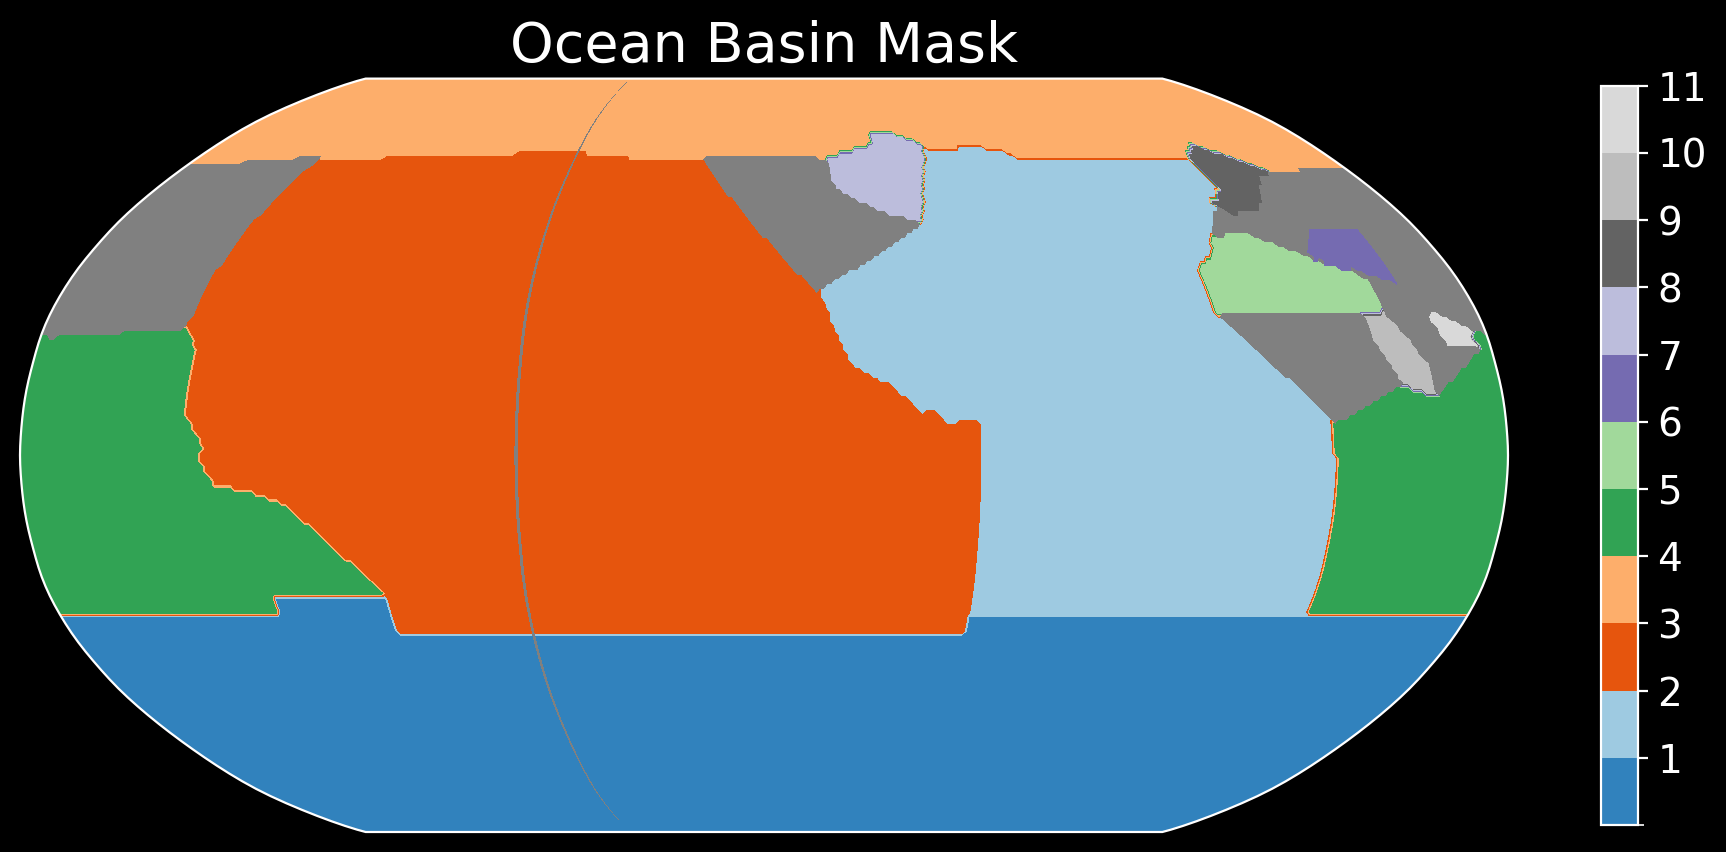

In [20]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_basins.plot.contourf(x='lon',y='lat',
                         cmap='tab20c',
                         vmin=0,vmax=11,levels=12,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[1,2,3,4,5,6,7,8,9,10,11], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("Ocean Basin Mask",fontsize=20)

In [82]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6 
plt.style.use("dark_background") 

## Importing the Data

### WOA18 

In [83]:
#loading in woa data
woa18_1955_64_potential_temp = xr.open_zarr('../data/woa18/woa18_1955_1964_temperature',decode_times=False).potential_temperature
woa18_1965_74_potential_temp = xr.open_zarr('../data/woa18/woa18_1965_1974_temperature',decode_times=False).potential_temperature
woa18_1975_84_potential_temp = xr.open_zarr('../data/woa18/woa18_1975_1984_temperature',decode_times=False).potential_temperature
woa18_1985_94_potential_temp = xr.open_zarr('../data/woa18/woa18_1985_1994_temperature',decode_times=False).potential_temperature
woa18_1995_04_potential_temp = xr.open_zarr('../data/woa18/woa18_1995_2004_temperature',decode_times=False).potential_temperature
woa18_2005_17_potential_temp = xr.open_zarr('../data/woa18/woa18_2005_2017_temperature',decode_times=False).potential_temperature
woa18_decav_potential_temp = xr.open_zarr('../data/woa18/woa18_decav_temperature',decode_times=False).potential_temperature

In [84]:
woa18_1955_64_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

Ocean temperature and salinity data is from World Ocean Atlas (WOA). “The World Ocean Atlas (WOA) is a collection of objectively analyzed, quality-controlled temperature, salinity, oxygen, phosphate, silicate, and nitrate means based on profile data from the World Ocean Database (WOD). It can be used to create boundary and/or initial conditions for various ocean models, verify numerical simulations of the ocean, and corroborate satellite data”.  

“The World Ocean Database (WOD) is the world's largest collection of uniformly formatted, quality controlled, publicly available ocean profile data. It is a powerful tool for oceanographic, climatic, and environmental research, and the end result of more than 20 years of coordinated efforts to incorporate data from institutions, agencies, individual researchers, and data recovery initiatives into a single database. WOD data spans from Captain Cook's 1772 voyage to the contemporary Argo period, making it a valuable resource for long-term and historical ocean climate analysis. Original versions of the 20,000+ datasets in the WOD are available through the NCEI archives” [(NOAA)](https://www.ncei.noaa.gov/products/world-ocean-database).   

Ocean temperature is measured in degrees Celsius and salinity is unitless. Data can be accessed through this link [https://www.ncei.noaa.gov/access/world-ocean-atlas-2018/]()

### Ocean heat content, steric sea level rise, thermosteric sea level rise, and halosteric sea level rise anomaly data

In [85]:
ees_climate_dir = 'C:/Users/TU_Climate24_Student/Desktop/ees_climate/'

In [86]:
#heat content
heat_content_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/heat_content_anomaly_0-2000_yearly.nc'
heat_content_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/heat_content_anomaly_0-700_yearly.nc'

In [87]:
heat_content_0_2000 = xr.open_dataset(heat_content_0_2000_path, decode_times=False)
heat_content_0_700 = xr.open_dataset(heat_content_0_700_path, decode_times=False)

In [88]:
# steric
steric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-2000_yearly.nc'
steric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_total_steric_sea_level_anomaly_0-700_yearly.nc'

In [89]:
steric_sea_level_0_2000 = xr.open_dataset(steric_sea_level_0_2000_path, decode_times=False)
steric_sea_level_0_700 = xr.open_dataset(steric_sea_level_0_700_path, decode_times=False)

In [90]:
#halosteric
halosteric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-2000_yearly.nc'
halosteric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_halosteric_sea_level_anomaly_0-700_yearly.nc'

In [91]:
halosteric_sea_level_0_2000 = xr.open_dataset(halosteric_sea_level_0_2000_path, decode_times=False)
halosteric_sea_level_0_700 = xr.open_dataset(halosteric_sea_level_0_700_path, decode_times=False)

In [92]:
#thermosteric
thermosteric_sea_level_0_2000_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-2000_yearly.nc'
thermosteric_sea_level_0_700_path = ees_climate_dir + 'UnitProjectPszczolkowski1/data/heat_content_sea_level/mean_thermosteric_sea_level_anomaly_0-700_yearly.nc'

In [93]:
thermosteric_sea_level_0_2000 = xr.open_dataset(thermosteric_sea_level_0_2000_path, decode_times=False)
thermosteric_sea_level_0_700 = xr.open_dataset(thermosteric_sea_level_0_700_path, decode_times=False)

Anomaly observations provide insight for depths 0-2000 meters. Anomalies are computed over the top 700 meters (0-700) and the upper 2000 meters (0-2000). Data collected from 1955 – present. Data can be found through [NOAA's National Center for Environmental Information.](https://www.ncei.noaa.gov/access/global-ocean-heat-content/index.html) Data distribution figures for temperature and salinity observations, temperature and salinity anomaly fields for depths 0-2000m, heat content and steric sea level (thermosteric, halosteric, total) are updated quarterly. Heat content anomalies are in joules and sea level changes are measured in millimeters. 

### How is Observed Data Collected?
Temperature and salinity data can be collected throughout different depths of the water column through electrical sensors. The most common method is deploying a sensor referred to as a CTD which stands for conductivity, temperature, and depth. Depth is derived through pressure sensors and salinity can be derived from conductivity which is how well a solution can conduct electricity [NOAA](https://oceanexplorer.noaa.gov/explainers/data.html#:~:text=Two%20types%20of%20data%20are,similar%20to%20elevation%20on%20land).   

An additional way that scientists gather information on temperature and salinity is using Argo floats. These floats free-floatingting in ue supper 2,000 meters of the ocean. They’re able to provide valuable information about the conditions of the ocean while being fully autonomous.  

### Model Data

In [94]:
google_cloud_cmip6 = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

In [95]:
# historical model data for temp
gfdl_esm4_thetao_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'Omon' & \
    variable_id == 'thetao' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'"
)

In [96]:
gfdl_esm4_thetao_data

activity_id institution_id  source_id experiment_id member_id table_id  \
245206        CMIP      NOAA-GFDL  GFDL-ESM4    historical  r1i1p1f1     Omon   

       variable_id grid_label  \
245206      thetao         gr   

                                                   zstore  dcpp_init_year  \
245206  gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...             NaN   

         version  
245206  20190726

In [97]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_esm4_thetao_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)

gfdl_esm4_thetao_data = xr.open_zarr(mapper, consolidated=True)
gfdl_esm4_thetao_data


<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    thetao     (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            thetao
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/248958fd-cc5a-4876-a4b6-61edc24d6ddc...
    version_id:             v20190726

In [266]:
gfdl_esm4_so_data = google_cloud_cmip6.query(
    "activity_id=='CMIP' & \
    table_id == 'Omon' & \
    variable_id == 'so' & \
    experiment_id == 'historical' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gr' & \
    member_id == 'r1i1p1f1'" 
)

In [269]:
gfdl_esm4_so_data

activity_id institution_id  source_id experiment_id member_id table_id  \
245217        CMIP      NOAA-GFDL  GFDL-ESM4    historical  r1i1p1f1     Omon   

       variable_id grid_label  \
245217          so         gr   

                                                   zstore  dcpp_init_year  \
245217  gs://cmip6/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/hist...             NaN   

         version  
245217  20190726

In [270]:
gcs = gcsfs.GCSFileSystem(token='anon')
zstore = gfdl_esm4_so_data.zstore.values[-1]
mapper = gcs.get_mapper(zstore)
gfdl_esm4_so_data = xr.open_zarr(mapper, consolidated=True)
gfdl_esm4_so_data

<xarray.Dataset>
Dimensions:    (lat: 180, bnds: 2, lev: 35, lon: 360, time: 1980)
Coordinates:
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(180, 2), meta=np.ndarray>
  * lev        (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(35, 2), meta=np.ndarray>
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(360, 2), meta=np.ndarray>
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    so         (time, lev, lat, lon) float32 dask.array<chunksize=(12, 35, 180, 360), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.0 UGRID-1.0
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    comment:                <null ref>
    ...                     ...
    variable_id:            so
    variant_info:           N/A
    variant_label:          r1i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/e61aa2fb-e885-4212-9284-9a77ba0f55e5...
    version_id:             v20190726

Monthly simulated ocean temperatures and sea water salinity output from GFDL-ESM4 under the historical experiment spanning from 1980 – 2014 was developed at NOAA's Geophysical Fluid Dynamics Laboratory (GFDL). This data contributed to the sixth phase of the Coupled Model Intercomparison Project (CMIP6) and was made available via Google Cloud [https://console.cloud.google.com/marketplace/product/noaa-public/cmip6.](https://console.cloud.google.com/marketplace/product/noaa-public/cmip6.)

---

# Analysis
Now that we've established a basic understanding of ocean heat content, steric, halosteric, and thermosteric sea level, let's dive into the analysis!

## Observed Ocean Heat Content

### 0-700m Depth

In [ ]:
heat_content_0_700

In [102]:
#converting to years
time_0_700 = heat_content_0_700['time'].values
base_year = 1955
time_as_years_0_700 = base_year + (time_0_700 / 12)
print(time_as_years_0_700[:68]) 

[1955.5 1956.5 1957.5 1958.5 1959.5 1960.5 1961.5 1962.5 1963.5 1964.5
 1965.5 1966.5 1967.5 1968.5 1969.5 1970.5 1971.5 1972.5 1973.5 1974.5
 1975.5 1976.5 1977.5 1978.5 1979.5 1980.5 1981.5 1982.5 1983.5 1984.5
 1985.5 1986.5 1987.5 1988.5 1989.5 1990.5 1991.5 1992.5 1993.5 1994.5
 1995.5 1996.5 1997.5 1998.5 1999.5 2000.5 2001.5 2002.5 2003.5 2004.5
 2005.5 2006.5 2007.5 2008.5 2009.5 2010.5 2011.5 2012.5 2013.5 2014.5
 2015.5 2016.5 2017.5 2018.5 2019.5 2020.5 2021.5 2022.5]


In [103]:
time_as_years_0_700_rounded = np.round(time_as_years_0_700).astype(int)
print(time_as_years_0_700_rounded[:68]) 

[1956 1956 1958 1958 1960 1960 1962 1962 1964 1964 1966 1966 1968 1968
 1970 1970 1972 1972 1974 1974 1976 1976 1978 1978 1980 1980 1982 1982
 1984 1984 1986 1986 1988 1988 1990 1990 1992 1992 1994 1994 1996 1996
 1998 1998 2000 2000 2002 2002 2004 2004 2006 2006 2008 2008 2010 2010
 2012 2012 2014 2014 2016 2016 2018 2018 2020 2020 2022 2022]


In [104]:
heat_content_0_700_avg = heat_content_0_700['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
print(heat_content_0_700_avg)

<xarray.DataArray 'h18_hc' (time: 68)>
array([-0.76616794, -0.63232714, -1.1165941 , -0.37482622, -0.52979213,
       -0.3440252 , -0.49823382, -0.24856934, -0.5434177 , -0.74478287,
       -0.73633665, -0.94185793, -1.0409926 , -1.3869675 , -1.0858189 ,
       -1.2801622 , -0.9049408 , -1.2637564 , -0.8522976 , -0.6736094 ,
       -0.37444544, -0.6376426 ,  0.01535239,  0.0179543 , -0.22770451,
        0.26261404,  0.01996759, -0.567376  , -0.6834087 , -0.12407199,
        0.01299194, -0.25611666, -0.23272423,  0.25829783,  0.21756558,
        0.05229003,  0.64160866,  0.12332966,  0.1399194 ,  0.35853496,
        0.5378178 ,  1.0876495 ,  0.78283215,  1.0450587 ,  1.4363087 ,
        1.3752041 ,  1.0183694 ,  1.656906  ,  2.4101348 ,  2.4817638 ,
        2.029739  ,  2.5186238 ,  2.3073971 ,  2.4502172 ,  2.4607816 ,
        2.5316126 ,  2.6519022 ,  2.6634877 ,  3.0698478 ,  3.248945  ,
        3.693364  ,  3.4295278 ,  3.8639252 ,  4.088456  ,  4.3222084 ,
        4.291376  ,  4.58

In [105]:
time_as_years_0_700 = heat_content_0_700['time'] / 12 + 1955  
time_as_years_0_700_rounded = np.round(time_as_years_0_700).astype(int)
print(time_as_years_0_700_rounded[:10]) 

<xarray.DataArray 'time' (time: 10)>
array([1956, 1956, 1958, 1958, 1960, 1960, 1962, 1962, 1964, 1964])
Coordinates:
  * time     (time) float32 6.0 18.0 30.0 42.0 54.0 66.0 78.0 90.0 102.0 114.0


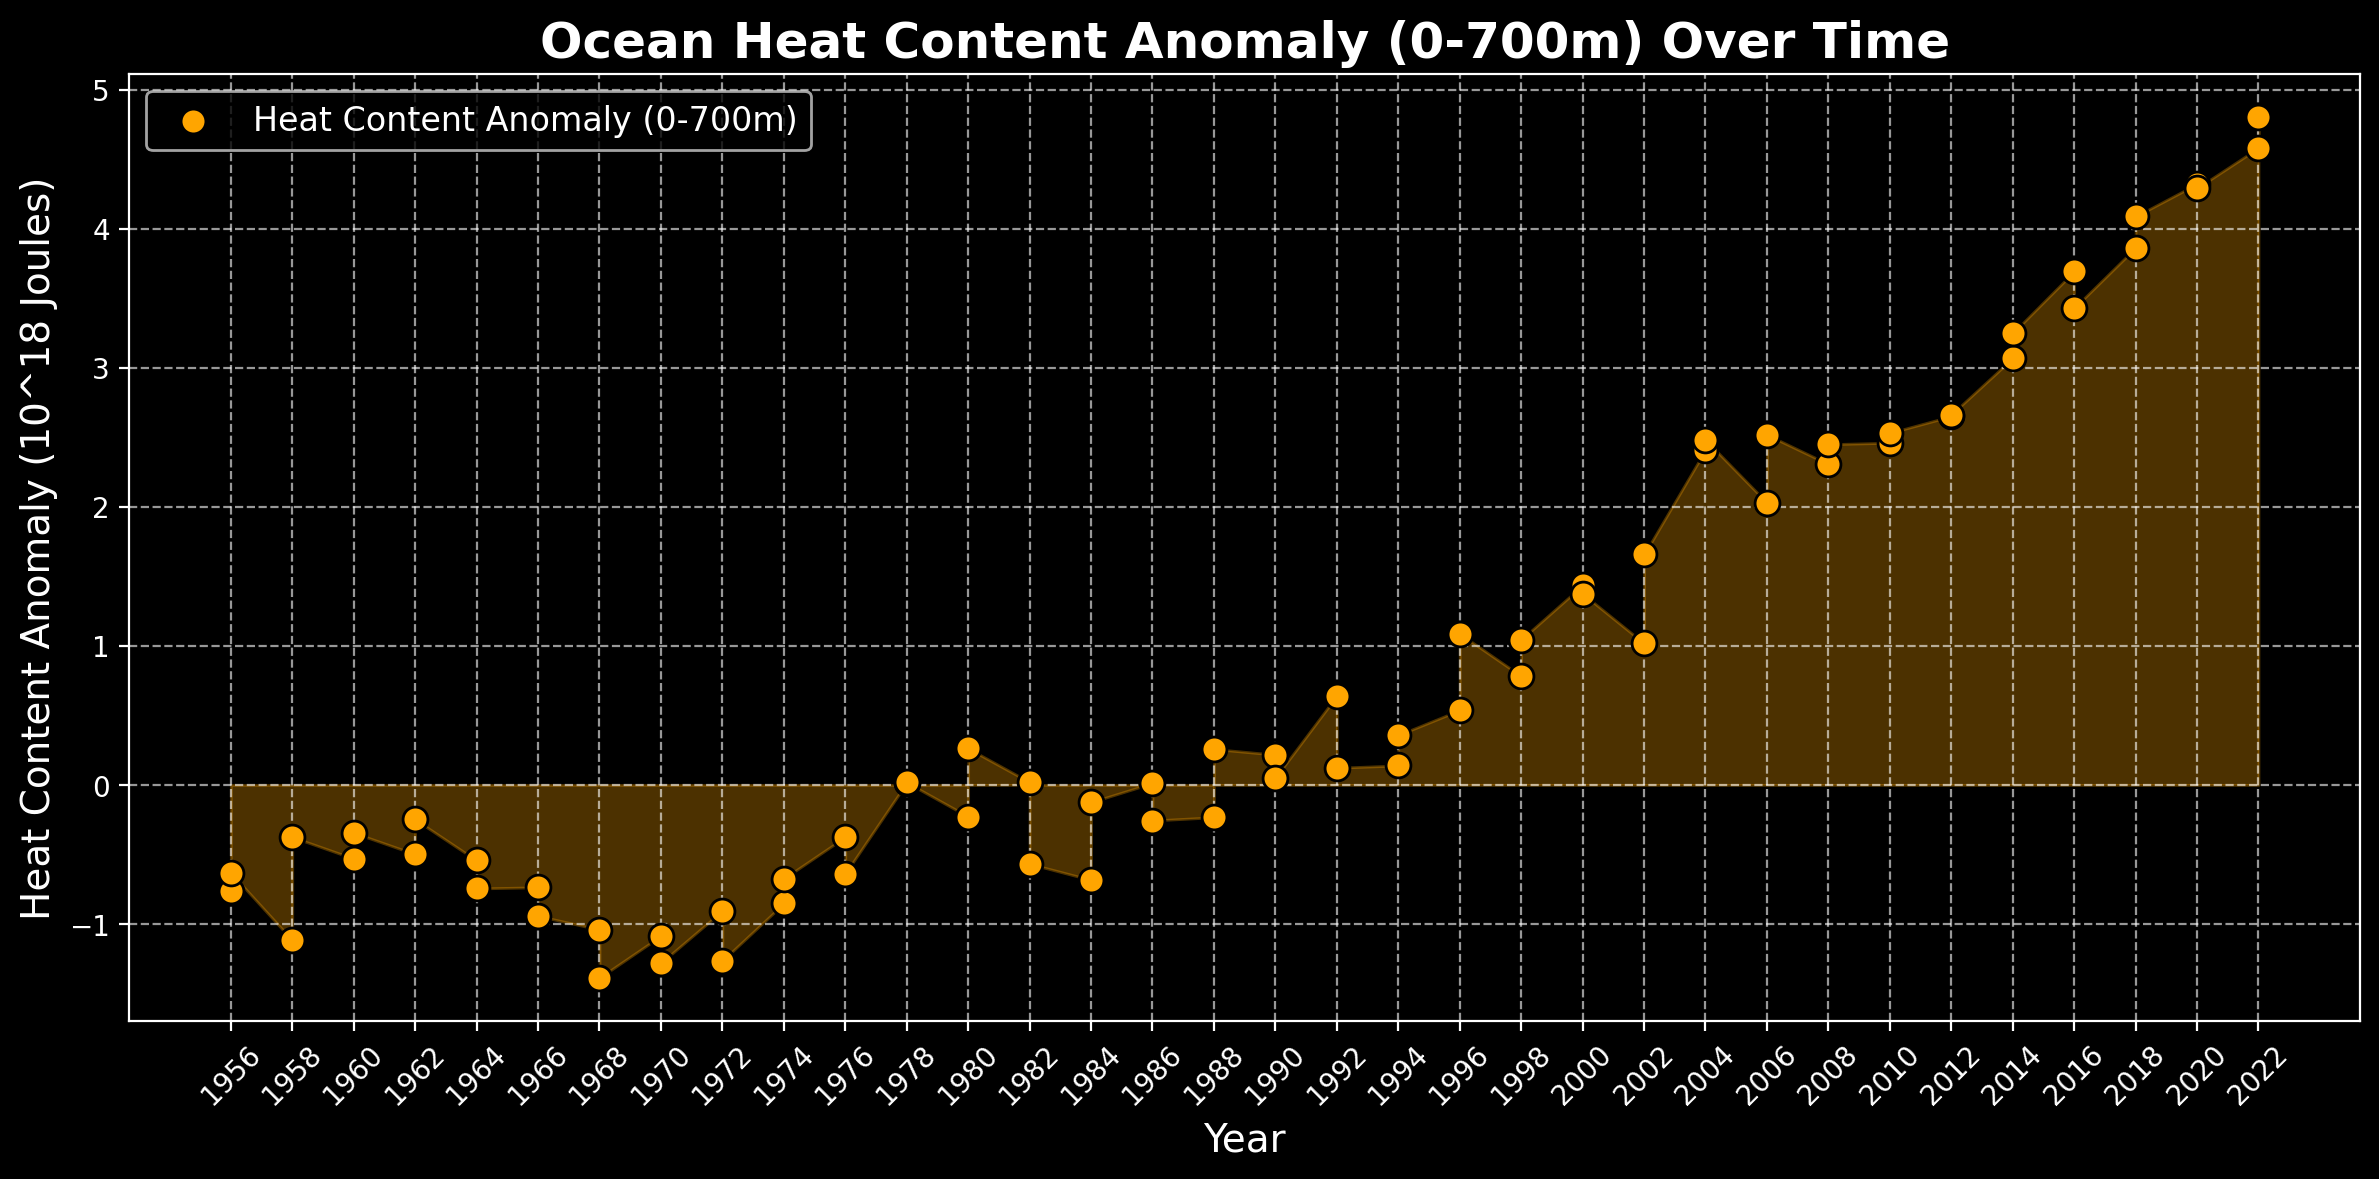

In [106]:
plt.figure(figsize=(12, 6))
plt.scatter(time_as_years_0_700_rounded, heat_content_0_700_avg, color='orange', s=80, label="Heat Content Anomaly (0-700m)", edgecolor='black', zorder=3)
plt.fill_between(time_as_years_0_700_rounded, heat_content_0_700_avg, color='orange', alpha=0.3)  # Alpha controls transparency
plt.title("Ocean Heat Content Anomaly (0-700m) Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Heat Content Anomaly (10^18 Joules)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.xticks(np.arange(min(time_as_years_0_700_rounded), max(time_as_years_0_700_rounded) + 1, 2))
plt.tight_layout()
plt.legend(loc='upper left', fontsize=12)
plt.show()

**Figure 1.** Heat content anomalies for the upper ocean (0-700m) from 1955-2023 in units of 10¹⁸ Joules. Data is from NOOAA's Center for Environmental Information. 

### 0-2000m Depth

In [193]:
heat_content_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    h18_hc              (time, depth, lat, lon) float32 nan nan ... 0.1314
    ...                  ...
    yearl_h22_se_IO     (time) float32 ...
    yearl_h22_NI        (time) float32 ...
    yearl_h22_se_NI     (time) float32 ...
    yearl_h22_SI        (time) float32 ...
    yearl_h22_se_SI     (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Ocean Heat Content anomalies from WOA09 ...
    summary:                         Mean ocean variable anomaly from in situ...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [108]:
time_0_2000 = heat_content_0_2000['time'].values
base_year = 2005
time_as_years_0_2000 = base_year + (time_0_2000 / 12) -50.5
print(time_as_years_0_2000[:18]) 

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]


In [109]:
heat_content_2000_global = heat_content_0_2000['h18_hc'].mean(dim=['lat', 'lon', 'depth'])
time_years = np.floor(heat_content_0_2000['time'].values).astype(int) 
trend_2000_slope = (heat_content_2000_global[-1] - heat_content_2000_global[0]) / (time_years[-1] - time_years[0])
print(f"Trend 0-2000m (Global): {trend_2000_slope:.2f} units/year")

Trend 0-2000m (Global): 0.02 units/year


In [110]:
regions = {
    'Northern Hemisphere': 'yearl_h22_NH',
    'Southern Hemisphere': 'yearl_h22_SH',
    'Atlantic Ocean': 'yearl_h22_AO',
    'Pacific Ocean': 'yearl_h22_PO',
    'Indian Ocean': 'yearl_h22_IO'
}

Northern Hemisphere Trend: 0.03 units/year
Southern Hemisphere Trend: 0.06 units/year
Atlantic Ocean Trend: 0.03 units/year
Pacific Ocean Trend: 0.03 units/year
Indian Ocean Trend: 0.02 units/year


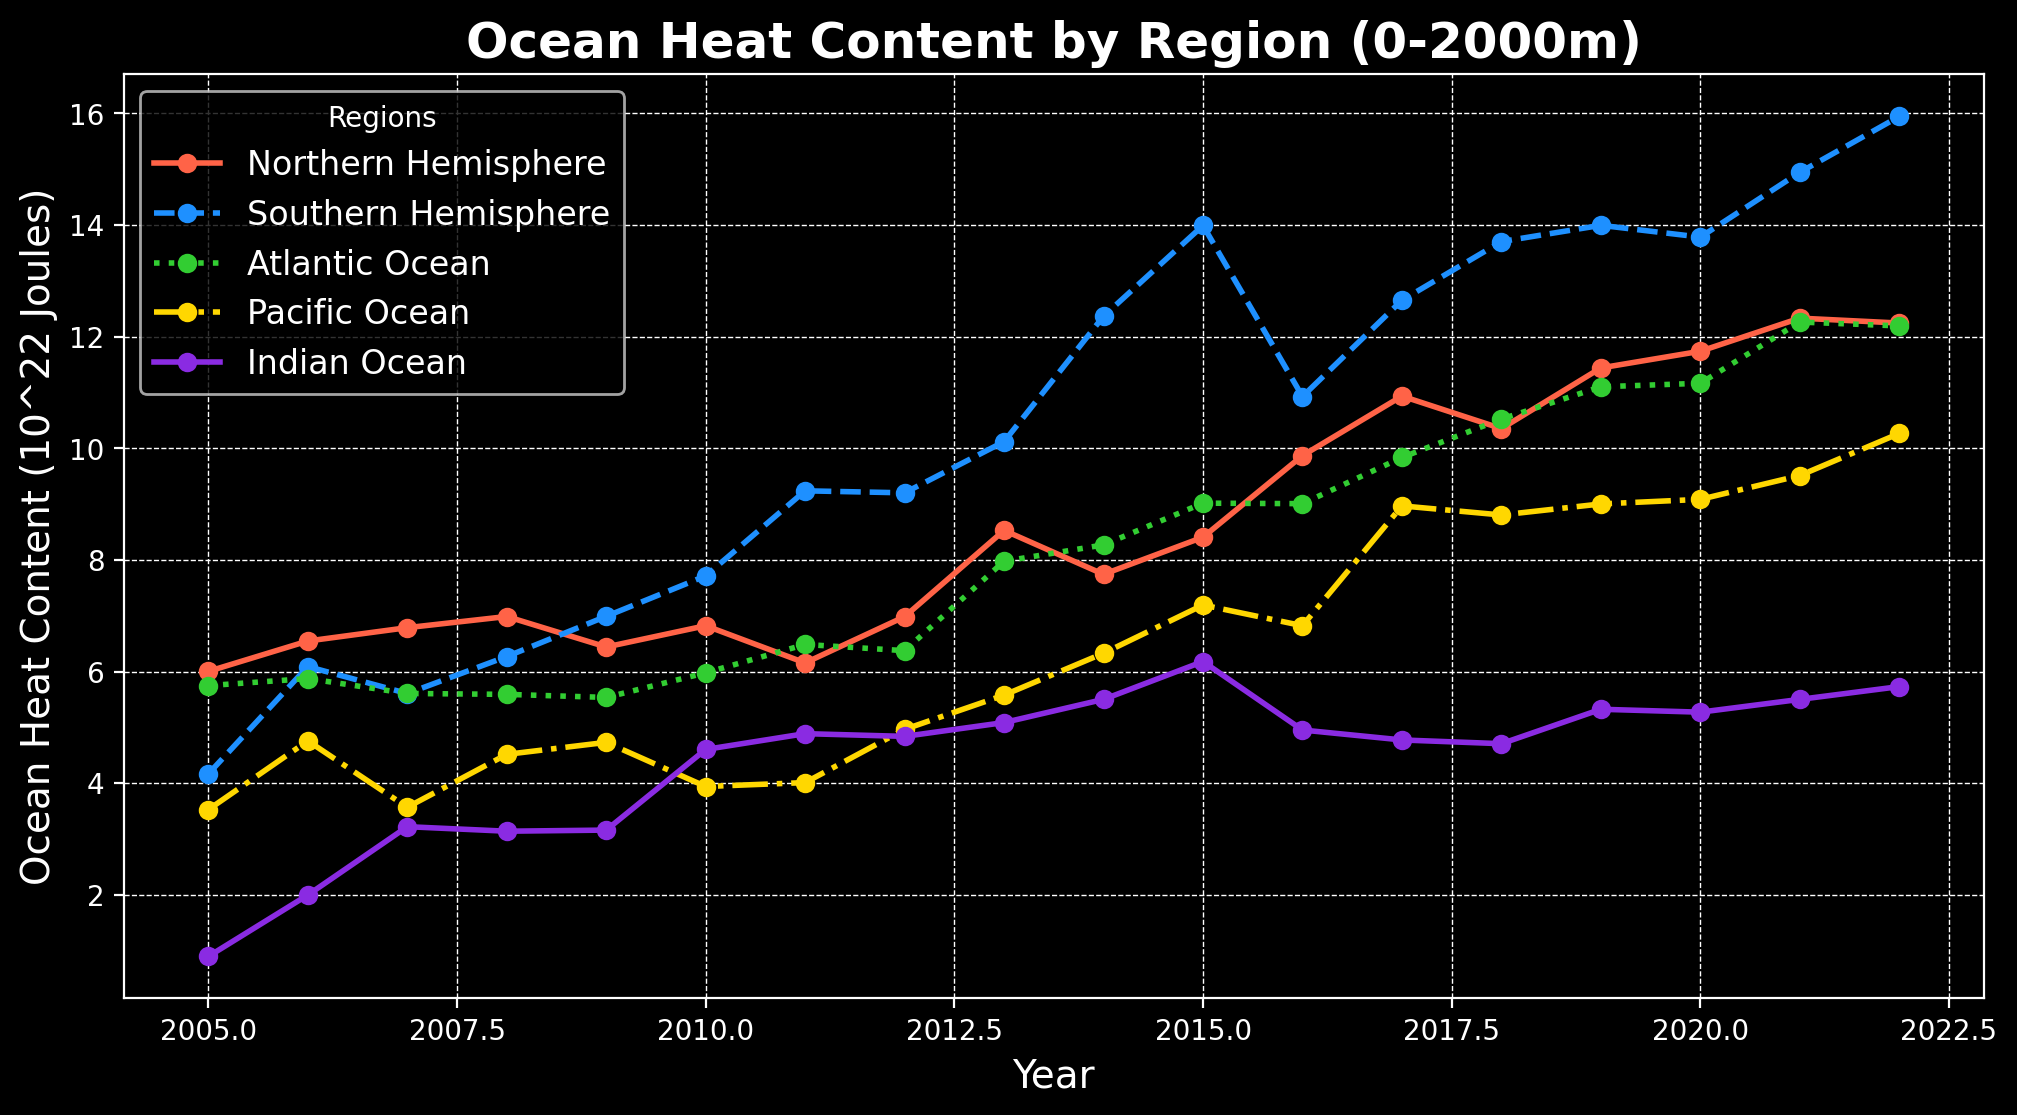

In [111]:
plt.figure(figsize=(12, 6))

colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700', '#8A2BE2'] 
linestyles = ['-', '--', ':', '-.', '-']  

for i, (region, var) in enumerate(regions.items()):
    regional_data = heat_content_0_2000[var].values
    plt.plot(time_as_years_0_2000, regional_data, label=region, 
             color=colors[i], linestyle=linestyles[i], linewidth=2, marker='o', markersize=6)

    regional_trend = (regional_data[-1] - regional_data[0]) / (time_years[-1] - time_years[0])
    print(f"{region} Trend: {regional_trend:.2f} units/year")

plt.xlabel("Year", fontsize=14)
plt.ylabel("Ocean Heat Content (10^22 Joules)", fontsize=14)
plt.title("Ocean Heat Content Anonmaly by Region (0-2000m)", fontsize=18, fontweight='bold')

# Customize grid for better contrast
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adjust legend position and font size
plt.legend(loc='upper left', fontsize=12, title="Regions")

# Display the graph
plt.show()

**Figure 2.** Ocean heat content trends are represented as anomalies in the deep ocean (0-2000m depth) across different regions from 2005-2022. Data is from NOAA's Center for Environmental Information. 

## Observed Ocean Temperatures

In [116]:
#isolating basins
southernocean = (woa18_basins.where(woa18_basins==1) /  woa18_basins.where(woa18_basins==1)) ### Values 1 over atlantic, NaN elsewhere
atlanticocean = (woa18_basins.where(woa18_basins==2) / woa18_basins.where(woa18_basins==2)) 
pacificocean=(woa18_basins.where(woa18_basins==3)/woa18_basins.where(woa18_basins==3))
arcticocean=(woa18_basins.where(woa18_basins==4)/woa18_basins.where(woa18_basins==4))
indianocean=(woa18_basins.where(woa18_basins==5)/woa18_basins.where(woa18_basins==5))

### Sea Surface Temperatures (Depth= 0 meters)

**Applying data to masks of major basins**

In [117]:
woa18_1955_64_atlantic = woa18_1955_64_potential_temp*atlanticocean

In [118]:
woa18_1955_64_indian = woa18_1955_64_potential_temp*indianocean

In [119]:
woa18_1955_64_pacific = woa18_1955_64_potential_temp*pacificocean

In [120]:
woa18_1955_64_southern = woa18_1955_64_potential_temp*southernocean

In [121]:
woa18_1955_64_arctic = woa18_1955_64_potential_temp*arcticocean

Text(0.5, 0.98, 'SST Atlantic 1955 to 1964 averaged')

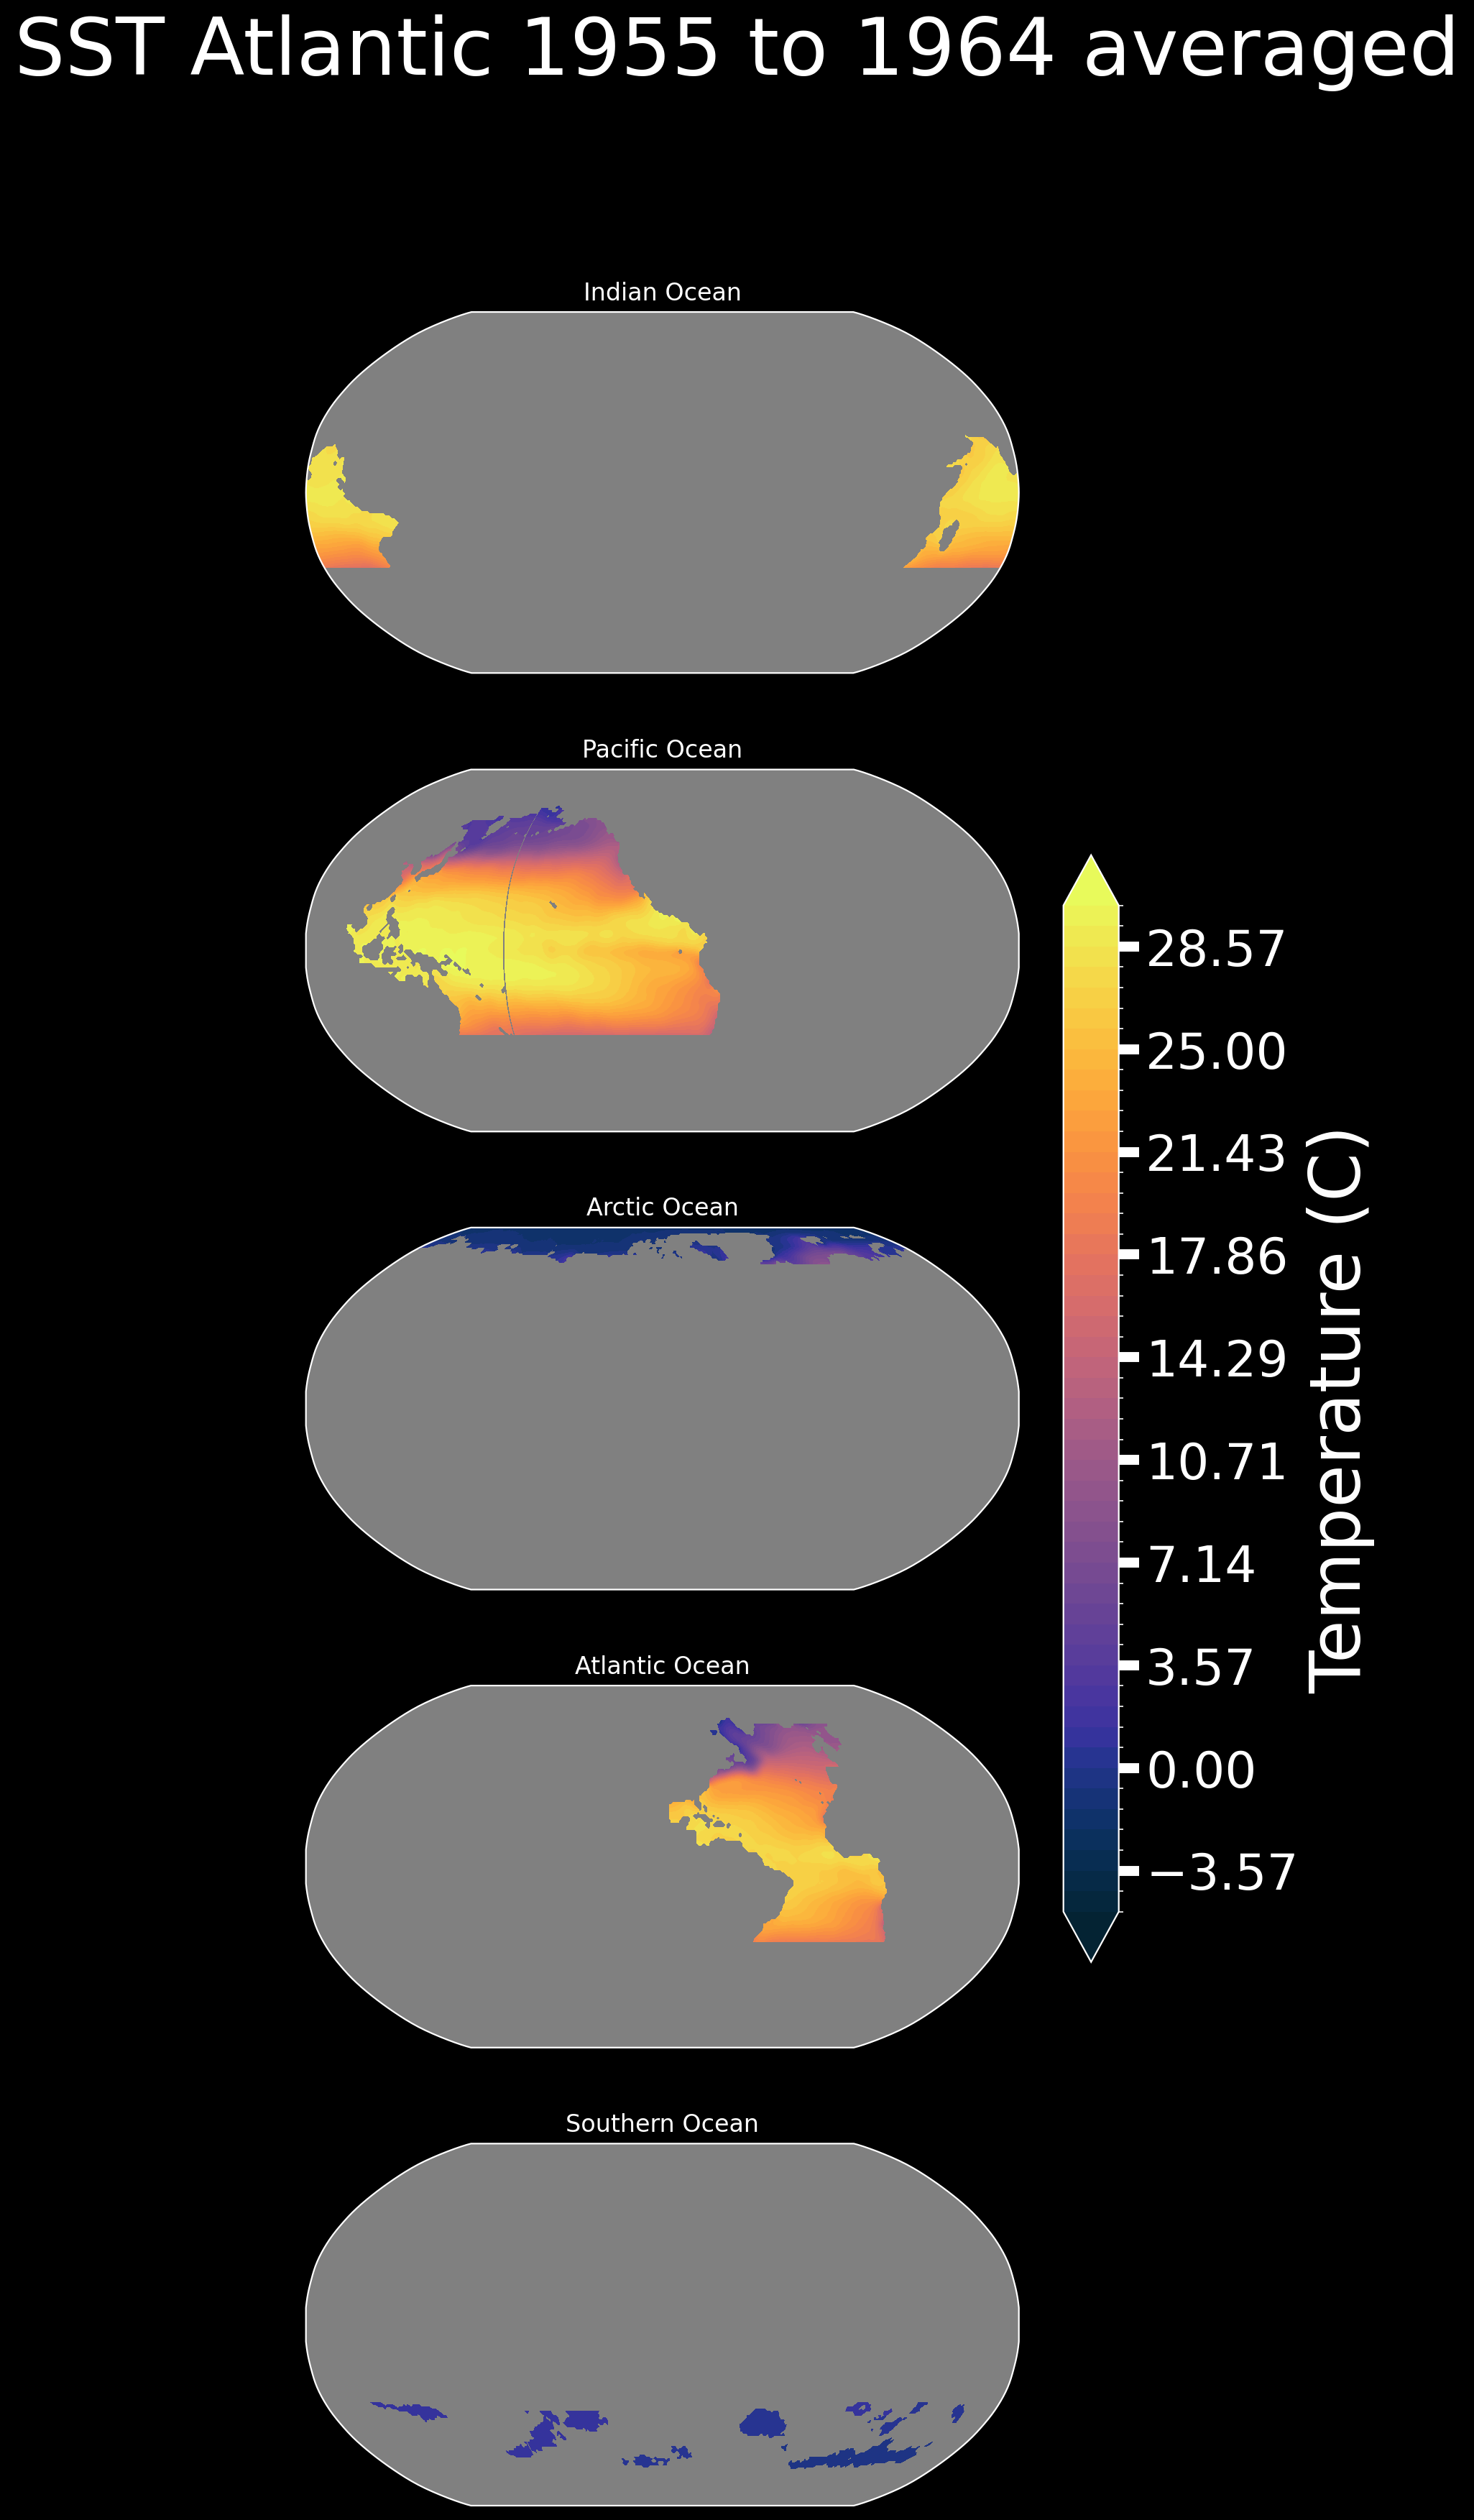

In [122]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-100),facecolor='grey')

fig, ax = plt.subplots(nrows=5,figsize=[8, 20],subplot_kw=subplot_kws)

p = woa18_1955_64_indian.isel(depth=0).plot.contourf(ax=ax[0],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                        
                      
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_pacific.isel(depth=0).plot.contourf(ax=ax[1],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_arctic.isel(depth=0).plot.contourf(ax=ax[2],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,
                         extend='both',
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_atlantic.isel(depth=0).plot.contourf(ax=ax[3],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
woa18_1955_64_southern.isel(depth=-5).plot.contourf(ax=ax[4],x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=-5,vmax=30,levels=50,extend='both',
                         
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)
ax[0].set_title('Indian Ocean')
ax[1].set_title('Pacific Ocean')
ax[2].set_title('Arctic Ocean')
ax[3].set_title('Atlantic Ocean')
ax[4].set_title('Southern Ocean')
# add separate colorbar
cbar = fig.colorbar(p, ax=ax[0:5], orientation='vertical', label='Temperature (C)', 
                    extend='both', shrink=0.5)
cbar.set_label(label='Temperature (C)',size=35)
cbar.ax.tick_params(labelsize=25, length=10, width=5)
fig.suptitle("SST Atlantic 1955 to 1964 averaged",fontsize=40)

Text(0.5, 1.0, 'SST Atlantic 1955 to 1964 averaged')

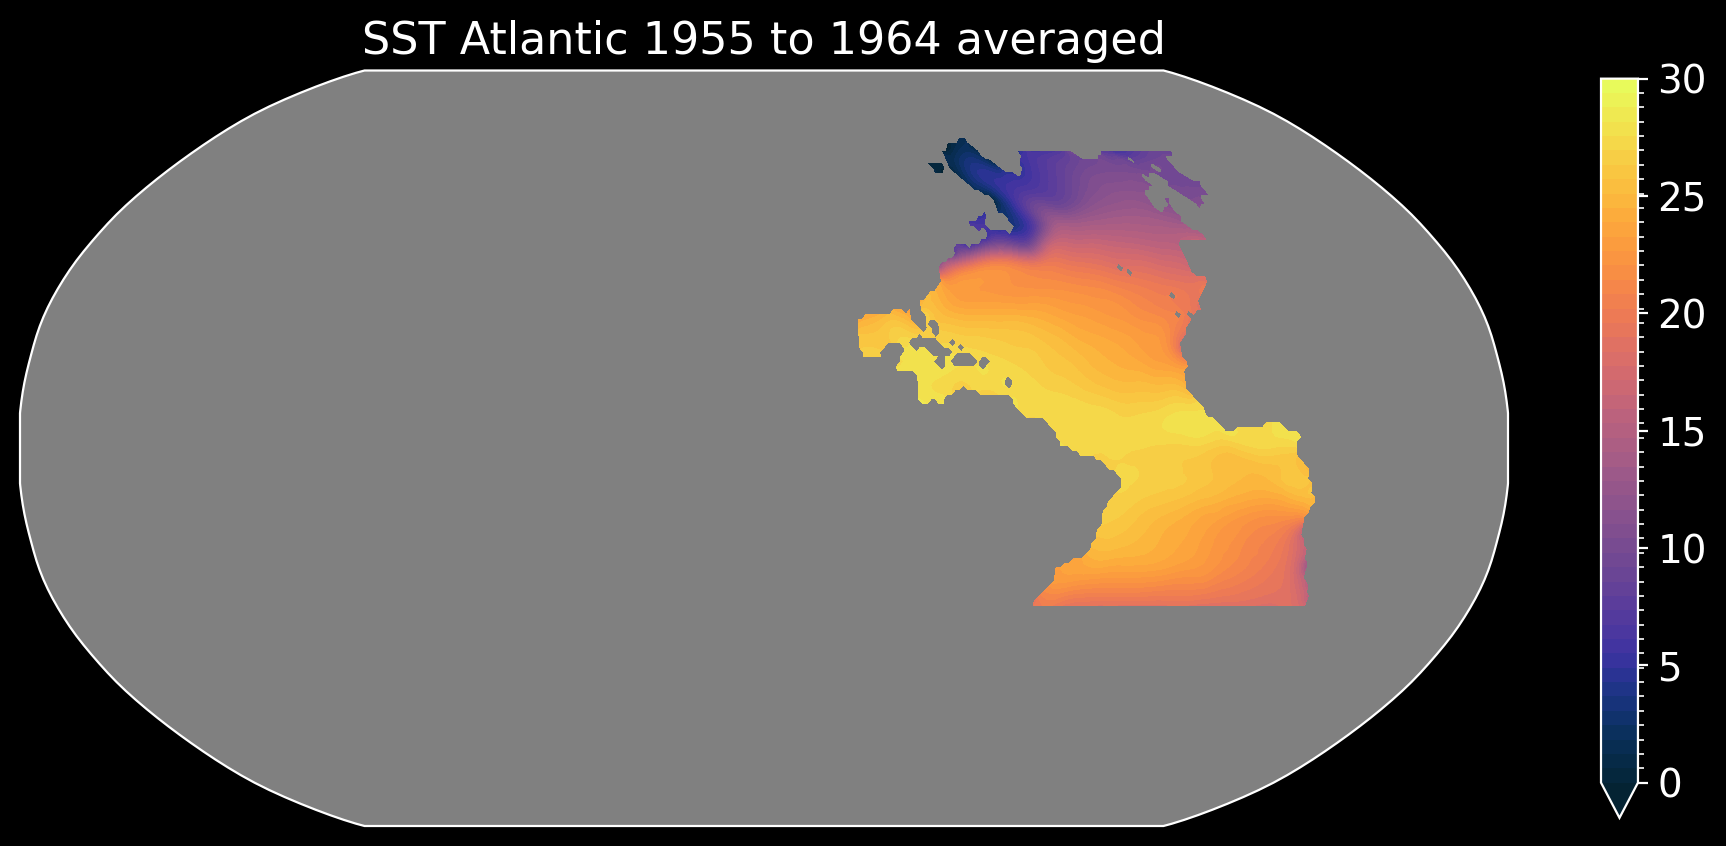

In [123]:
subplot_kws = dict(projection=ccrs.Robinson(central_longitude=-120),facecolor='grey')

plt.figure(figsize=[12,8])

p = woa18_1955_64_atlantic.isel(depth=0).plot.contourf(x='lon',y='lat',
                         cmap=cmocean.cm.thermal,
                         vmin=0,vmax=30,levels=50,
                         subplot_kws = subplot_kws,
                         transform=ccrs.PlateCarree(),
                         add_colorbar=False)

# add separate colorbar
cb = plt.colorbar(p, ticks=[0,5,10,15,20,25,30], shrink=0.6)
cb.ax.tick_params(labelsize=14)
plt.title("SST Atlantic 1955 to 1964 averaged",fontsize=16)

In [124]:
# need to weight grid cells as I will be averaging out lat and lon
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area

In [125]:
#weight for woa18
lat_woa =woa18_1955_64_potential_temp.coords['lat'].values #1-D numpy array of model's latitude values
lon_woa = woa18_1955_64_potential_temp.coords['lon'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_woa,lon_woa)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_woa = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(woa18_1955_64_potential_temp.coords['lat'],\
                                                        woa18_1955_64_potential_temp.coords['lon']))

In [126]:
#assigning weight to new variable
weights_woa=areacell_woa


In [127]:
woa18_decav_potential_temp

<xarray.DataArray 'potential_temperature' (depth: 102, lat: 180, lon: 360)>
dask.array<open_dataset-potential_temperature, shape=(102, 180, 360), dtype=float32, chunksize=(26, 45, 180), chunktype=numpy.ndarray>
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
    time     float32 ...
Attributes:
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    long_name:      Objectively analyzed mean fields for sea_water_temperatur...
    standard_name:  sea_water_temperature
    units:          degrees_celsius

In [128]:
#applying weight, selecting for surface depth, and averaging lat and lon to get an average temperature value for each decade and basin
weight_55_64_atlantic_0=( woa18_1955_64_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_pacific_0=( woa18_1955_64_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_southern_0=( woa18_1955_64_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_indian_0=( woa18_1955_64_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_arctic_0=( woa18_1955_64_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])


weight_65_74_atlantic_0=( woa18_1965_74_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_pacific_0=( woa18_1965_74_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_southern_0=( woa18_1965_74_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_indian_0=( woa18_1965_74_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_arctic_0=( woa18_1965_74_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_75_84_atlantic_0=( woa18_1975_84_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_pacific_0=( woa18_1975_84_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_southern_0=( woa18_1975_84_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_indian_0=( woa18_1975_84_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_arctic_0=( woa18_1975_84_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_85_94_atlantic_0=( woa18_1985_94_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_pacific_0=( woa18_1985_94_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_southern_0=( woa18_1985_94_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_indian_0=( woa18_1985_94_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_arctic_0=( woa18_1985_94_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_95_04_atlantic_0=( woa18_1995_04_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_pacific_0=( woa18_1995_04_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_southern_0=( woa18_1995_04_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_indian_0=( woa18_1995_04_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_arctic_0=( woa18_1995_04_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_05_17_atlantic_0=( woa18_2005_17_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_pacific_0=( woa18_2005_17_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_southern_0=( woa18_2005_17_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_indian_0=( woa18_2005_17_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_arctic_0=( woa18_2005_17_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_dec_atlantic_0=(woa18_decav_potential_temp*atlanticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_pacific_0=( woa18_decav_potential_temp*pacificocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_southern_0=( woa18_decav_potential_temp*southernocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_indian_0=( woa18_decav_potential_temp*indianocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_arctic_0=(woa18_decav_potential_temp*arcticocean).isel(depth=0).weighted(areacell_woa).mean(dim=['lat', 'lon'])

**Extracting values for scatter plot**

In [129]:
print(weight_55_64_atlantic_0.values)
print(weight_55_64_pacific_0.values)
print(weight_55_64_southern_0.values)
print(weight_55_64_indian_0.values)
print(weight_55_64_arctic_0.values)


21.713539334331532
22.852926790350942
6.932275342283883
25.928182461710282
0.23851683231575488


In [130]:
print(weight_65_74_atlantic_0.values)
print(weight_65_74_pacific_0.values)
print(weight_65_74_southern_0.values)
print(weight_65_74_indian_0.values)
print(weight_65_74_arctic_0.values)


21.645169705449195
22.80842965173571
6.957230573812462
25.820545860236052
0.17122328595289513


In [131]:
print(weight_75_84_atlantic_0.values)
print(weight_75_84_pacific_0.values)
print(weight_75_84_southern_0.values)
print(weight_75_84_indian_0.values)
print(weight_75_84_arctic_0.values)

21.720232392816943
22.94205067729655
7.095378726058748
26.052238696552386
0.11185705276212167


In [132]:
print(weight_85_94_atlantic_0.values)
print(weight_85_94_pacific_0.values)
print(weight_85_94_southern_0.values)
print(weight_85_94_indian_0.values)
print(weight_85_94_arctic_0.values)

21.854801525229995
23.10354990036115
7.137029900537824
26.04960233001993
0.0759004763177559


In [133]:
print(weight_95_04_atlantic_0.values)
print(weight_95_04_pacific_0.values)
print(weight_95_04_southern_0.values)
print(weight_95_04_indian_0.values)
print(weight_95_04_arctic_0.values)

22.140455212284042
23.260637838417207
7.104141464555033
26.20523128489495
0.37433336398099337


In [134]:
print(weight_05_17_atlantic_0.values)
print(weight_05_17_pacific_0.values)
print(weight_05_17_southern_0.values)
print(weight_05_17_indian_0.values)
print(weight_05_17_arctic_0.values)

22.251894649694478
23.345200218572618
7.112227959974979
26.42356057222046
0.4751386482046699


In [135]:
print(weight_dec_atlantic_0.values)
print(weight_dec_pacific_0.values)
print(weight_dec_southern_0.values)
print(weight_dec_indian_0.values)
print(weight_dec_arctic_0.values)


21.873621954477354
23.039807645873797
7.032931693864205
26.06812388227409
0.2126526660433765


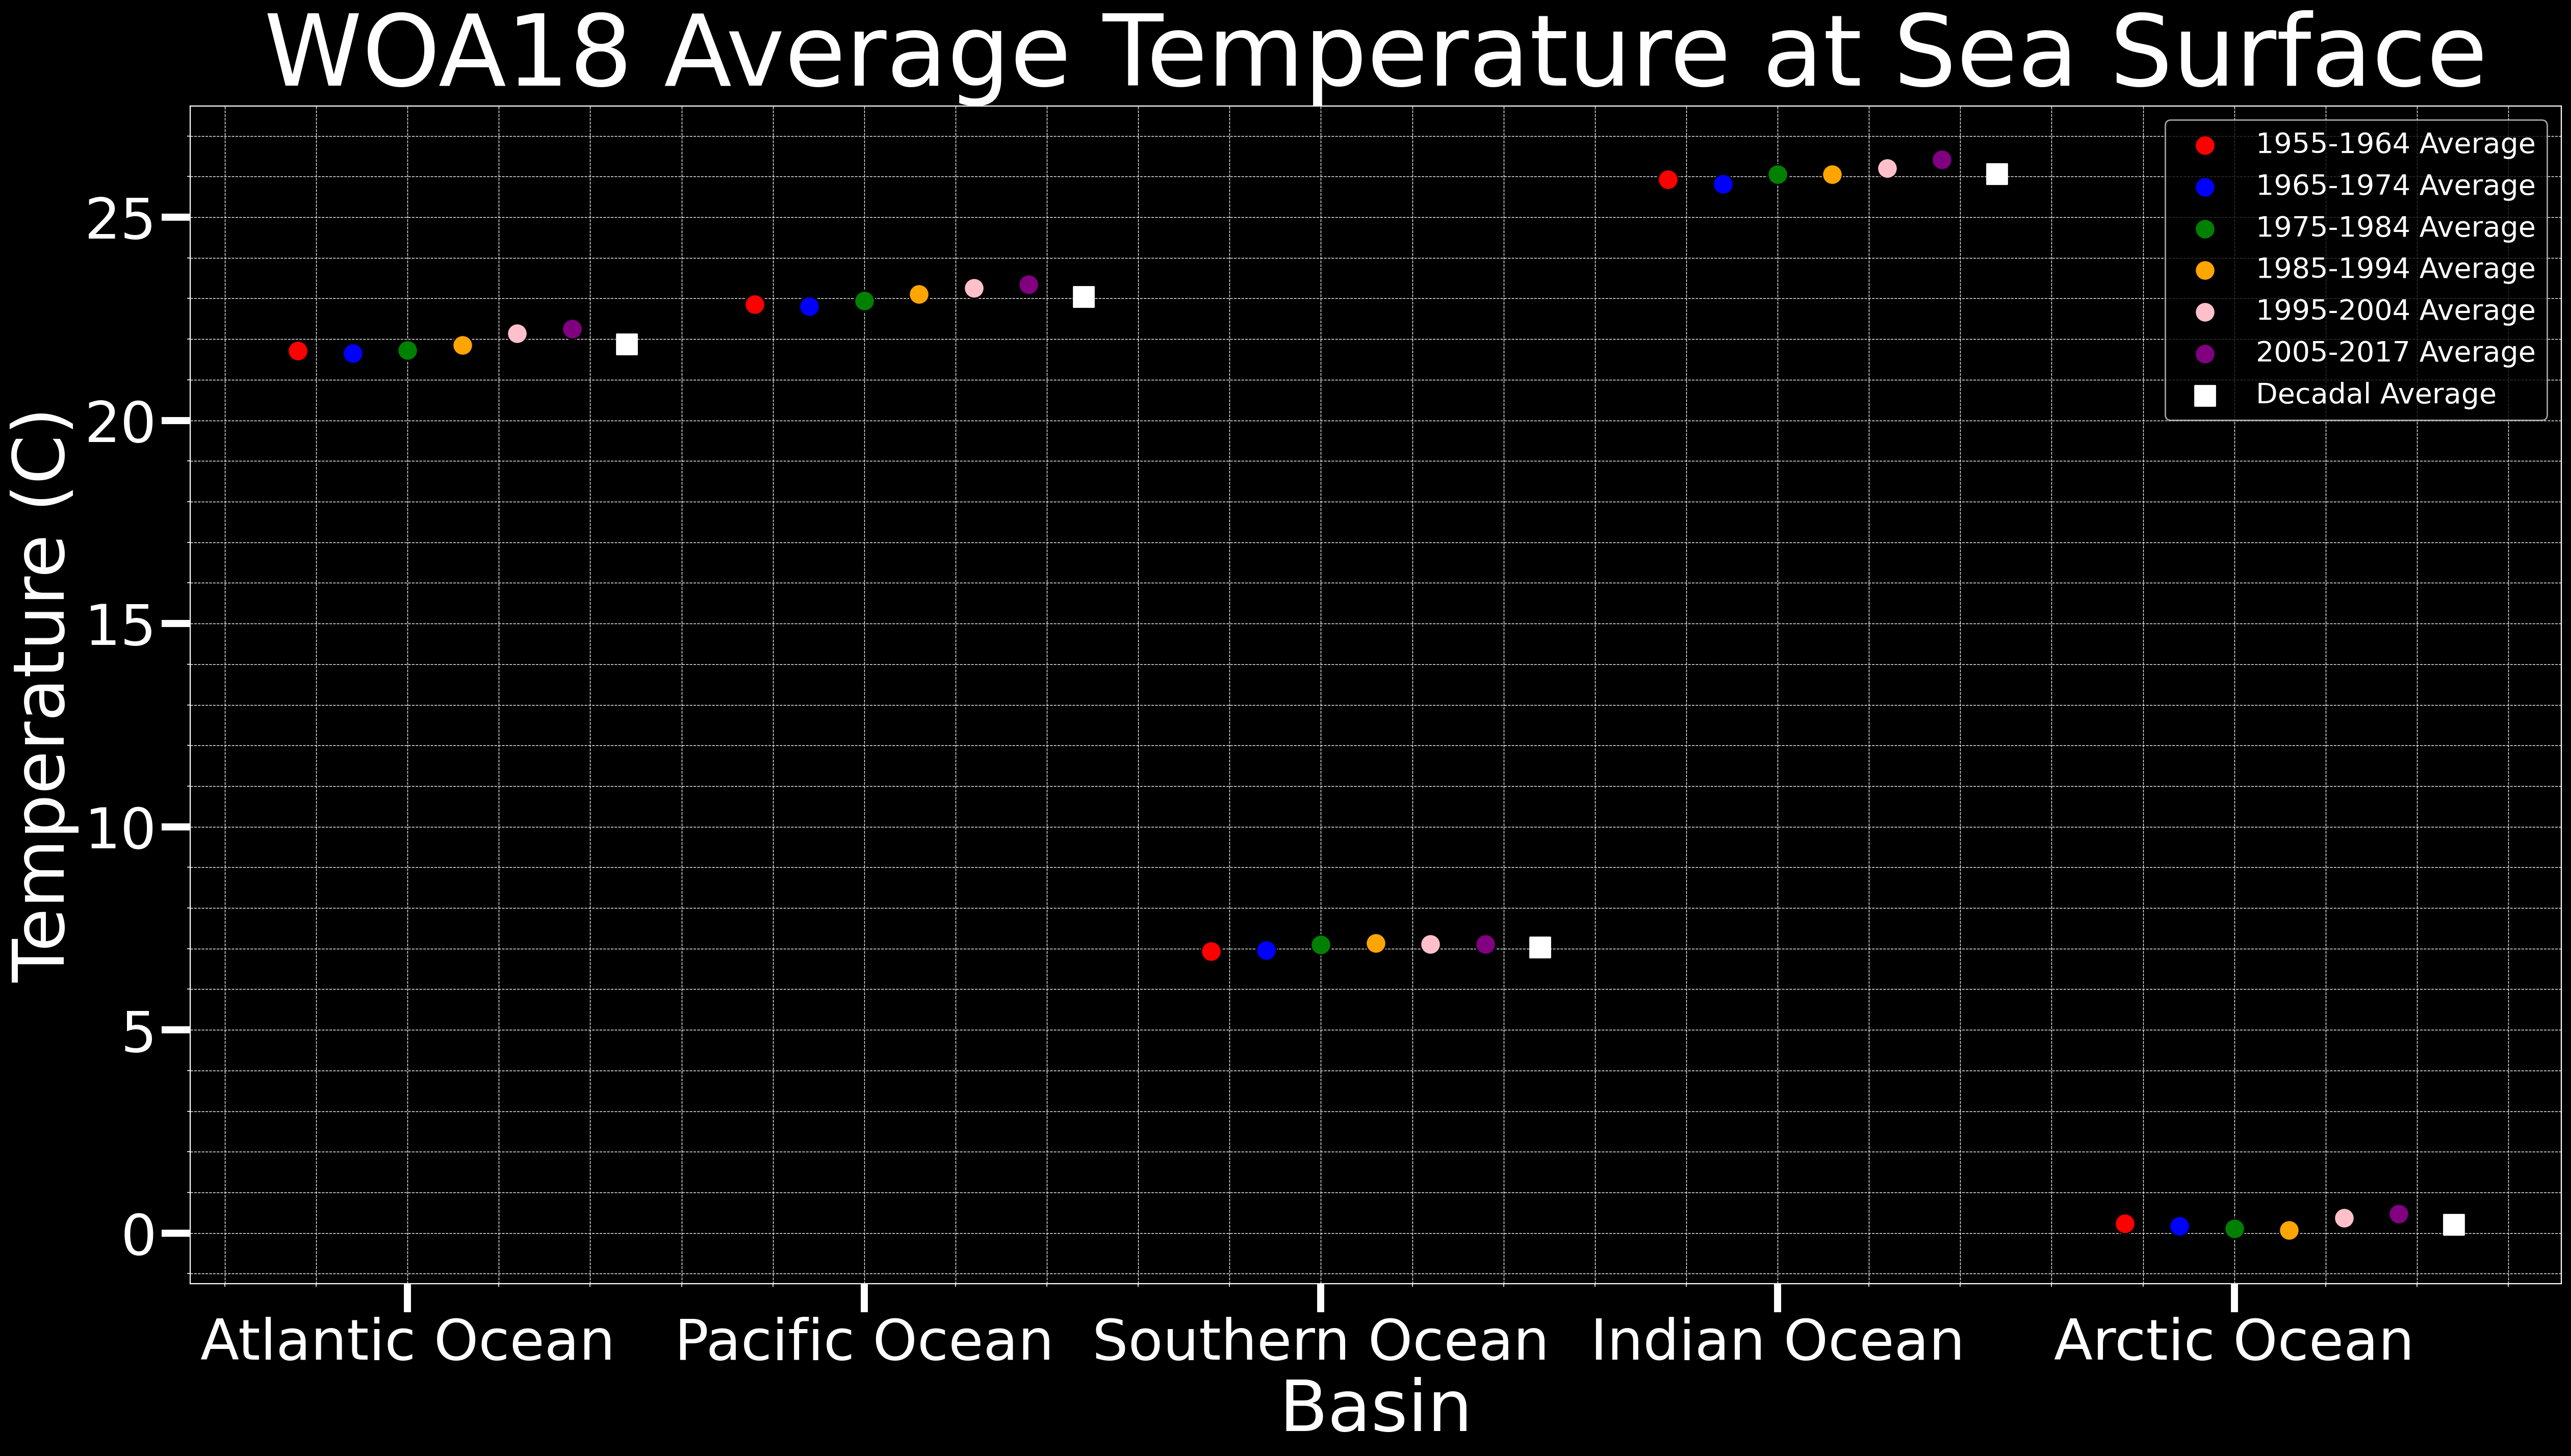

In [194]:
# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Data
X = ['Atlantic Ocean','Pacific Ocean','Southern Ocean','Indian Ocean', 'Arctic Ocean'] #assinging x axis values
# assigning data
woa_55_64_0 = [21.713539334331532,
22.852926790350942,
6.932275342283883,
25.928182461710282,
0.23851683231575488]
woa_65_74_0 = [21.645169705449195,
22.80842965173571,
6.957230573812462,
25.820545860236052,
0.17122328595289513]
woa_75_84_0 = [21.720232392816943,
22.94205067729655,
7.095378726058748,
26.052238696552386,
0.11185705276212167]
woa_85_94_0 = [21.854801525229995,
23.10354990036115,
7.137029900537824,
26.04960233001993,
0.0759004763177559]
woa_95_04_0 = [22.140455212284042,
23.260637838417207,
7.104141464555034,
26.20523128489495,
0.37433336398099337

]
woa_05_17_0 = [22.251894649694478,
23.345200218572618,
7.112227959974979,
26.42356057222046,
0.4751386482046699]
woa_dec_0 = [21.873621954477354,
23.039807645873797,
7.032931693864205,
26.06812388227409,
0.2126526660433765]

# X-axis positions for the basins
X_axis = np.arange(len(X)) 


marker_size = 200  # setting marker size
shift = 0.12 #adding shift to neatly space scatter points

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_0, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_0, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_0, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_0, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_0, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis + 4 * shift, woa_dec_0, color='white', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')
#ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, edgecolor='black')

# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40) 
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50 )
plt.title("WOA18 Average Temperature at Sea Surface", fontsize=70) 
#plt.ylim(270, 302)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)


 **Figure 3.** 10-year average of surface temperature in Celsius from 1955-2017 with decadal average from WOA18.

Analysis-Temperature has been rising in Atlantic, Pacific, Indian, and Arctic oceans. The Southern Ocean had increased in temperature as well but to a smaller degree than the rest of the world. In addition evidence of Arctic amplification can been in the Arctic Ocean as the most recent two decades are relatively much warmer than the last two decades for the other basins.

### Ocean Temperatures at 1000 Meters

In [137]:
#weighting data, selecting for 1000m depth, averaging lat and lon for one averaged temperature value
weight_55_64_atlantic_1000=( woa18_1955_64_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_pacific_1000=( woa18_1955_64_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_southern_1000=( woa18_1955_64_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_indian_1000=( woa18_1955_64_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_55_64_arctic_1000=( woa18_1955_64_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_65_74_atlantic_1000=( woa18_1965_74_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_pacific_1000=( woa18_1965_74_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_southern_1000=( woa18_1965_74_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_indian_1000=( woa18_1965_74_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_65_74_arctic_1000=( woa18_1965_74_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_75_84_atlantic_1000=( woa18_1975_84_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_pacific_1000=( woa18_1975_84_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_southern_1000=( woa18_1975_84_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_indian_1000=( woa18_1975_84_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_75_84_arctic_1000=( woa18_1975_84_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_85_94_atlantic_1000=( woa18_1985_94_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_pacific_1000=( woa18_1985_94_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_southern_1000=( woa18_1985_94_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_indian_1000=( woa18_1985_94_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_85_94_arctic_1000=( woa18_1985_94_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_95_04_atlantic_1000=( woa18_1995_04_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_pacific_1000=( woa18_1995_04_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_southern_1000=( woa18_1995_04_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_indian_1000=( woa18_1995_04_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_95_04_arctic_1000=( woa18_1995_04_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_05_17_atlantic_1000=( woa18_2005_17_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_pacific_1000=( woa18_2005_17_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_southern_1000=( woa18_2005_17_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_indian_1000=( woa18_2005_17_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_05_17_arctic_1000=( woa18_2005_17_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

weight_dec_atlantic_1000=(woa18_decav_potential_temp*atlanticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_pacific_1000=( woa18_decav_potential_temp*pacificocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_southern_1000=( woa18_decav_potential_temp*southernocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_indian_1000=( woa18_decav_potential_temp*indianocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])
weight_dec_arctic_1000=(woa18_decav_potential_temp*arcticocean).sel(depth=1000).weighted(areacell_woa).mean(dim=['lat', 'lon'])

**Extracting temperature data for scatter plot**

In [138]:
print(weight_55_64_atlantic_1000.values)
print(weight_55_64_pacific_1000.values)
print(weight_55_64_southern_1000.values)
print(weight_55_64_indian_1000.values)
print(weight_55_64_arctic_1000.values)

5.185698485581848
4.182381717193431
2.9698632744558577
6.017776330378069
-0.21657426065335872


In [139]:
print(weight_65_74_atlantic_1000.values)
print(weight_65_74_pacific_1000.values)
print(weight_65_74_southern_1000.values)
print(weight_65_74_indian_1000.values)
print(weight_65_74_arctic_1000.values)

5.187498056393757
4.1837130040305395
2.9656235797099066
6.037779547333845
-0.2208475375197744


In [140]:
print(weight_75_84_atlantic_1000.values)
print(weight_75_84_pacific_1000.values)
print(weight_75_84_southern_1000.values)
print(weight_75_84_indian_1000.values)
print(weight_75_84_arctic_1000.values)

5.226079292424071
4.176738843367636
2.9643929618215963
6.045707530764
-0.2236209031430634


In [141]:
print(weight_85_94_atlantic_1000.values)
print(weight_85_94_pacific_1000.values)
print(weight_85_94_southern_1000.values)
print(weight_85_94_indian_1000.values)
print(weight_85_94_arctic_1000.values)

5.254896626473482
4.1860121963109265
2.9606178594331336
6.02497249357261
-0.2296329594865349


In [142]:
print(weight_95_04_atlantic_1000.values)
print(weight_95_04_pacific_1000.values)
print(weight_95_04_southern_1000.values)
print(weight_95_04_indian_1000.values)
print(weight_95_04_arctic_1000.values)

5.266477742142868
4.198713216162039
3.0137125232676114
6.030725676067688
-0.220122649044458


In [143]:
print(weight_05_17_atlantic_1000.values)
print(weight_05_17_pacific_1000.values)
print(weight_05_17_southern_1000.values)
print(weight_05_17_indian_1000.values)
print(weight_05_17_arctic_1000.values)

5.293445076286856
4.2104764574707225
3.0306472337020343
6.055248207472613
-0.17892909294817938


In [144]:
print(weight_dec_atlantic_1000.values)
print(weight_dec_pacific_1000.values)
print(weight_dec_southern_1000.values)
print(weight_dec_indian_1000.values)
print(weight_dec_arctic_1000.values)

5.235519726386714
4.18916845658299
2.983127857826848
6.033843924328877
-0.21456162590664854


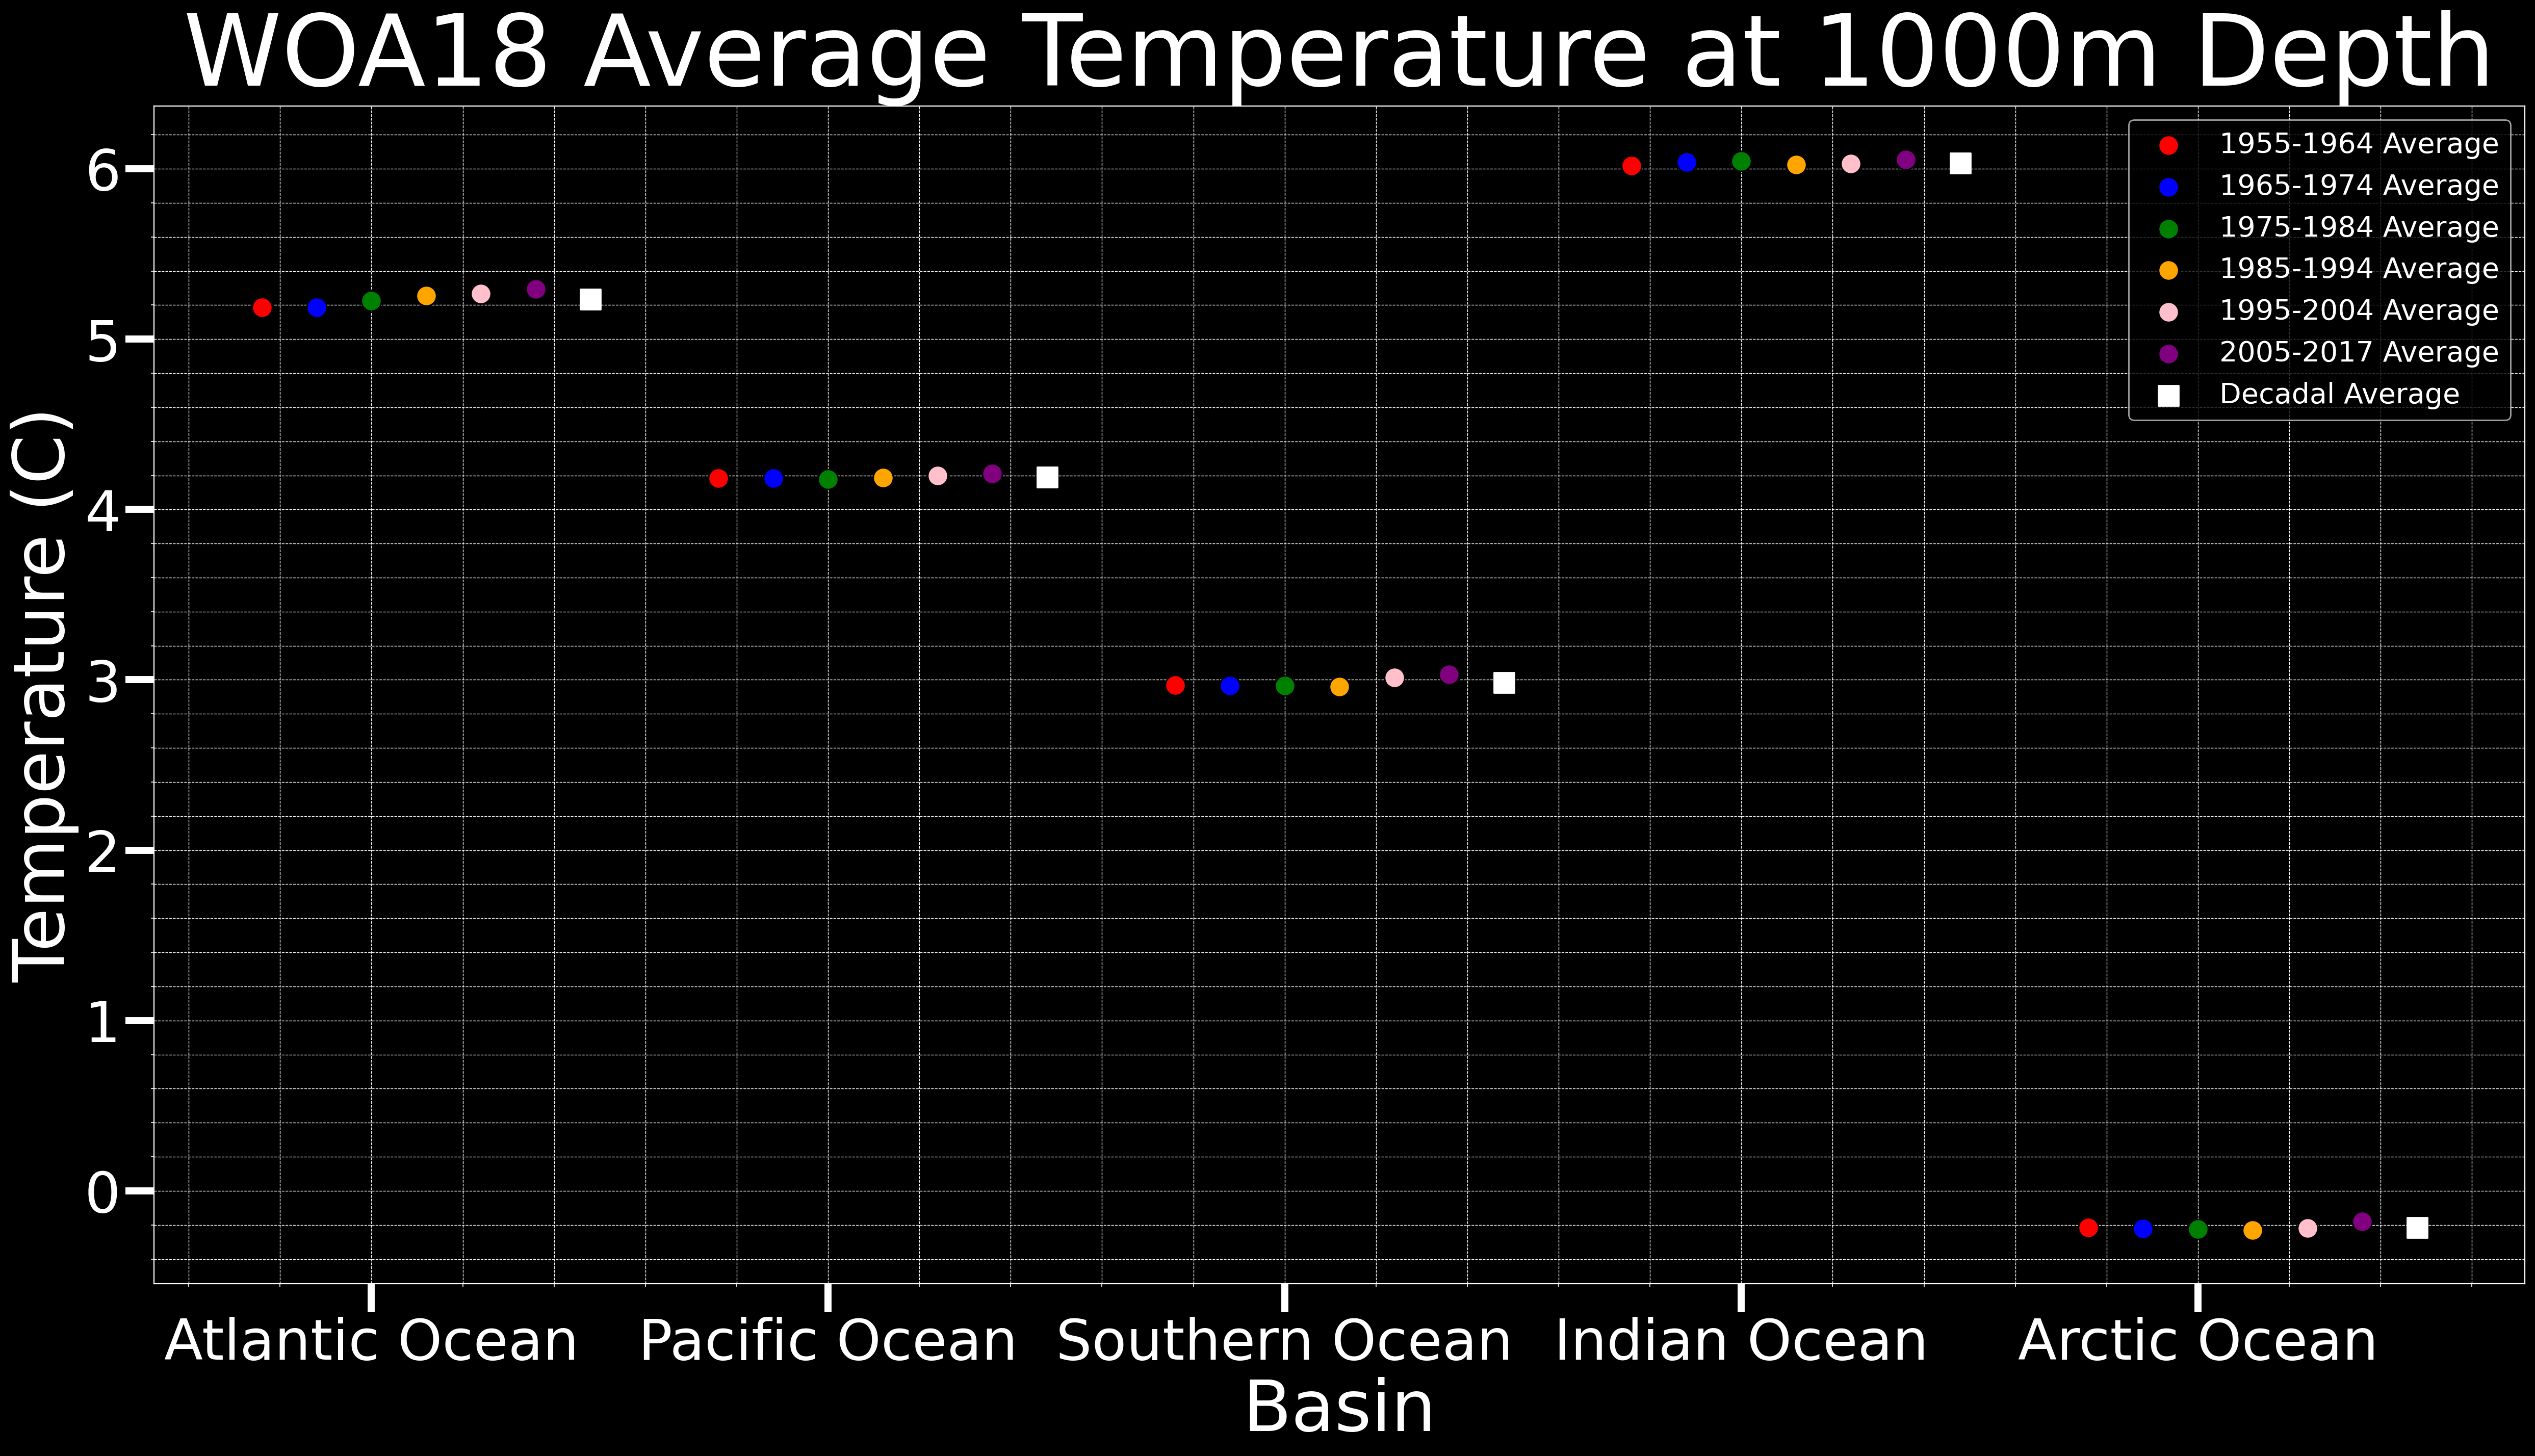

In [195]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] #assinging basins to x axis
#assigning data to variables
woa_55_64_1000 = [5.185698485581848,
4.182381717193431,
2.9698632744558573,
6.017776330378069,
-0.21657426065335872]
woa_65_74_1000 = [5.187498056393757,
4.1837130040305395,
2.9656235797099058,
6.037779547333845,
-0.2208475375197744]
woa_75_84_1000 = [5.226079292424071,
4.1767388433676365,
2.964392961821596,
6.045707530764,
-0.2236209031430634]
woa_85_94_1000 = [5.254896626473482,
4.1860121963109265,
2.960617859433133,
6.02497249357261,
-0.2296329594865349]
woa_95_04_1000 = [5.266477742142868,
4.198713216162039,
3.013712523267611,
6.030725676067688,
-0.220122649044458]
woa_05_17_1000 = [5.293445076286856,
4.2104764574707225,
3.0306472337020343,
6.055248207472613,
-0.17892909294817938]
woa_dec_1000 = [5.235519726386714,
4.18916845658299,
2.9831278578268474,
6.033843924328877,
-0.21456162590664854]

# X-axis positions for the basins
X_axis = np.arange(len(X)) 
marker_size = 200  # using one marker size for each scatter
shift = 0.12      # assigning shift value to neatly space data

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_1000, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_1000, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_1000, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_1000, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_1000, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_1000, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis +4 * shift, woa_dec_1000, color='white', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')




# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50)
plt.title("WOA18 Average Temperature at 1000m Depth", fontsize=70) 
# plt.ylim(272, 280)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Figure 4.** 10 year average of temperature in Celsius at 1000m depth from 1955-2017 with decadal average from WOA18.

Analysis- Temperature at 1000m depth has also started to increase indicating the oceans are starting to store more heat in the interior than they were doing previously. Overall the temperature seems to have increased less at this depth compared to the surface temperature.

## ESM4 Historical Model Ocean Temperatures 

### Sea Surface Temp

In [147]:
#extraxting thetao variable
gfdl_esm4_thetao=gfdl_esm4_thetao_data.thetao

In [148]:
#weighting grid cells as I will be averaging lat and lon
lat_esm4 =gfdl_esm4_thetao.coords['lat'].values #1-D numpy array of model's latitude values
lon_esm4 = gfdl_esm4_thetao.coords['lon'].values #1-D numpy array of model's longitude values

# make sure to replace the name of the data array if you chose a 
# different name and use the appropriate coordinate names within the ['']
# based on the coordinates of lat / lon in your dataset.

# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_esm4,lon_esm4)  

# The areacella_xarray function outputs a numpy array. Convert this back into 
# and xarray DataArray for further use. If this is a field you will be using 
# often. You may wish to save this newly created DataArray as a Dataset and save 
# as a netcdf file.

# here we assign dimensions and coordinates that are the same as our original SST array:

areacell_esm4 = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),\
                                                coords=(gfdl_esm4_thetao.coords['lat'],\
                                                        gfdl_esm4_thetao.coords['lon']))

In [149]:
weights_esm4=areacell_esm4

In [150]:
#slicing for same time as woa18
esm4_55_64=gfdl_esm4_thetao.sel(time=slice('1955-01-16', '1964-12-16')).mean('time')
esm4_65_74=gfdl_esm4_thetao.sel(time=slice('1965-01-16', '1974-12-16')).mean('time')
esm4_75_84=gfdl_esm4_thetao.sel(time=slice('1975-01-16', '1984-12-16')).mean('time')
esm4_85_94=gfdl_esm4_thetao.sel(time=slice('1985-01-16', '1994-12-16')).mean('time')
esm4_95_04=gfdl_esm4_thetao.sel(time=slice('1995-01-16', '2004-12-16')).mean('time')
esm4_05_17=gfdl_esm4_thetao.sel(time=slice('2005-01-16', '2017-12-16')).mean('time')
#calculating decadal averages to compare to WOA18
esm4_dec_av=((esm4_55_64+esm4_65_74+esm4_75_84+esm4_85_94+esm4_95_04+esm4_05_17)/6)

In [151]:
esm4_55_64

<xarray.DataArray 'thetao' (lev: 35, lat: 180, lon: 360)>
dask.array<mean_agg-aggregate, shape=(35, 180, 360), dtype=float32, chunksize=(35, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lev      (lev) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5

In [152]:
#applying weight, slicing for depth, and averaging lat and lon to get one average temperature value
weight_esm4_55_64_atlantic_0=(esm4_55_64*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_pacific_0=( esm4_55_64*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_southern_0=( esm4_55_64*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_indian_0=( esm4_55_64*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_arctic_0=( esm4_55_64*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_65_74_atlantic_0=( esm4_65_74*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_pacific_0=(esm4_65_74*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_southern_0=(esm4_65_74*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_indian_0=( esm4_65_74*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_arctic_0=( esm4_65_74*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_75_84_atlantic_0=( esm4_75_84*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_pacific_0=( esm4_75_84*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_southern_0=( esm4_75_84*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_indian_0=( esm4_75_84*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_arctic_0=( esm4_75_84*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_85_94_atlantic_0=( esm4_85_94*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_pacific_0=( esm4_85_94*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_southern_0=( esm4_85_94*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_indian_0=( esm4_85_94*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_arctic_0=( esm4_85_94*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_95_04_atlantic_0=( esm4_95_04*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_pacific_0=( esm4_95_04*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_southern_0=( esm4_95_04*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_indian_0=( esm4_95_04*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_arctic_0=( esm4_95_04*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_05_17_atlantic_0=( esm4_05_17*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_pacific_0=( esm4_05_17*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_southern_0=( esm4_05_17*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_indian_0=( esm4_05_17*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_arctic_0=( esm4_05_17*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_dec_atlantic_0=(esm4_dec_av*atlanticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_pacific_0=( esm4_dec_av*pacificocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_southern_0=( esm4_dec_av*southernocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_indian_0=( esm4_dec_av*indianocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_arctic_0=(esm4_dec_av*arcticocean).isel(lev=0).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

In [153]:
print(weight_esm4_55_64_atlantic_0.values)
print(weight_esm4_55_64_pacific_0.values)
print(weight_esm4_55_64_southern_0.values)
print(weight_esm4_55_64_indian_0.values)
print(weight_esm4_55_64_arctic_0.values)

22.055007411375048
22.838501968267646
7.896285841652177
25.713003230630385
0.44841313110263326


In [154]:
print(weight_esm4_65_74_atlantic_0.values)
print(weight_esm4_65_74_pacific_0.values)
print(weight_esm4_65_74_southern_0.values)
print(weight_esm4_65_74_indian_0.values)
print(weight_esm4_65_74_arctic_0.values)

22.20218008185678
22.739882177849843
7.957597683424093
25.734527273536635
0.29240197072292456


In [155]:
print(weight_esm4_75_84_atlantic_0.values)
print(weight_esm4_75_84_pacific_0.values)
print(weight_esm4_75_84_southern_0.values)
print(weight_esm4_75_84_indian_0.values)
print(weight_esm4_75_84_arctic_0.values)

22.22274305051252
22.808951237094966
8.077784778779618
25.920081837144345
-0.08320660951374802


In [156]:
print(weight_esm4_85_94_atlantic_0.values)
print(weight_esm4_85_94_pacific_0.values)
print(weight_esm4_85_94_southern_0.values)
print(weight_esm4_85_94_indian_0.values)
print(weight_esm4_85_94_arctic_0.values)

22.287988855050987
22.75468044935329
8.192662295914621
25.886847443659164
0.2395837570613313


In [157]:
print(weight_esm4_95_04_atlantic_0.values)
print(weight_esm4_95_04_pacific_0.values)
print(weight_esm4_95_04_southern_0.values)
print(weight_esm4_95_04_indian_0.values)
print(weight_esm4_95_04_arctic_0.values)

22.348661682314468
22.98761167079241
8.30426117267382
26.108491674680543
0.33766831349937265


In [158]:
print(weight_esm4_05_17_atlantic_0.values)
print(weight_esm4_05_17_pacific_0.values)
print(weight_esm4_05_17_southern_0.values)
print(weight_esm4_05_17_indian_0.values)
print(weight_esm4_05_17_arctic_0.values)

22.78572259030994
23.202771795606093
8.42406720676137
26.200594493314632
0.357453568609466


In [159]:
print(weight_esm4_dec_atlantic_0.values)
print(weight_esm4_dec_pacific_0.values)
print(weight_esm4_dec_southern_0.values)
print(weight_esm4_dec_indian_0.values)
print(weight_esm4_dec_arctic_0.values)


22.317050678144874
22.888733235526033
8.142109851140521
25.927257667772164
0.2653856935717388


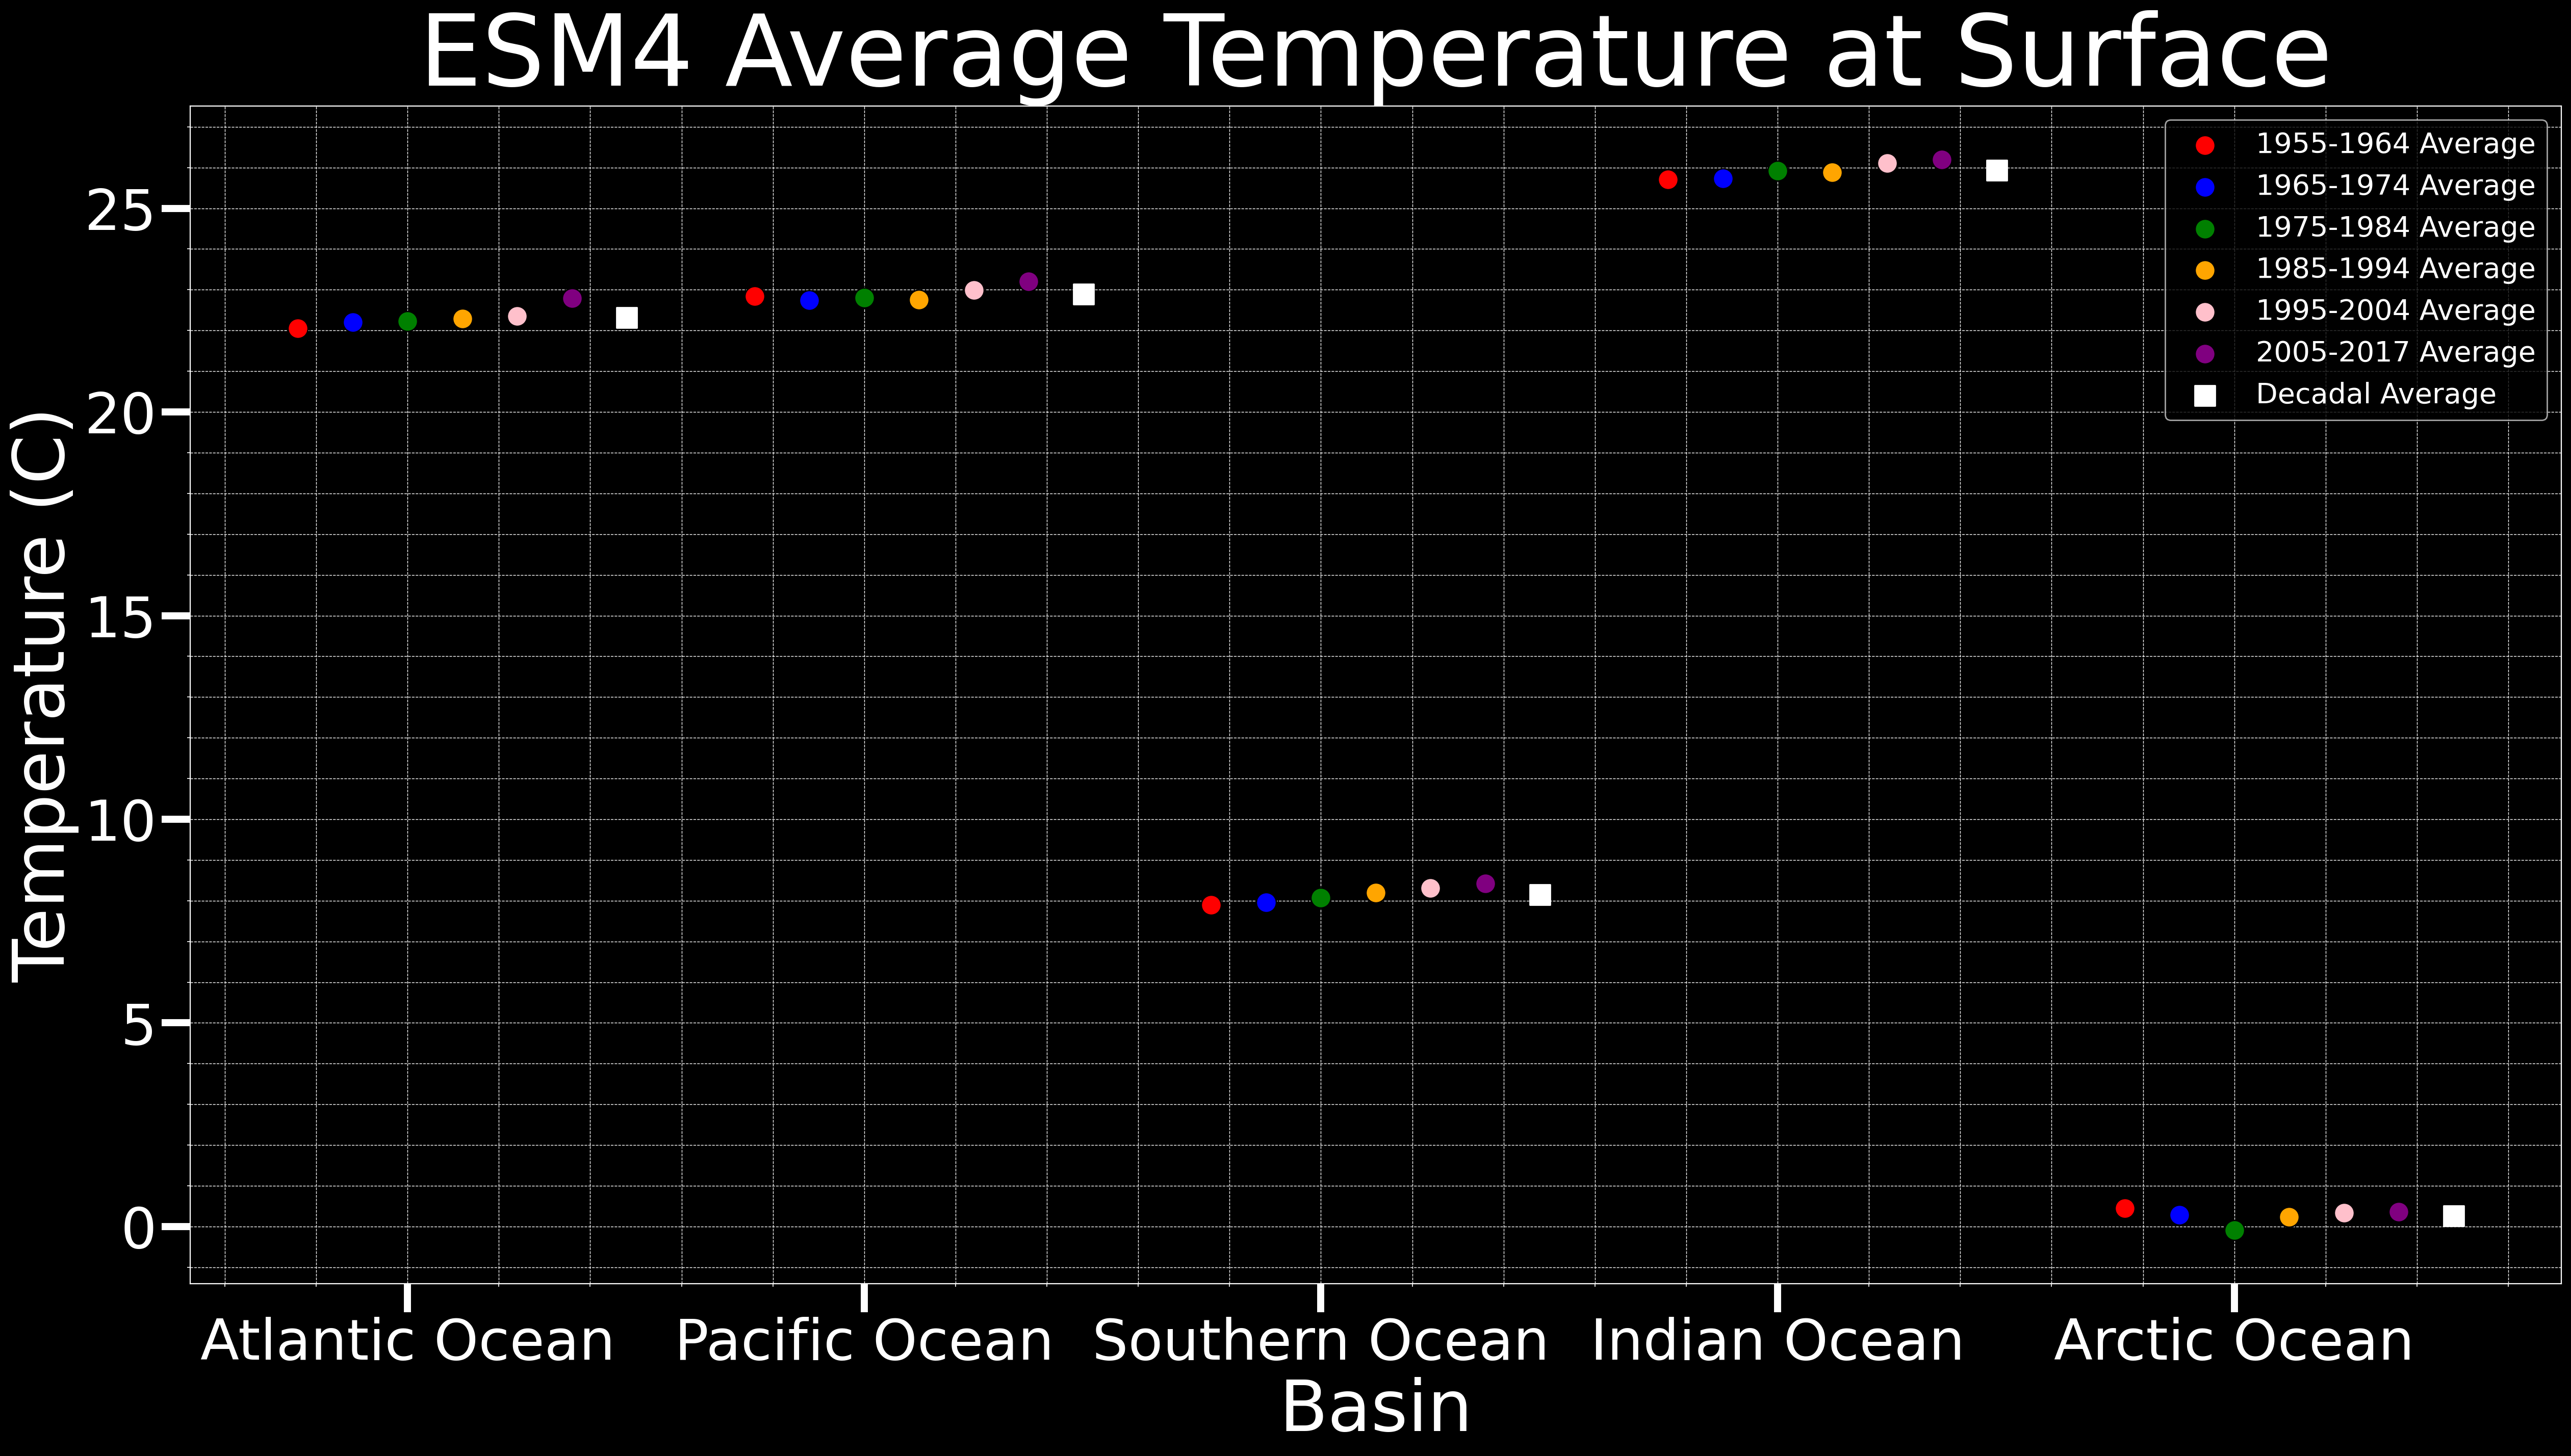

In [196]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] #assigning basins to x axis
#assigning data to variables
woa_55_64_0 = [22.055007411375048,
22.838501968267646,
7.896285841652177,
25.713003230630385,
0.44841313110263326]
woa_65_74_0 = [22.20218008185678,
22.739882177849843,
7.957597683424093,
25.734527273536635,
0.29240197072292456
]
woa_75_84_0 = [22.22274305051252,
22.808951237094966,
8.077784778779618,
25.920081837144345,
-0.08320660951374802]
woa_85_94_0 = [22.287988855050987,
22.75468044935329,
8.192662295914621,
25.886847443659164,
0.2395837570613313]
woa_95_04_0 = [22.348661682314468,
22.98761167079241,
8.30426117267382,
26.108491674680543,
0.33766831349937265

]
woa_05_17_0 = [22.78572259030994,
23.202771795606093,
8.42406720676137,
26.200594493314632,
0.357453568609466]
woa_dec_0 = [22.317050678144874,
22.888733235526033,
8.142109851140521,
25.927257667772164,
0.2653856935717388]

# X-axis positions for the oceans
X_axis = np.arange(len(X)) 
marker_size = 200  # setting marker size
shift = 0.12      # adding a shift to neatly space data

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_0, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_0, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_0, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_0, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_0, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_0, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis + 4 * shift, woa_dec_0, color='white', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')




# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50)
plt.title("ESM4 Average Temperature at Surface", fontsize=70) 

ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)

 **Figure 5.** 10-year average of temperature in Celsius at the ocean surface from 1955-2017 with a decadal average from ESM4 historical output.

Analysis- The general temperature of the basins is fairly similar to WOA18, in the Arctic there is a decrease in temperature in the third decade which is not present in WOA18. All basins show overall increased temperature throughout time, the Arctic differs more from WOA18 as it plateaus in temperature and in the WOA18 plot temperature increased.

### at depth 1000m

In [162]:
#assigning weight, selecting for 1000m depth, and averaging lat and lon to get one average temp value
weight_esm4_55_64_atlantic_1000=(esm4_55_64*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_pacific_1000=( esm4_55_64*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_southern_1000=( esm4_55_64*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_indian_1000=( esm4_55_64*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_55_64_arctic_1000=( esm4_55_64*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_65_74_atlantic_1000=( esm4_65_74*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_pacific_1000=(esm4_65_74*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_southern_1000=(esm4_65_74*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_indian_1000=( esm4_65_74*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_65_74_arctic_1000=( esm4_65_74*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_75_84_atlantic_1000=( esm4_75_84*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_pacific_1000=( esm4_75_84*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_southern_1000=( esm4_75_84*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_indian_1000=( esm4_75_84*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_75_84_arctic_1000=( esm4_75_84*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_85_94_atlantic_1000=( esm4_85_94*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_pacific_1000=( esm4_85_94*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_southern_1000=( esm4_85_94*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_indian_1000=( esm4_85_94*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_85_94_arctic_1000=( esm4_85_94*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_95_04_atlantic_1000=( esm4_95_04*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_pacific_1000=( esm4_95_04*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_southern_1000=( esm4_95_04*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_indian_1000=( esm4_95_04*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_95_04_arctic_1000=( esm4_95_04*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_05_17_atlantic_1000=( esm4_05_17*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_pacific_1000=( esm4_05_17*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_southern_1000=( esm4_05_17*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_indian_1000=( esm4_05_17*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_05_17_arctic_1000=( esm4_05_17*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

weight_esm4_dec_atlantic_1000=(esm4_dec_av*atlanticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_pacific_1000=( esm4_dec_av*pacificocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_southern_1000=( esm4_dec_av*southernocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_indian_1000=( esm4_dec_av*indianocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])
weight_esm4_dec_arctic_1000=(esm4_dec_av*arcticocean).sel(lev=1000).weighted(areacell_esm4).mean(dim=['lat', 'lon'])

**extracting esm4 1000m depth values**

In [173]:
print(weight_esm4_55_64_atlantic_1000.values)
print(weight_esm4_55_64_pacific_1000.values)
print(weight_esm4_55_64_southern_1000.values)
print(weight_esm4_55_64_indian_1000.values)
print(weight_esm4_55_64_arctic_1000.values)

4.916439275118539
4.022387079402314
3.163330133421703
5.553135247194636
0.5525158649509541


In [174]:
print(weight_esm4_65_74_atlantic_1000.values)
print(weight_esm4_65_74_pacific_1000.values)
print(weight_esm4_65_74_southern_1000.values)
print(weight_esm4_65_74_indian_1000.values)
print(weight_esm4_65_74_arctic_1000.values)

4.924364587075243
4.033145949289559
3.1164465000189616
5.526905095448402
0.5826224597781486


In [175]:
print(weight_esm4_75_84_atlantic_1000.values)
print(weight_esm4_75_84_pacific_1000.values)
print(weight_esm4_75_84_southern_1000.values)
print(weight_esm4_75_84_indian_1000.values)
print(weight_esm4_75_84_arctic_1000.values)

4.936981239216921
4.03523653273005
3.1293642215150212
5.506754729394183
0.5458364302758443


In [176]:
print(weight_esm4_85_94_atlantic_1000.values)
print(weight_esm4_85_94_pacific_1000.values)
print(weight_esm4_85_94_southern_1000.values)
print(weight_esm4_85_94_indian_1000.values)
print(weight_esm4_85_94_arctic_1000.values)

4.944971600820298
4.016433434985382
3.1539048270483643
5.500814109454074
0.5291121025267225


In [177]:
print(weight_esm4_95_04_atlantic_1000.values)
print(weight_esm4_95_04_pacific_1000.values)
print(weight_esm4_95_04_southern_1000.values)
print(weight_esm4_95_04_indian_1000.values)
print(weight_esm4_95_04_arctic_1000.values)

4.953029794427722
4.012469570505863
3.146343901820809
5.499854315547304
0.5549380581636143


In [178]:
print(weight_esm4_05_17_atlantic_1000.values)
print(weight_esm4_05_17_pacific_1000.values)
print(weight_esm4_05_17_southern_1000.values)
print(weight_esm4_05_17_indian_1000.values)
print(weight_esm4_05_17_arctic_1000.values)

4.982570115140262
4.006769275198728
3.173503733887772
5.517967504723026
0.4921064692427515


In [179]:
print(weight_esm4_dec_atlantic_1000.values)
print(weight_esm4_dec_pacific_1000.values)
print(weight_esm4_dec_southern_1000.values)
print(weight_esm4_dec_indian_1000.values)
print(weight_esm4_dec_arctic_1000.values)

4.943059438502878
4.021073641645118
3.1471488933360123
5.517571827727802
0.5428552309679211


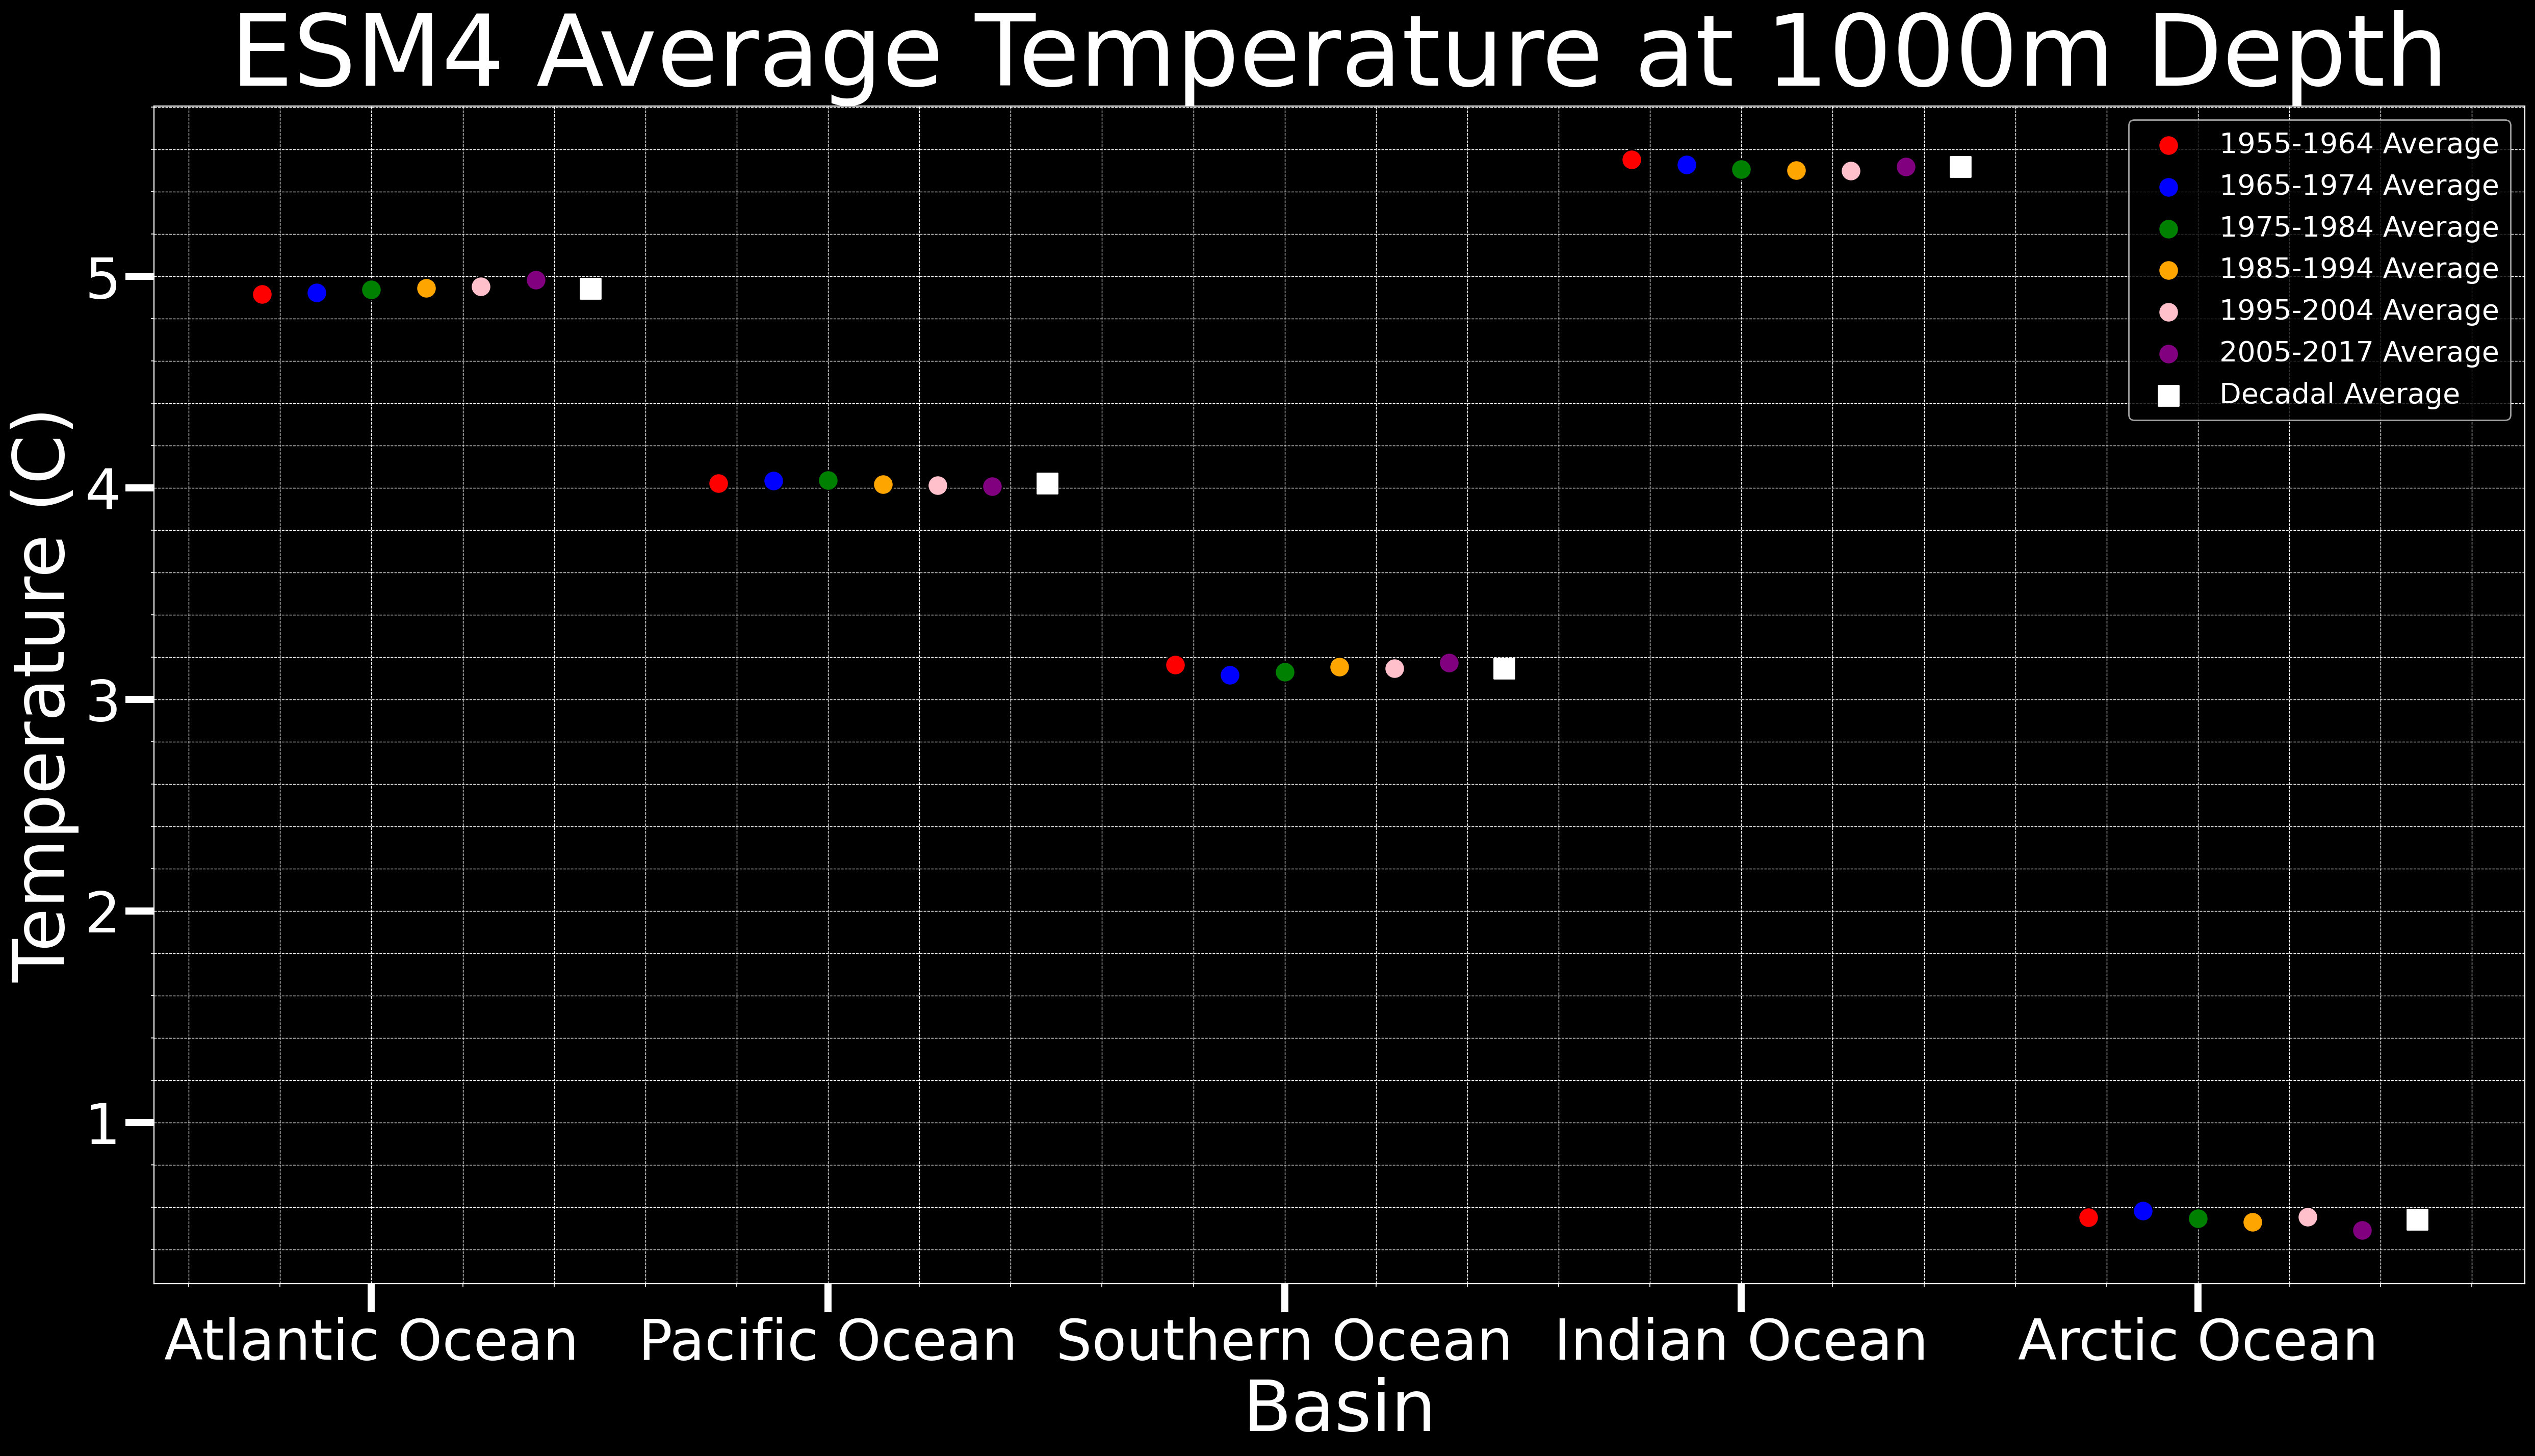

In [197]:
X = ['Atlantic Ocean', 'Pacific Ocean', 'Southern Ocean', 'Indian Ocean', 'Arctic Ocean'] #assigning basins to x axis
#assigning data to variables
woa_55_64_1000 = [4.916439275118539,
4.022387079402314,
3.163330133421703,
5.553135247194636,
0.5525158649509541]
woa_65_74_1000 = [4.924364587075243,
4.033145949289559,
3.1164465000189616,
5.526905095448402,
0.5826224597781486

]
woa_75_84_1000 = [4.936981239216921,
4.03523653273005,
3.1293642215150212,
5.506754729394183,
0.5458364302758443]
woa_85_94_1000 = [4.944971600820298,
4.016433434985382,
3.1539048270483643,
5.500814109454074,
0.5291121025267225
]
woa_95_04_1000 = [4.953029794427722,
4.012469570505863,
3.146343901820809,
5.499854315547304,
0.5549380581636143]
woa_05_17_1000 = [4.982570115140262,
4.006769275198728,
3.173503733887772,
5.517967504723026,
0.4921064692427515,

]
woa_dec_1000 = [4.943059438502878,
4.021073641645118,
3.1471488933360123,
5.517571827727802,
0.5428552309679211]

# X-axis positions for the basins
X_axis = np.arange(len(X)) 
marker_size = 200  # setting a marker size
shift = 0.12     # adding a shift to neatly space data

# Create the plot
fig, ax = plt.subplots(figsize=(30, 15))

# Scatter plot for each time period
ax.scatter(X_axis - 2 * shift, woa_55_64_1000, color='r', s=marker_size, label='1955-1964 Average', edgecolor='black')
ax.scatter(X_axis - shift, woa_65_74_1000, color='blue', s=marker_size, label='1965-1974 Average', edgecolor='black')
ax.scatter(X_axis, woa_75_84_1000, color='green', s=marker_size, label='1975-1984 Average', edgecolor='black')
ax.scatter(X_axis + shift, woa_85_94_1000, color='orange', s=marker_size, label='1985-1994 Average', edgecolor='black')
ax.scatter(X_axis + 2 * shift, woa_95_04_1000, color='pink', s=marker_size, label='1995-2004 Average', edgecolor='black')
ax.scatter(X_axis + 3 * shift, woa_05_17_1000, color='purple', s=marker_size, label='2005-2017 Average', edgecolor='black')
ax.scatter(X_axis+4*shift, woa_dec_1000, color='white', s=marker_size, label='Decadal Average', edgecolor='white', marker='s')




# Grid, ticks, and labels
ax.grid(linewidth=0.5, linestyle='--', which='both', axis='both')
ax.set_axisbelow(True)
plt.xticks(X_axis, X, fontsize=40)
plt.yticks(fontsize=40)
plt.xlabel("Basin", fontsize=50) 
plt.ylabel("Temperature (C)", fontsize=50)
plt.title("ESM4 Average Temperature at 1000m Depth", fontsize=70) 
# plt.ylim(272, 280)
ax.minorticks_on()

# Legend and tick adjustments
ax.legend(fontsize=20)
ax.tick_params(which='major', width=5)
ax.tick_params(which='major', length=20)


 **Figure 6.** 10 year average of temperature in Celsius at 1000m depth from 1955-2017 with decadal average from the ESM4 historical experiment.

Analysis-The trends at this depth differ from WOA18. There is a decrease in temperature in the Pacific which is not shown in the WOA18 data. The trends also differ in the Indian ocean which decrease and plateaus in ESM4, however in WOA18 it increases by the end of 2017. Lastly in the Arctic Ocean the data is much more variable with no real trend being show and when comparing to WOA18 which shows an increase in temperature, ESM4 shows a decrease by the end of 2017.

## Observed Steric, Thermosteric, and Halosteric Sea Level

### Steric Sea Level 0-700 Meters

In [184]:
steric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [185]:
steric_time_0_700 = steric_sea_level_0_700['time'].values
base_year = 2005
time_as_years_steric_700 = base_year + (time_0_2000 / 12) -50.5
print(time_as_years_steric_700[:18])

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]


In [186]:
steric_sea_content_700_global = steric_sea_level_0_700['s_mm_fs'].mean(dim=['lat', 'lon', 'depth'])
time_years = np.floor(heat_content_0_2000['time'].values).astype(int) 
steric_700_trend_slope = (steric_sea_content_700_global [-1] - heat_content_2000_global[0]) / (time_years[-1] - time_years[0])
print(f"Trend 0-2000m (Global): {trend_2000_slope:.2f} units/year")

Trend 0-2000m (Global): 0.02 units/year


In [187]:
steric_sea_content_700_global = steric_sea_level_0_700['s_mm_fs'].mean(dim=['lat', 'lon', 'depth'])

In [188]:
time_as_years_steric_700 = base_year + (steric_time_0_700 / 12) - 50.5 
steric_sea_content_700_global = steric_sea_level_0_700['s_mm_fs'].mean(dim=['lat', 'lon', 'depth'])

northern_hemisphere = steric_sea_level_0_700['yearl_s_mm_NI'].values
southern_hemisphere = steric_sea_level_0_700['yearl_s_mm_SI'].values

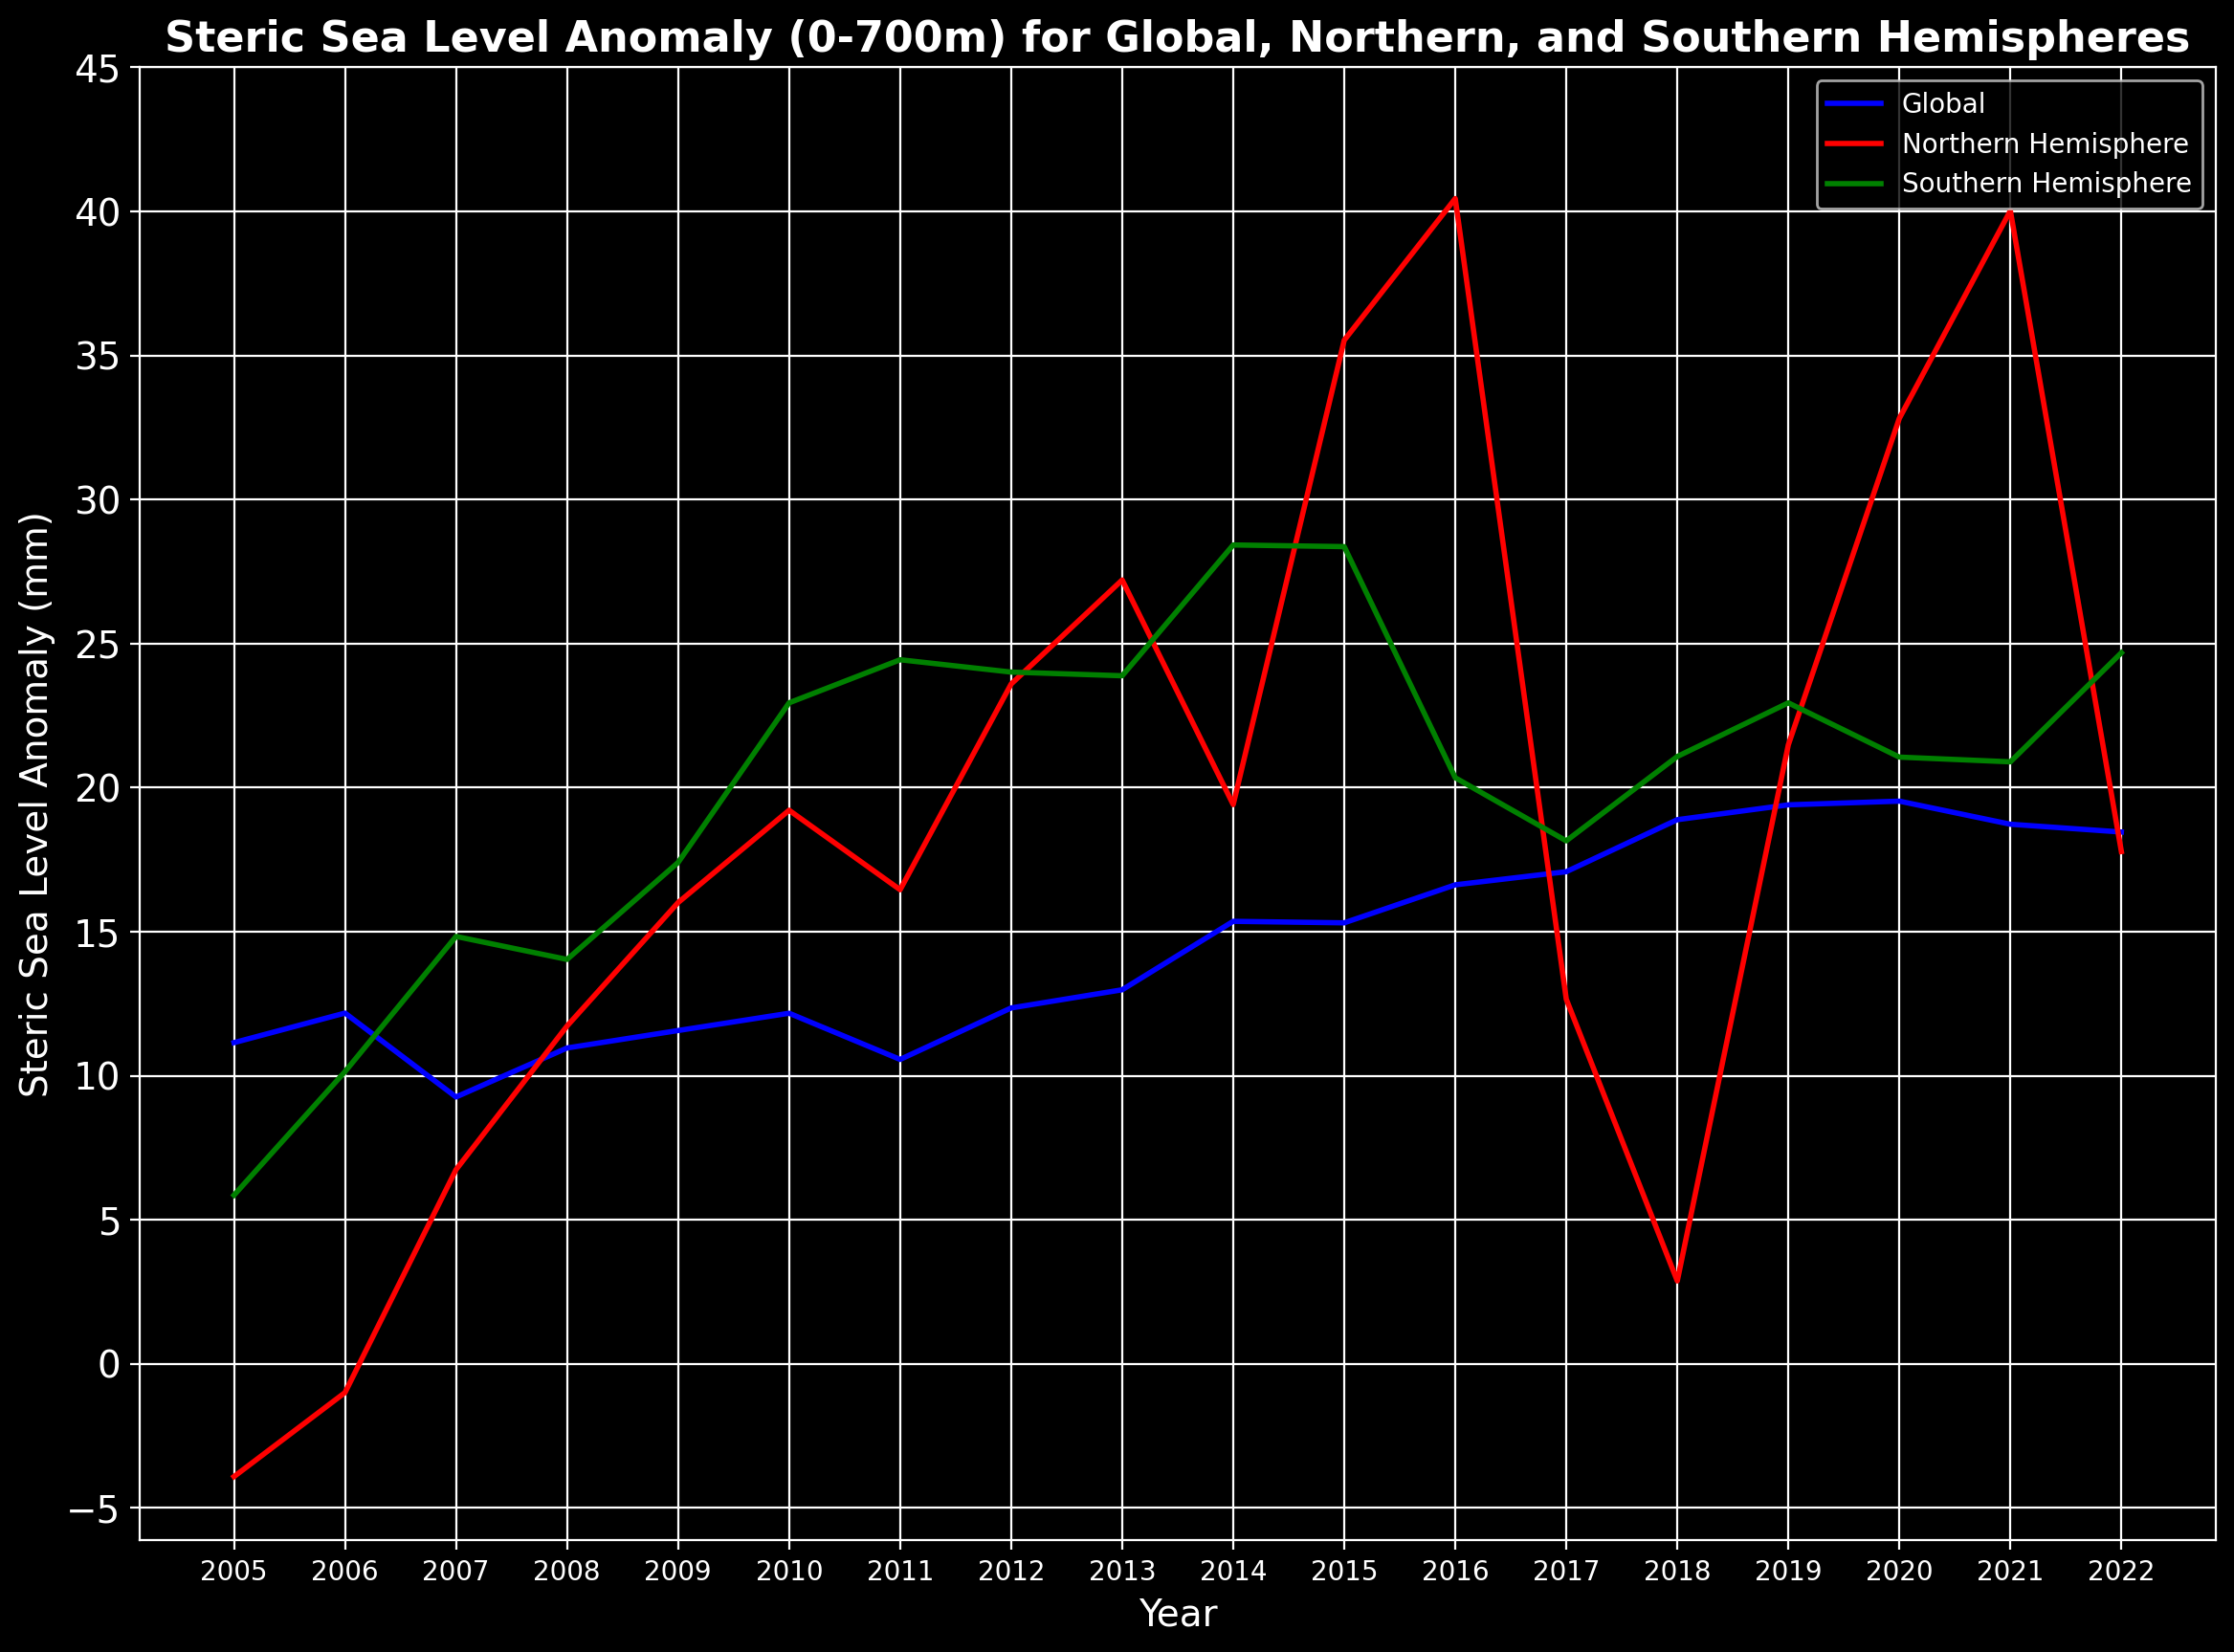

In [189]:
plt.figure(figsize=(14, 10))
plt.plot(time_as_years_steric_700, steric_sea_content_700_global, label='Global', color='blue', linewidth=2)
plt.plot(time_as_years_steric_700, northern_hemisphere, label='Northern Hemisphere', color='red', linewidth=2)
plt.plot(time_as_years_steric_700, southern_hemisphere, label='Southern Hemisphere', color='green', linewidth=2)
plt.xticks(np.arange(int(time_as_years_steric_700.min()), int(time_as_years_steric_700.max()) + 1, 1))
y_min = min(steric_sea_content_700_global.min(), northern_hemisphere.min(), southern_hemisphere.min())
y_max = max(steric_sea_content_700_global.max(), northern_hemisphere.max(), southern_hemisphere.max())
plt.yticks(np.arange(np.floor(y_min / 5) * 5, np.ceil(y_max / 5) * 5 + 5, 5))
plt.tick_params(axis='y', labelsize=14) 
plt.xlabel('Year', fontsize=14)
plt.ylabel('Steric Sea Level Anomaly (mm)', fontsize=14)
plt.title('Steric Sea Level Anomaly (0-700m) for Global, Northern, and Southern Hemispheres', fontsize=16, fontweight='bold')
plt.legend()
plt.grid(True)
plt.show()

**Figure 7.** Steric Sea Level Anomalies in the upper ocean(0-700m depth) for Global, Northern Hemisphere, and Southern Hemisphere.
Units are in millimeters and data is from NOAA's Center for Environmental Information. 

### Steric Sea Level 0-2000 Meters

In [200]:
steric_sea_level_0_2000

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 18)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 606.0 618.0 630.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_mm_fs             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_s_mm_se_IO    (time) float32 ...
    yearl_s_mm_NI       (time) float32 ...
    yearl_s_mm_se_NI    (time) float32 ...
    yearl_s_mm_SI       (time) float32 ...
    yearl_s_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean total steric sea level anomalies fr...
    summary:                         Mean total steric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [198]:
adjusted_time = [t - pd.DateOffset(years=0) for t in steric2000_time]
steric2000_time = [base_date + pd.DateOffset(months=int(month)) for month in steric2000_time_in_months]
print("Adjusted time values:", adjusted_time[:5])

Adjusted time values: [Timestamp('2005-07-01 00:00:00'), Timestamp('2006-07-01 00:00:00'), Timestamp('2007-07-01 00:00:00'), Timestamp('2008-07-01 00:00:00'), Timestamp('2009-07-01 00:00:00')]


In [202]:
steric_sea_level_anomaly_2000_NH = steric_sea_level_0_2000['yearl_s_mm_NH'].values  
steric_sea_level_anomaly_2000_SH = steric_sea_level_0_2000['yearl_s_mm_SH'].values  
steric_sea_level_anomaly_2000_WO = steric_sea_level_0_2000['yearl_s_mm_WO'].values  

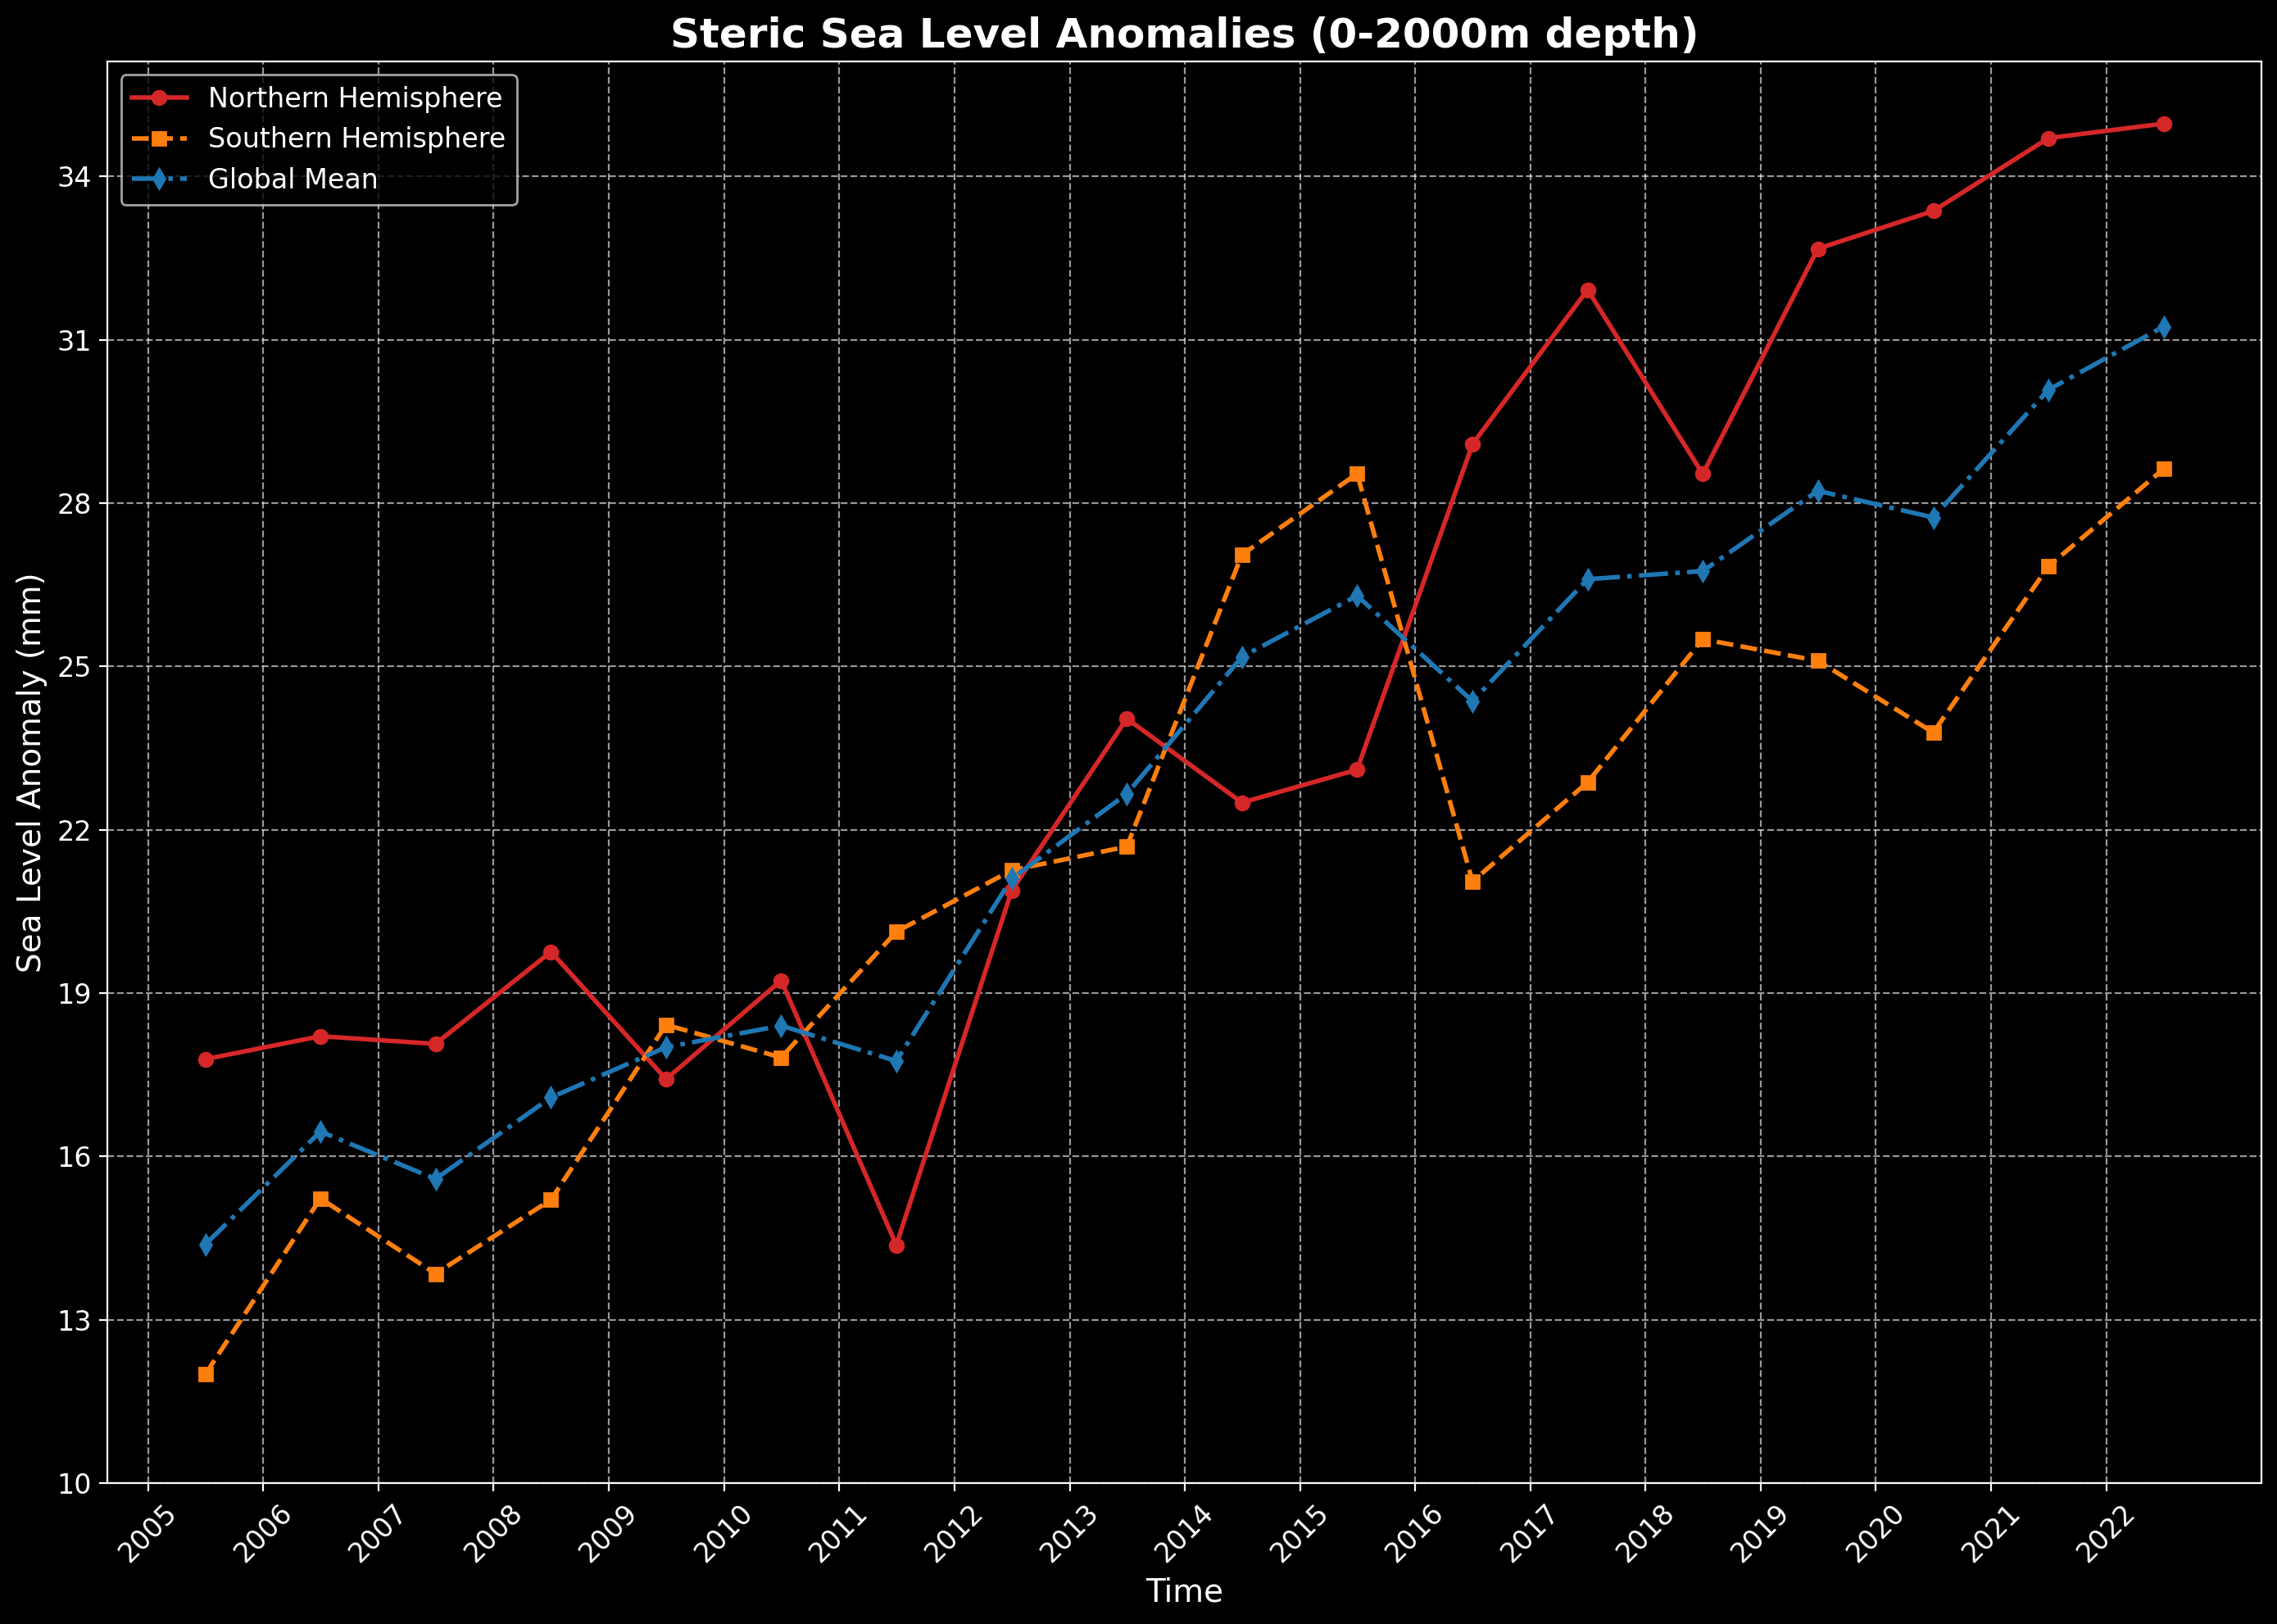

In [203]:
plt.figure(figsize=(14, 10))
plt.plot(adjusted_time, steric_sea_level_anomaly_2000_NH, label='Northern Hemisphere', color='tab:red', linestyle='-', linewidth=2, marker='o')
plt.plot(adjusted_time, steric_sea_level_anomaly_2000_SH, label='Southern Hemisphere', color='tab:orange', linestyle='--', linewidth=2, marker='s')
plt.plot(adjusted_time, steric_sea_level_anomaly_2000_WO, label='Global Mean', color='tab:blue', linestyle='-.', linewidth=2, marker='d')
plt.title('Steric Sea Level Anomalies (0-2000m depth)', fontsize=18, fontweight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
years = [t.year for t in adjusted_time]
start_year = min(years)
end_year = max(years)
xticks = list(range(start_year, end_year + 1, 1))
plt.xticks([pd.Timestamp(f'{year}-01-01') for year in xticks], labels=xticks, rotation=45, fontsize=12)
y_min, y_max = plt.ylim()
yticks = list(range(int(y_min), int(y_max) + 1, 3))
plt.yticks(yticks, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Figure 8.** Steric Sea Level Anomalies (0-2000m depth) for the Northern Hemisphere, Southern Hemisphere, and Global Mean
steric sea level anomalies are measured in millimeters and data is from NOAA's Center for Environmental Information. 

### Thermosteric Sea Level 0-700 Meters

In [202]:
thermosteric_sea_level_0_700

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 1, time: 68)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * time                (time) float32 6.0 18.0 30.0 42.0 ... 786.0 798.0 810.0
Dimensions without coordinates: nbounds, depth
Data variables: (12/31)
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    a_mm_ts             (time, depth, lat, lon) float32 ...
    ...                  ...
    yearl_a_mm_se_IO    (time) float32 ...
    yearl_a_mm_NI       (time) float32 ...
    yearl_a_mm_se_NI    (time) float32 ...
    yearl_a_mm_SI       (time) float32 ...
    yearl_a_mm_se_SI    (time) float32 ...
    basin_mask          (lat, lon) float64 ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           Mean thermosteric sea level anomalies fr...
    summary:                         Mean thermosteric sea level anomaly from...
    references:                      Levitus, S., J. I. Antonov, T. P. Boyer,...
    institution:                     National Oceanographic Data Center(NODC)
    comment:                         
    ...                              ...
    publisher_name:                  US NATIONAL OCEANOGRAPHIC DATA CENTER
    publisher_url:                   http://www.nodc.noaa.gov/
    publisher_email:                 NODC.Services@noaa.gov
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   http://www.nodc.noaa.gov/OC5/3M_HEAT_CON...

In [203]:
time_in_months = thermosteric_sea_level_0_700['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
print(time[:5])

[Timestamp('1955-07-16 00:00:00'), Timestamp('1956-07-16 00:00:00'), Timestamp('1957-07-16 00:00:00'), Timestamp('1958-07-16 00:00:00'), Timestamp('1959-07-16 00:00:00')]


In [204]:
time_in_months = thermosteric_sea_level_0_700['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
thermo_sea_level_anomaly_700_NH = thermosteric_sea_level_0_700['yearl_a_mm_NH'].values
thermo_sea_level_anomaly_700_SH = thermosteric_sea_level_0_700['yearl_a_mm_SH'].values
thermo_sea_level_anomaly_700_WO = thermosteric_sea_level_0_700['yearl_a_mm_WO'].values

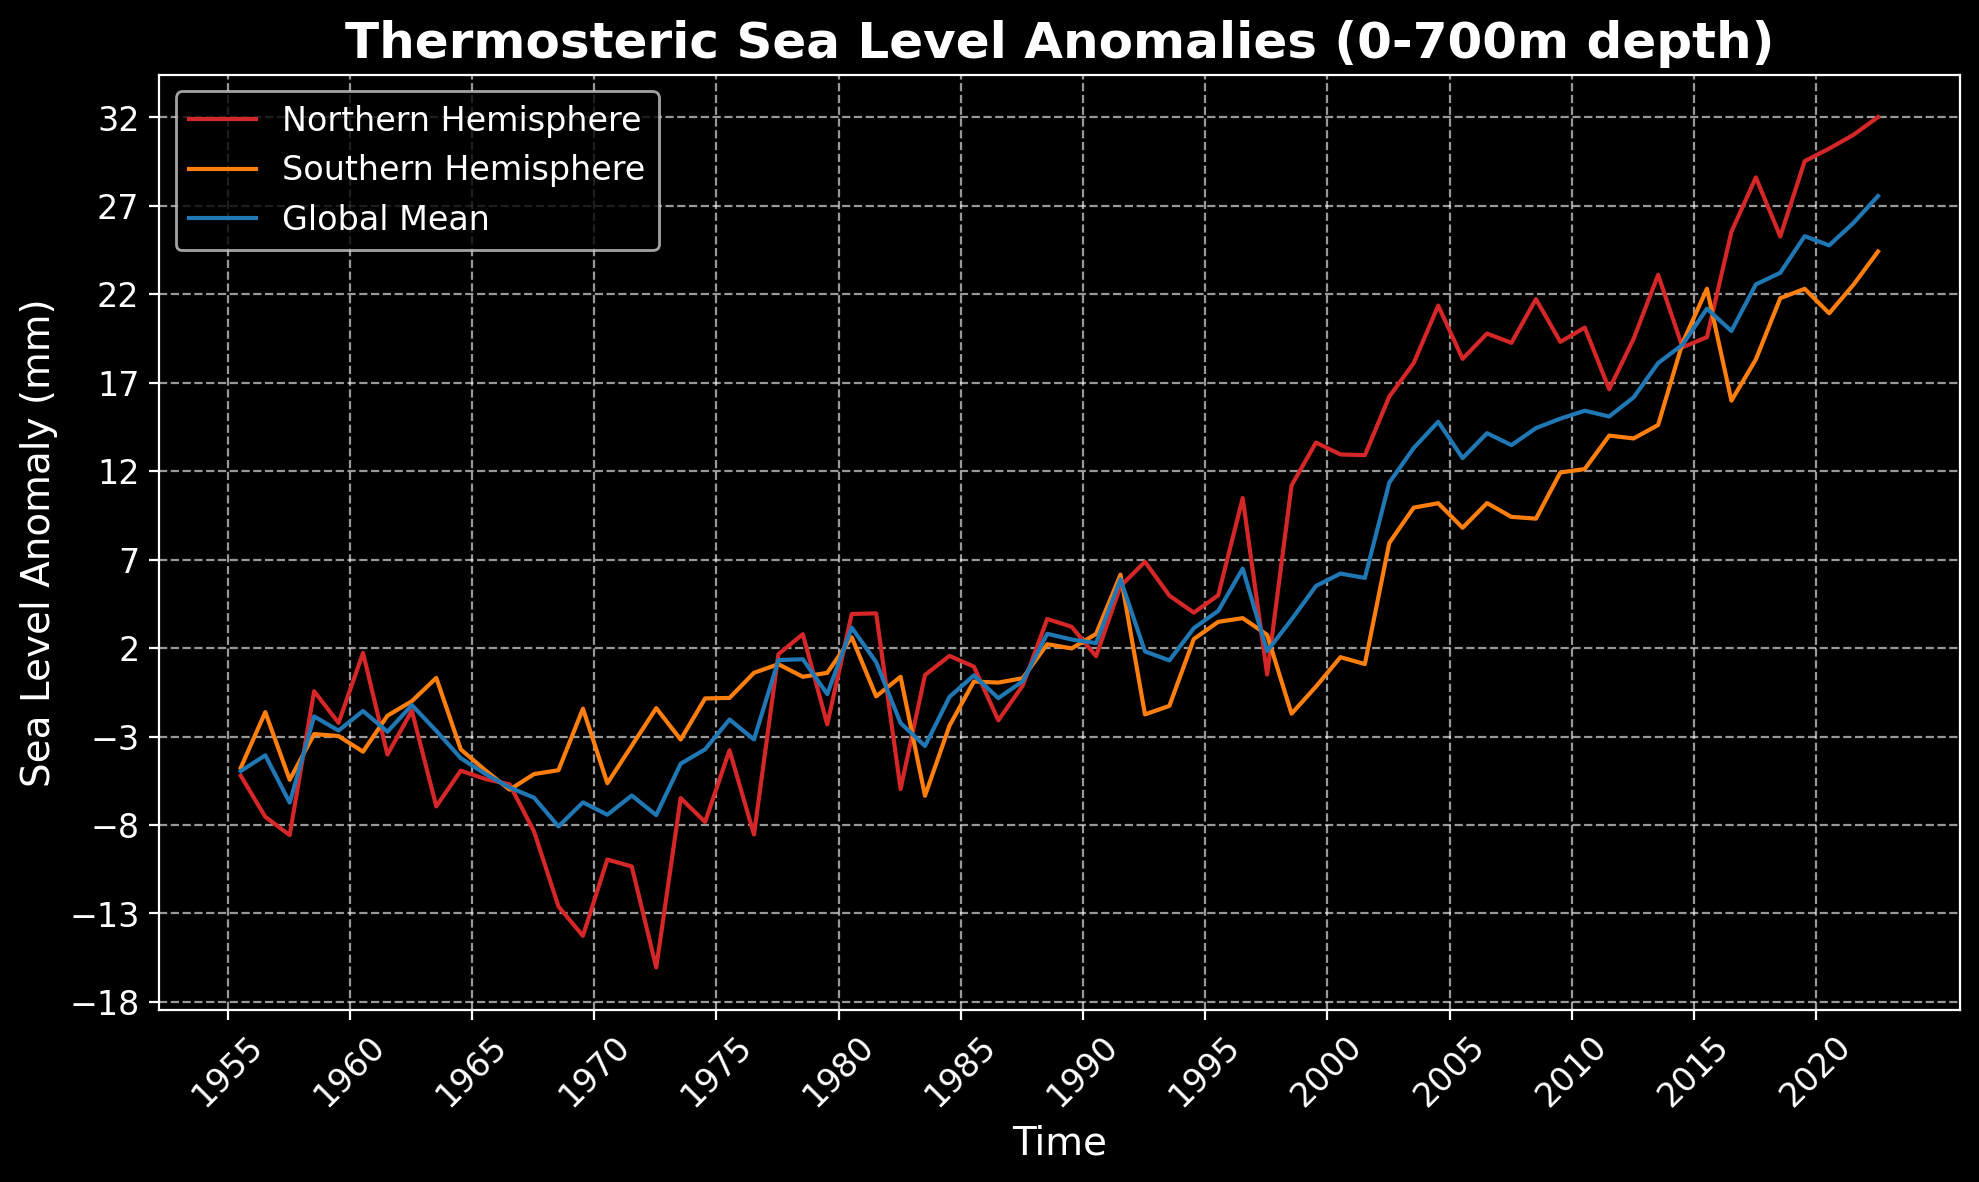

In [205]:
plt.figure(figsize=(10, 6))
plt.plot(time, thermo_sea_level_anomaly_700_NH, label='Northern Hemisphere', color='tab:red')
plt.plot(time, thermo_sea_level_anomaly_700_SH, label='Southern Hemisphere', color='tab:orange')
plt.plot(time, thermo_sea_level_anomaly_700_WO, label='Global Mean', color='tab:blue')
plt.title('Thermosteric Sea Level Anomalies (0-700m depth)', fontsize=18, fontweight='bold') 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
years = pd.to_datetime(time).year  
start_year = years.min()
end_year = years.max()
xticks = list(range(start_year, end_year + 1, 5))
plt.xticks(pd.to_datetime([f"{year}-01-01" for year in xticks]), labels=xticks, rotation=45, fontsize=12)
y_min, y_max = plt.ylim()  
yticks = list(range(int(y_min), int(y_max) + 1, 5))  
plt.yticks(yticks, fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Figure 9.** Thermosteric sea level anomalies (0-700m depth) over time from 1955-2022 measured in millimeters. Data from NOAA's Center for Environmental Information. 

### Thermosteric Sea level 0-2000m

In [206]:
time_in_months = thermosteric_sea_level_0_2000['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(months)) for months in time_in_months]
print(time[:5])

[Timestamp('2005-07-16 00:00:00'), Timestamp('2006-07-16 00:00:00'), Timestamp('2007-07-16 00:00:00'), Timestamp('2008-07-16 00:00:00'), Timestamp('2009-07-16 00:00:00')]


In [207]:
time_in_months = thermosteric_sea_level_0_2000['time'].values
base_date = pd.to_datetime('1955-01-16')
time = [base_date + pd.DateOffset(months=int(month)) for month in time_in_months]
sea_level_anomaly_2000_NH = thermosteric_sea_level_0_2000['yearl_a_mm_NH'].values
sea_level_anomaly_2000_SH = thermosteric_sea_level_0_2000['yearl_a_mm_SH'].values
sea_level_anomaly_2000_WO = thermosteric_sea_level_0_2000['yearl_a_mm_WO'].values

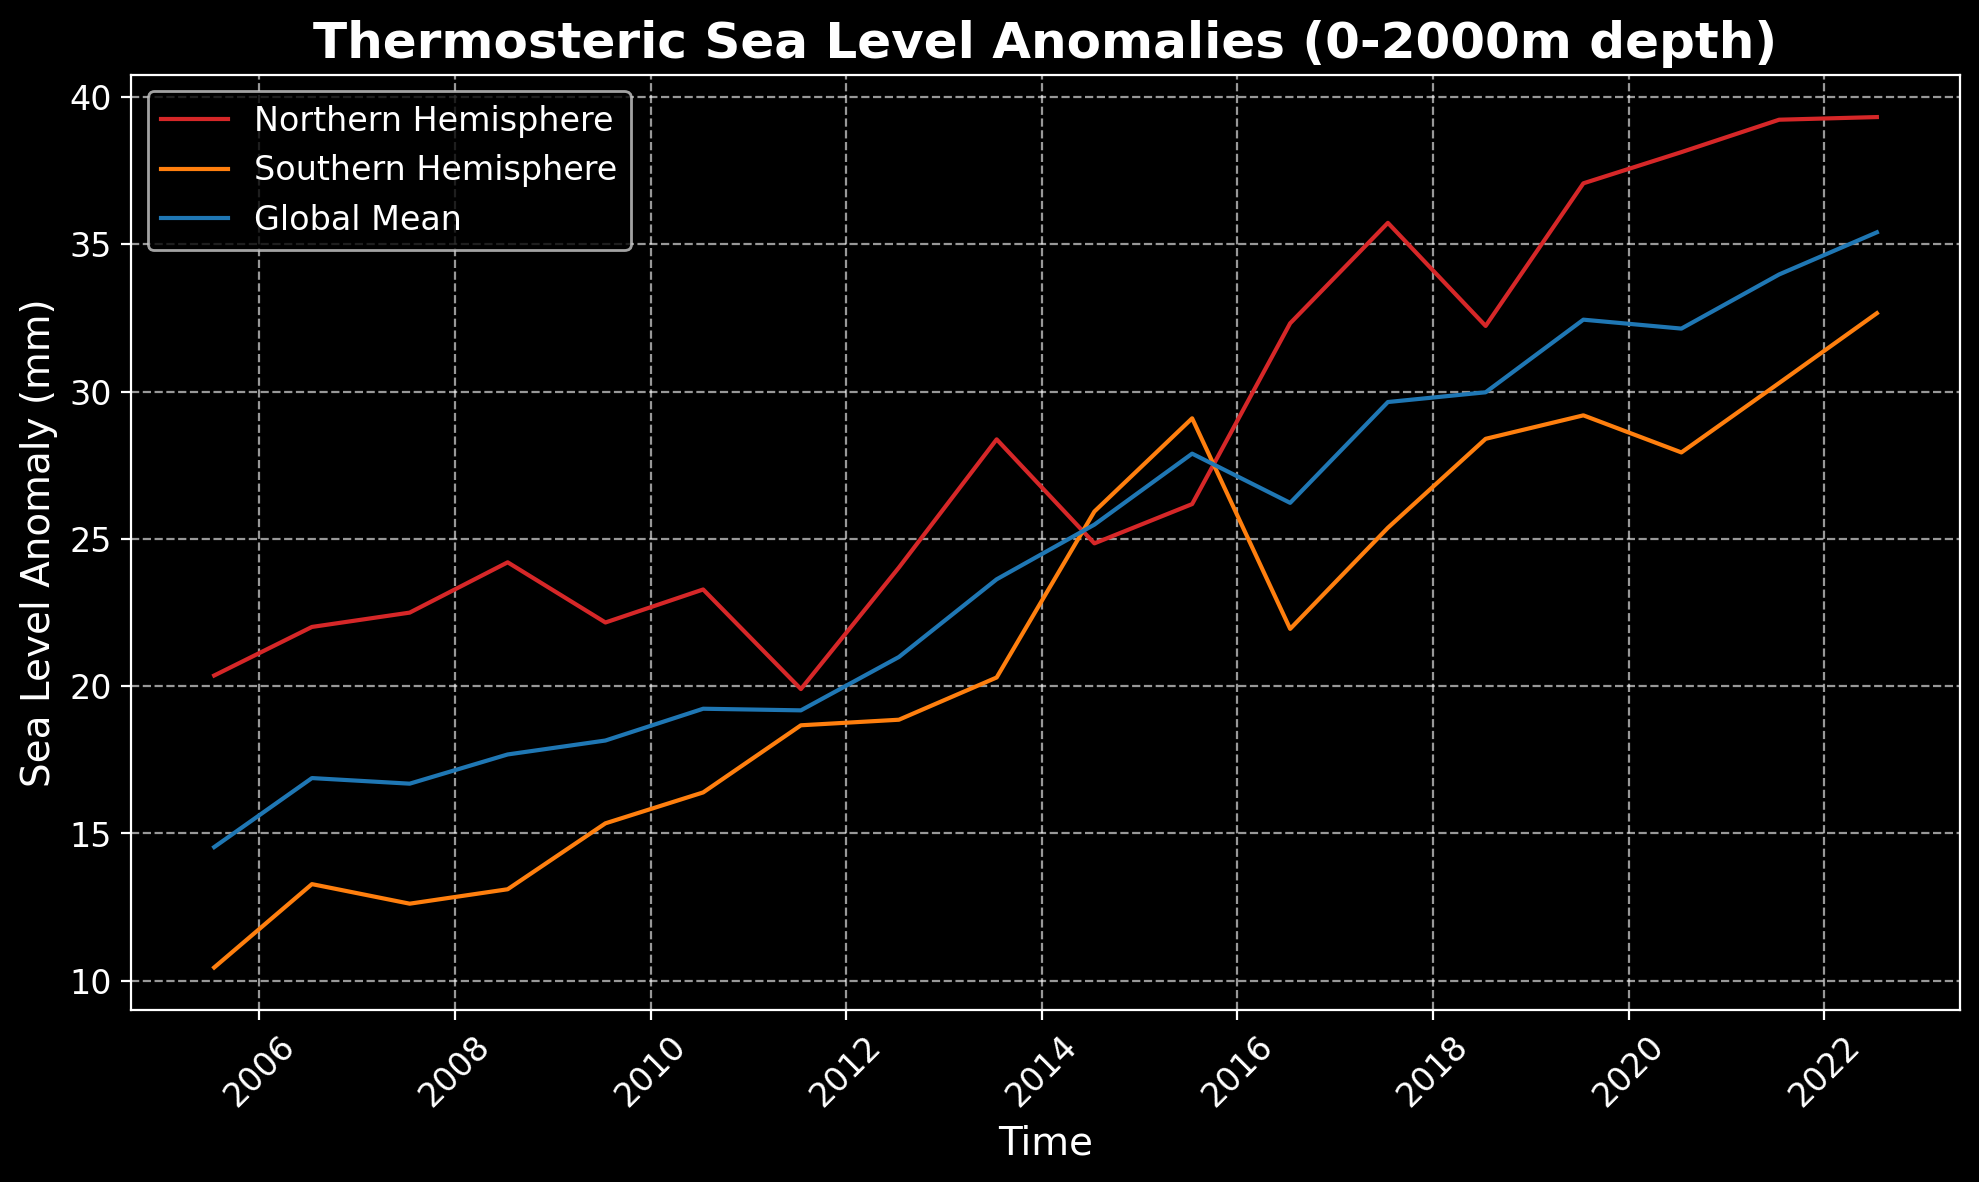

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(time, sea_level_anomaly_2000_NH, label='Northern Hemisphere', color='tab:red')
plt.plot(time, sea_level_anomaly_2000_SH, label='Southern Hemisphere', color='tab:orange')  # Change this line
plt.plot(time, sea_level_anomaly_2000_WO, label='Global Mean', color='tab:blue')
plt.title('Thermosteric Sea Level Anomalies (0-2000m depth)', fontsize=18, fontweight='bold') 
plt.xlabel('Time', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

**Figure 10.** Thermosteric sea level anomalies (0-2000m depth) over time from 2005-2022 measured in millimeters. Data from NOAA's Center for Environmental Information. 

### Halosteric Sea Level 0-700 depth

In [209]:
halosteric_sea_level_0_700['b_mm_hs']

<xarray.DataArray 'b_mm_hs' (time: 18, depth: 1, lat: 180, lon: 360)>
[1166400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) float32 606.0 618.0 630.0 642.0 ... 774.0 786.0 798.0 810.0
Dimensions without coordinates: depth
Attributes:
    long_name:     mean halosteric sea level anomaly calculated from objectiv...
    coordinates:   time lat lon depth
    cell_methods:  area: mean depth: mean time: mean
    grid_mapping:  crs
    units:         millimeters

In [210]:
global_mean = halosteric_sea_level_0_700['b_mm_hs'].mean(dim=['lat', 'lon']).values
northern_hemisphere = halosteric_sea_level_0_700['yearl_b_mm_NH'].values
southern_hemisphere = halosteric_sea_level_0_700['yearl_b_mm_SH'].values

In [211]:
base_date = pd.to_datetime('1955-01-01')
time_var = halosteric_sea_level_0_700['time']
time_years = [base_date + pd.DateOffset(months=int(month)) for month in time_var.values]

In [212]:
time_years 

[Timestamp('2005-07-01 00:00:00'),
 Timestamp('2006-07-01 00:00:00'),
 Timestamp('2007-07-01 00:00:00'),
 Timestamp('2008-07-01 00:00:00'),
 Timestamp('2009-07-01 00:00:00'),
 Timestamp('2010-07-01 00:00:00'),
 Timestamp('2011-07-01 00:00:00'),
 Timestamp('2012-07-01 00:00:00'),
 Timestamp('2013-07-01 00:00:00'),
 Timestamp('2014-07-01 00:00:00'),
 Timestamp('2015-07-01 00:00:00'),
 Timestamp('2016-07-01 00:00:00'),
 Timestamp('2017-07-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00')]

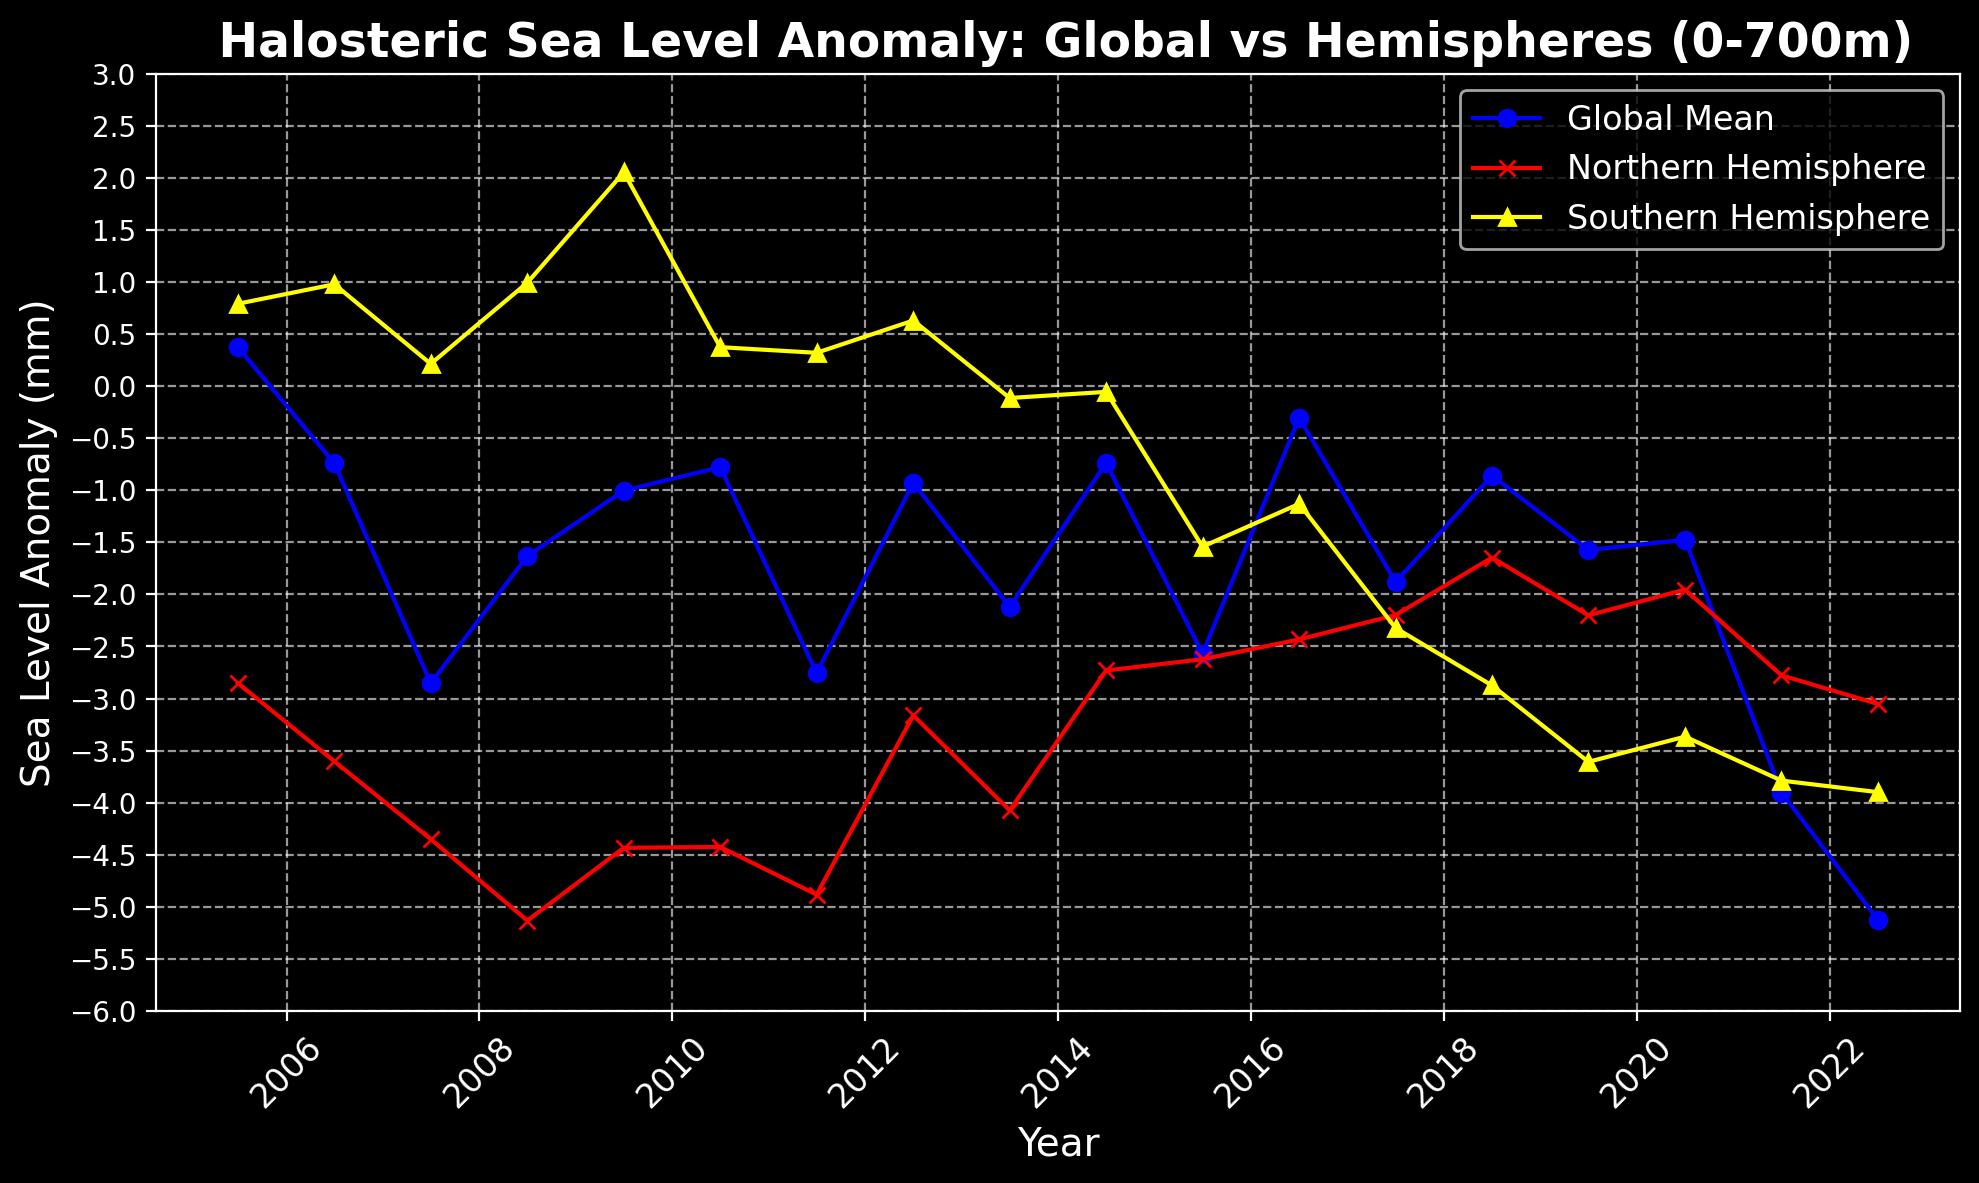

In [214]:
plt.figure(figsize=(10, 6))
plt.plot(time_years, global_mean, color='blue', label='Global Mean', linestyle='-', marker='o')
plt.plot(time_years, northern_hemisphere, color='red', label='Northern Hemisphere', linestyle='-', marker='x')
plt.plot(time_years, southern_hemisphere, color='yellow', label='Southern Hemisphere', linestyle='-', marker='^')
plt.title(' Halosteric Sea Level Anomaly: Global vs Hemispheres (0-700m)', fontsize=17, fontweight='bold')  
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sea Level Anomaly (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(rotation=45, fontsize=12)
min_y = min(global_mean.min(), northern_hemisphere.min(), southern_hemisphere.min()) 
max_y = max(global_mean.max(), northern_hemisphere.max(), southern_hemisphere.max())  
plt.yticks(np.arange(np.floor(min_y), np.ceil(max_y) + 0.5, 0.5)) 
plt.ylim(np.floor(min_y), np.ceil(max_y)) 
plt.tight_layout()
plt.show()

**Figure 11.** Halosteric sea level anomalies (0-700m depth) over time from 2005-2022 measured in millimeters. Data from NOAA's Center for Environmental Information. 

### Halosteric Sea Level 0-2000m

In [215]:
halosteric_sea_level_0_2000['b_mm_hs']

<xarray.DataArray 'b_mm_hs' (time: 18, depth: 1, lat: 180, lon: 360)>
[1166400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * time     (time) float32 606.0 618.0 630.0 642.0 ... 774.0 786.0 798.0 810.0
Dimensions without coordinates: depth
Attributes:
    long_name:     mean halosteric sea level anomaly calculated from objectiv...
    coordinates:   time lat lon depth
    cell_methods:  area: mean depth: mean time: mean
    grid_mapping:  crs
    units:         millimeters

In [216]:
halo_time_0_2000 = halosteric_sea_level_0_2000['time'].values
base_year = 2005
halo_time_as_years_0_2000 = base_year + (halo_time_0_2000 / 12) - 50.5
print(halo_time_as_years_0_2000[:18])

[2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.
 2017. 2018. 2019. 2020. 2021. 2022.]


In [217]:
halosteric_anomaly = halosteric_sea_level_0_2000['b_mm_hs'].mean(dim=['lat', 'lon', 'depth']).values 

In [218]:
halosteric_anomaly

array([ 0.7976122 , -0.18433177, -2.270644  , -0.6372399 , -1.5038126 ,
       -0.04228672, -2.3775096 ,  0.01063291, -1.575014  , -0.13763078,
       -2.3280256 , -0.37844005, -2.700324  , -1.4606621 , -2.4776156 ,
       -2.7072043 , -4.126559  , -5.4626403 ], dtype=float32)

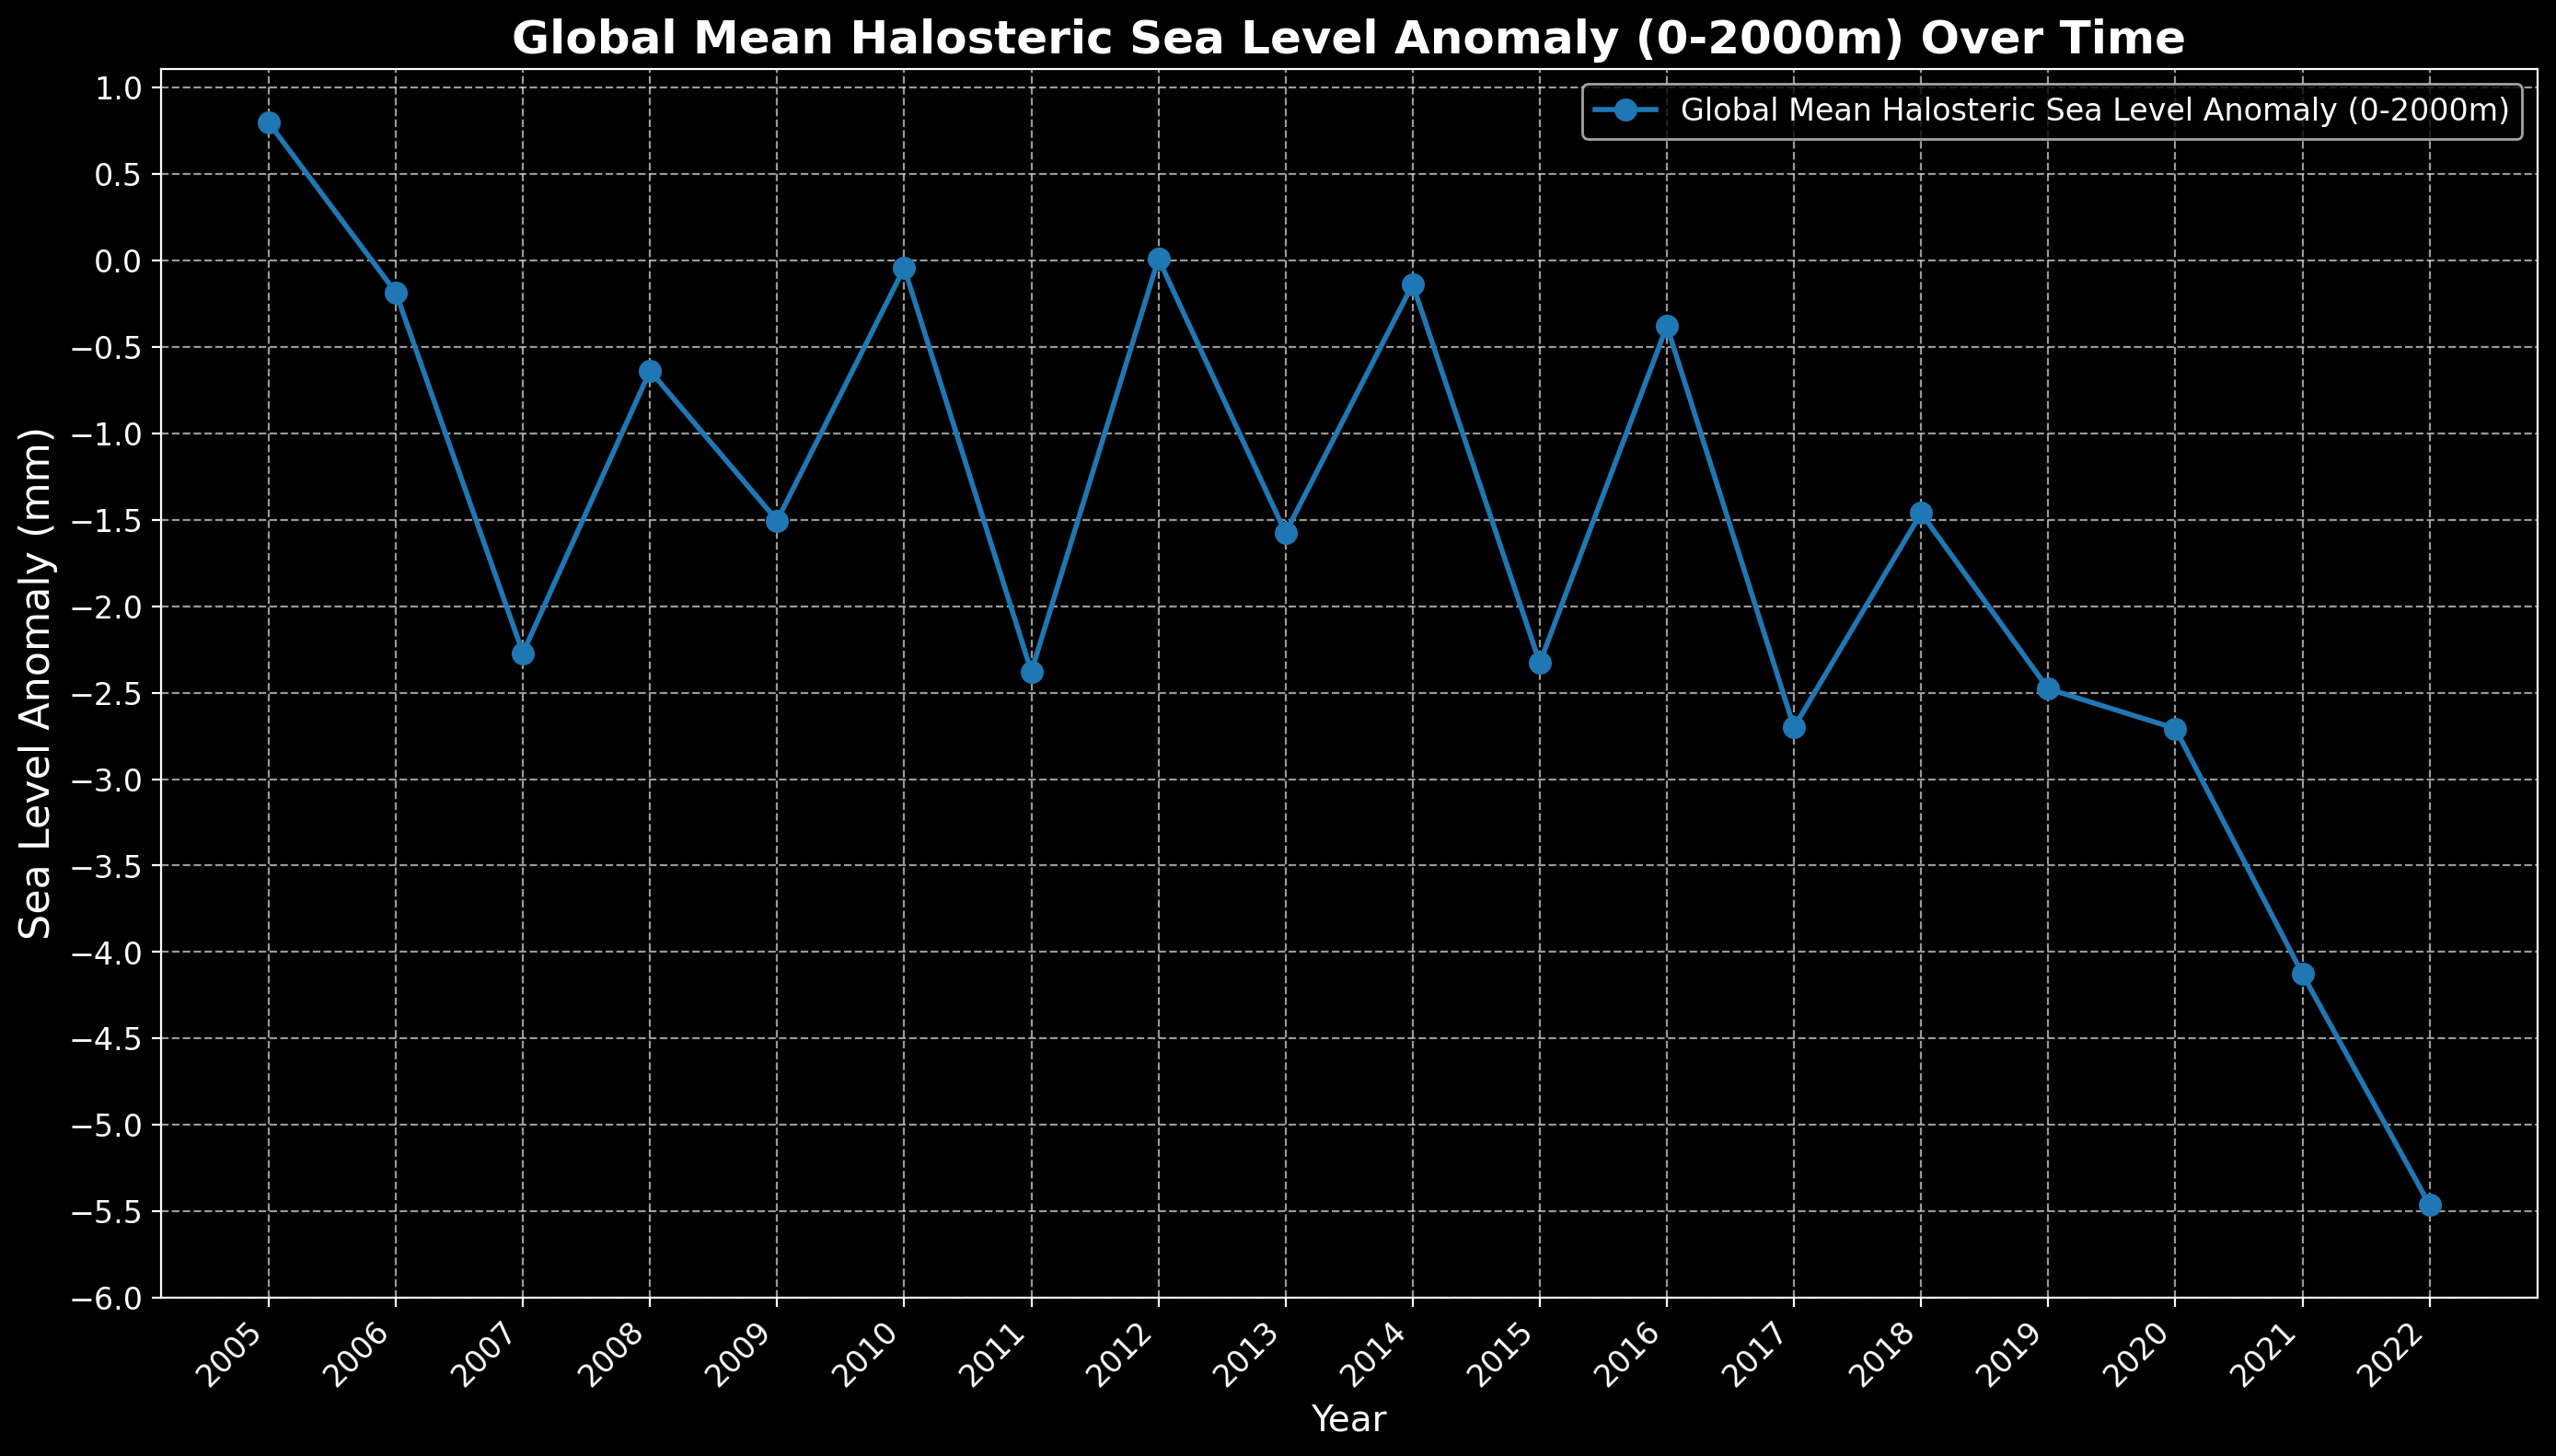

In [219]:
plt.figure(figsize=(14, 8))
plt.plot(halo_time_as_years_0_2000, halosteric_anomaly, label="Global Mean Halosteric Sea Level Anomaly (0-2000m)", 
         color='tab:blue', linestyle='-', marker='o', markersize=8, linewidth=2, alpha=1)

plt.title("Global Mean Halosteric Sea Level Anomaly (0-2000m) Over Time", fontsize=18, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sea Level Anomaly (mm)", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
y_min = np.floor(min(halosteric_anomaly))  
y_max = np.ceil(max(halosteric_anomaly))   
y_ticks = np.arange(y_max, y_min - 0.5, -0.5)  
plt.yticks(y_ticks, fontsize=12)
plt.xticks(np.arange(min(halo_time_as_years_0_2000), max(halo_time_as_years_0_2000) + 1, 1), 
           rotation=45, ha='right', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.tight_layout()
plt.show()

**Figure 12.** Halosteric sea level anomalies (0-2000m depth) over time from 2005-2022 measured in millimeters. Data from NOAA's Center for Environmental Information. 

## ESM4 Model Sea Salinity

### Surface Salinity Time Series

In [229]:
surface_salinity = gfdl_esm4_so_data.sel(lev=2.5)

In [230]:
mean_surface_salinity_time = surface_salinity.mean(dim=["lat", "lon"])

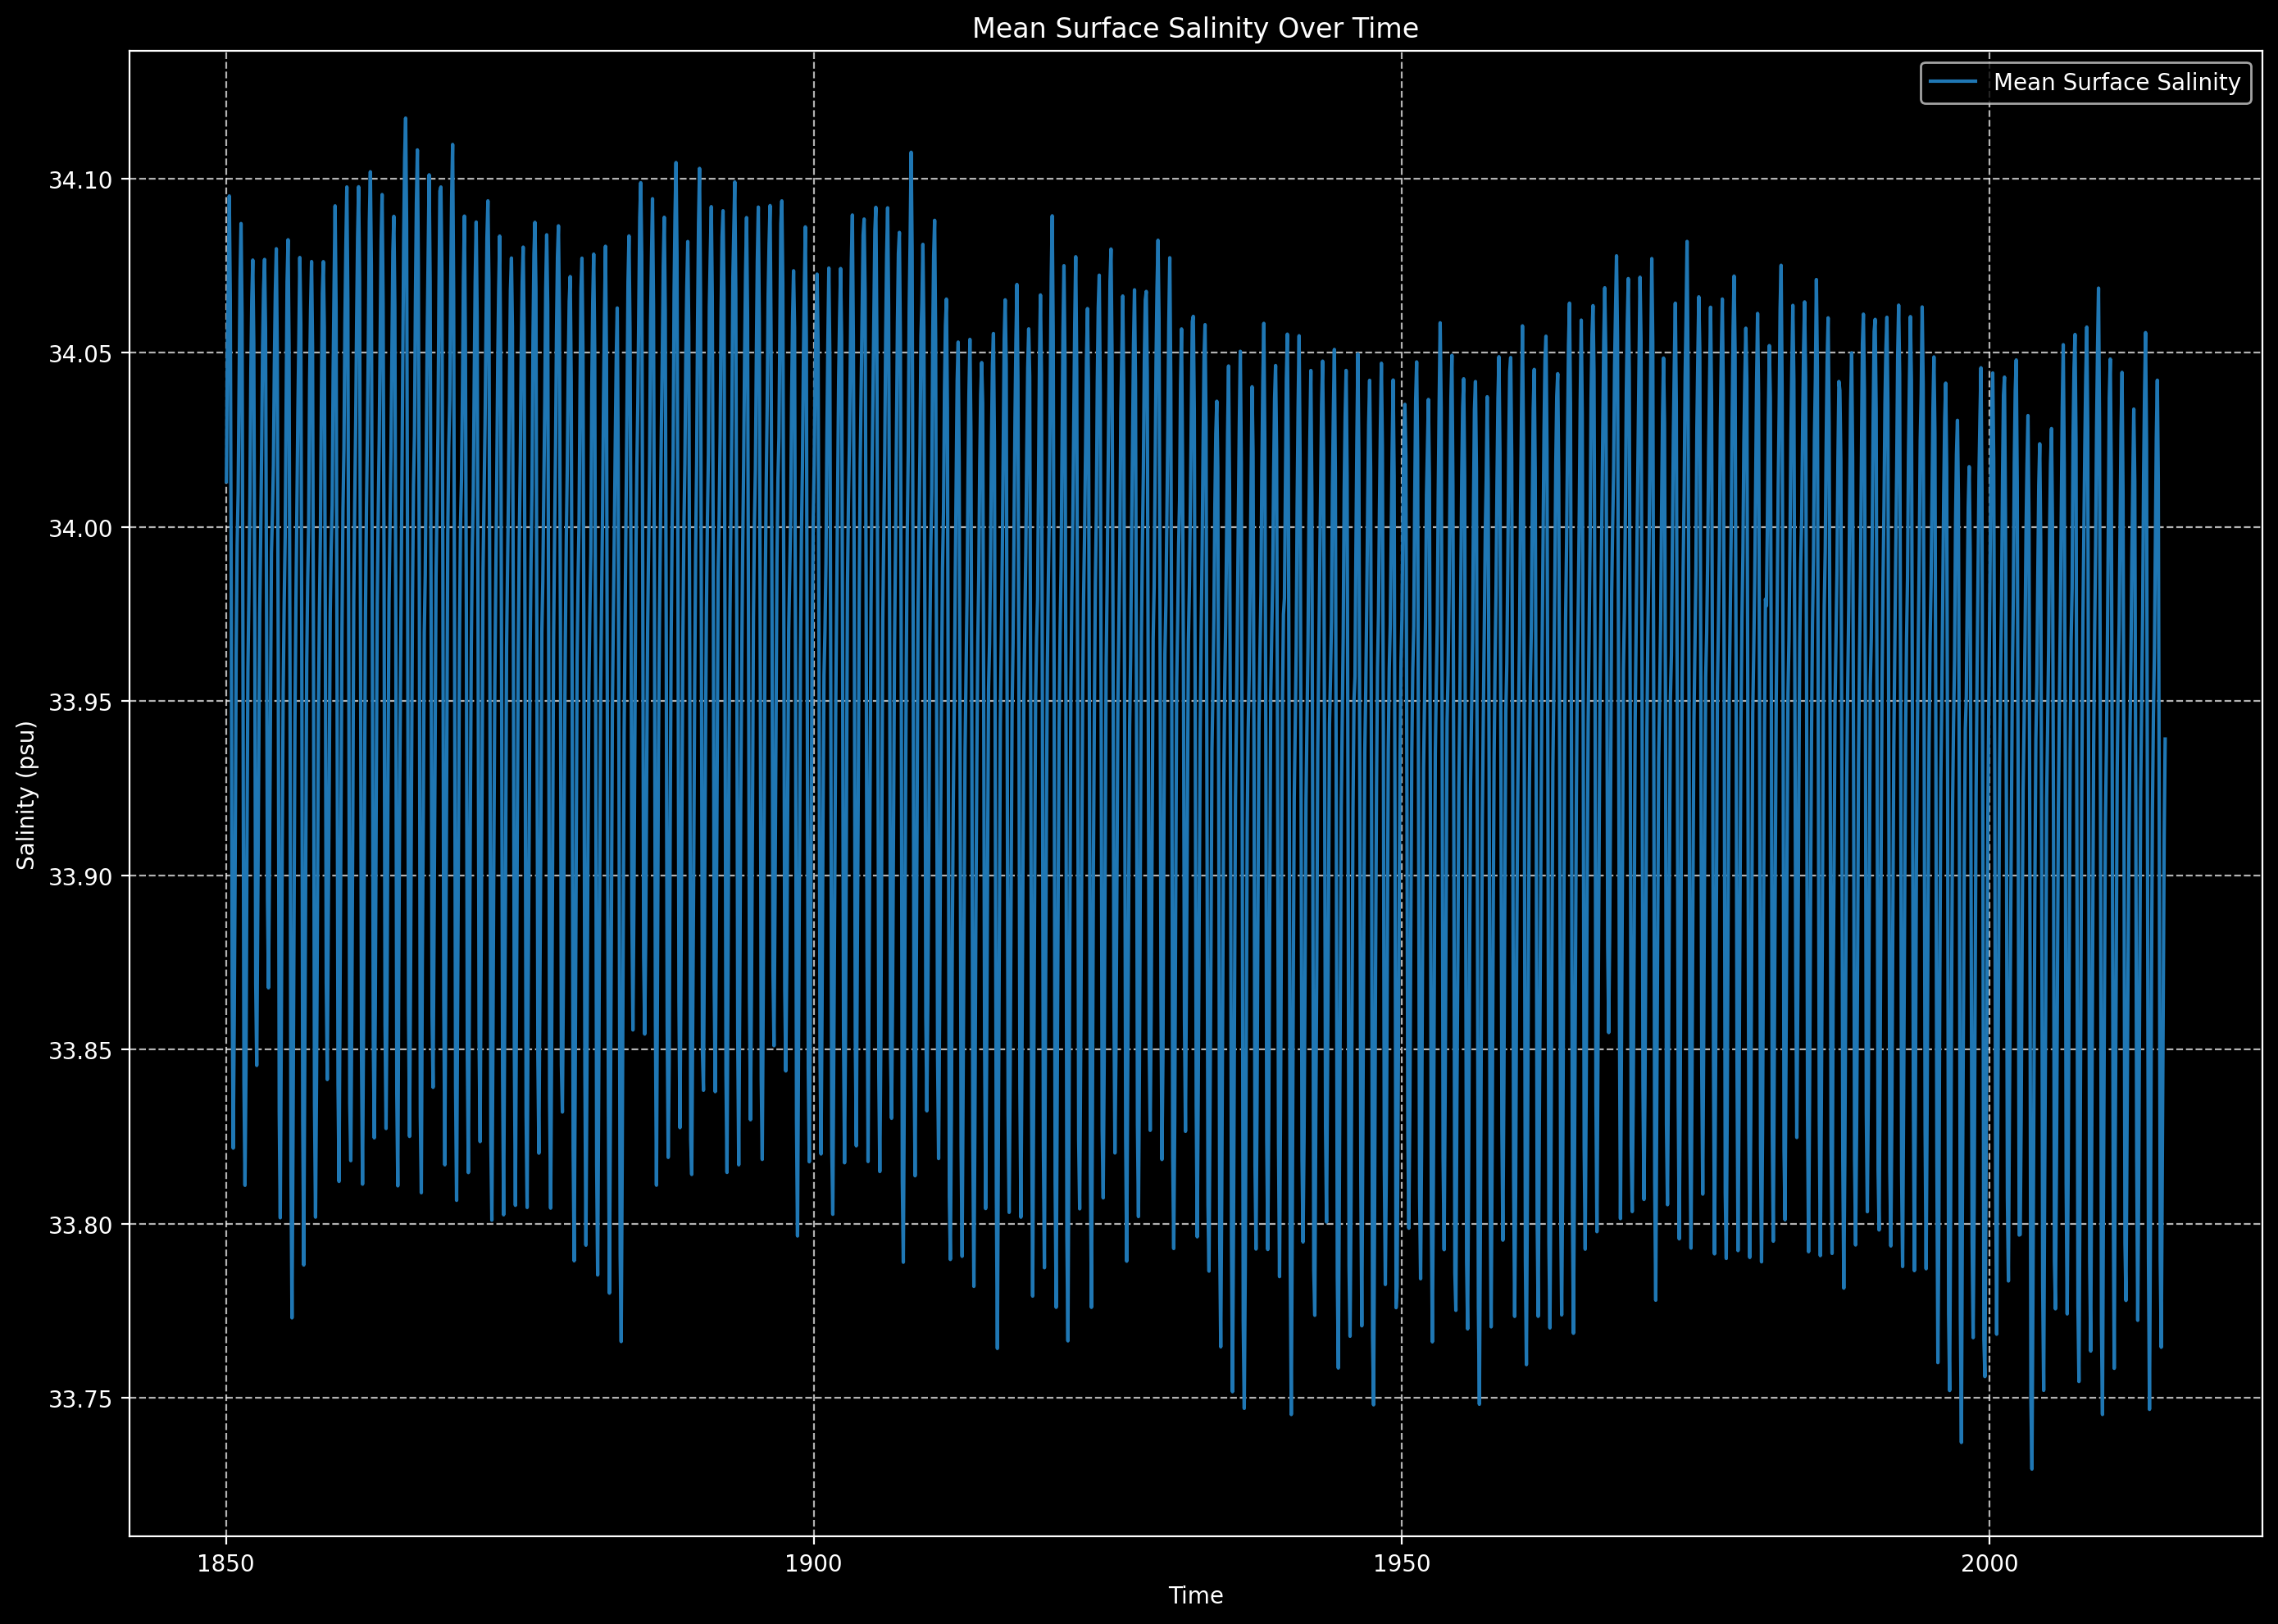

In [355]:
plt.figure(figsize=(14, 10))
mean_surface_salinity_time.plot(color='tab:blue', label='Mean Surface Salinity')
plt.title("Mean Surface Salinity Over Time")
plt.xlabel("Time")
plt.ylabel("Salinity (psu)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

**Figure 13.** Mean Monthly surface salinity from 1850-2014 simulated by NOAA's GFDL ESM4's historical experiment. 

---

# Model Assessment

## ESM4 Historical Experiment Ocean Temperature Output vs Observed Ocean Temperatures

**Calculating percent difference**

In [64]:
#WOA decadal average 0 depth
print(weight_dec_atlantic_0.values)
print(weight_dec_pacific_0.values)
print(weight_dec_southern_0.values)
print(weight_dec_indian_0.values)
print(weight_dec_arctic_0.values)

21.873621954477354
23.039807645873797
7.032931693864205
26.06812388227409
0.2126526660433765


In [65]:
#WOA decadal average 1000 depth
print(weight_dec_atlantic_1000.values)
print(weight_dec_pacific_1000.values)
print(weight_dec_southern_1000.values)
print(weight_dec_indian_1000.values)
print(weight_dec_arctic_1000.values)

5.235519726386714
4.18916845658299
2.9831278578268474
6.033843924328877
-0.21456162590664854


In [66]:
#ESM4 decadal average 0 depth
print(weight_esm4_dec_atlantic_0.values)
print(weight_esm4_dec_pacific_0.values)
print(weight_esm4_dec_southern_0.values)
print(weight_esm4_dec_indian_0.values)
print(weight_esm4_dec_arctic_0.values)


22.317050678144874
22.888733235526033
8.142109851140521
25.927257667772164
0.2653856935717388


In [67]:
#ESM4 decadal average 1000 depth
print(weight_esm4_dec_atlantic_1000.values)
print(weight_esm4_dec_pacific_1000.values)
print(weight_esm4_dec_southern_1000.values)
print(weight_esm4_dec_indian_1000.values)
print(weight_esm4_dec_arctic_1000.values)


4.943059438502878
4.021073641645118
3.1471488933360123
5.517571827727802
0.5428552309679211


In [68]:
#atlantic 0 

abs(22.317050678144874-21.873621954477354)/((22.317050678144874+21.873621954477354)/2)*100


2.0068883194150513

In [69]:
#pacific 0

abs(22.888733235526033-23.039807645873797)/((22.888733235526033+23.039807645873797)/2)*100

0.6578672322200698

In [70]:
#southern 0

abs(8.142109851140521-7.032931693864205)/((8.142109851140521+7.032931693864205)/2)*100

14.61845299054792

In [71]:
#indian 0

abs(25.927257667772164-26.06812388227409)/((25.927257667772164+26.06812388227409)/2)*100

0.5418412570598824

In [72]:
# arctic 0
abs(0.2653856935717388-0.2126526660433765)/((0.2653856935717388+0.2126526660433765)/2)*100

22.06225775304703

|Basin|Percent Difference|
|-----|------------------|
|Atlantic|2.0068883194150513 %|
|Pacific|0.6578672322200698 %|
|Southern|15.771206170593203 %|
|Indian|0.5418412570598824 %|
|Arctic|22.06225775304703 %|


**Table 1** Percent difference of ESM4 from WOA18 for ocean surface temperature for each major basin

Analysis- The percent difference reflects what was seen in the scatter plots where the Atlantic, Pacific, and Indian Oceans are represented well, but the Arctic and Southern Ocean are higher in their percent difference which agrees with the trends shown in the scatter plot.

In [73]:
#atlantic 1000
abs(4.943059438502878-5.235519726386714)/((4.943059438502878+5.235519726386714)/2)*100

5.746583745060618

In [74]:
#pacific 1000
abs(4.021073641645118-4.18916845658299)/((4.021073641645118+4.18916845658299)/2)*100

4.094759032115489

In [75]:
#southern 1000
abs(3.1471488933360123-2.9831278578268474)/((3.1471488933360123+2.9831278578268474)/2)*100

5.351178818413102

In [76]:
#Indian 1000
abs(5.517571827727802-6.033843924328877)/((5.517571827727802+6.033843924328877)/2)*100

8.938680897346362

In [77]:
#Arctic 1000
((abs(0.5428552309679211-( -0.21456162590664854)))/((0.5428552309679211-0.21456162590664854)/2))*100

461.4265067595244

|Basin|Percent Difference|
|-----|------------------|
|Atlantic|5.746583745060618 %|
|Pacific|4.094759032115489 %|
|Southern|5.351178818413102 %|
|Indian|8.938680897346362 %|
|Arctic|461.4265067595244 %|

**Table 2** Percent difference of ESM4 from WOA18 for ocean temperature at 1000m depth for each major basin

Analysis- The biggest percent difference by far is in the Arctic with a percent difference of 461%, this is most likely caused by the opposite trends shown between the ESM4 and WOA18 scatter plots. In WOA18 the overall temperature increases, however in ESM4 there is a decrease shown in the figure. Additionally the data for the Arctic ocean was much more variable decade to decade when comparing to WOA18 which would contribute to this large percent difference. ESM4 could be simulating heat transport of the Arctic wrong or not simulating the Arctic amplification effect strongly enough which could explain why the interior of the Arctic Ocean is much different compared to WOA18.

## ESM4 Historical Experiment Sea Salinity Output vs. Observed Sea Salinity 

C:\Users\TU_Climate24_Student\AppData\Local\Temp\ipykernel_6584\1379797813.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([t.strftime('%Y') for t in filtered_time_years], rotation=45, fontsize=12)


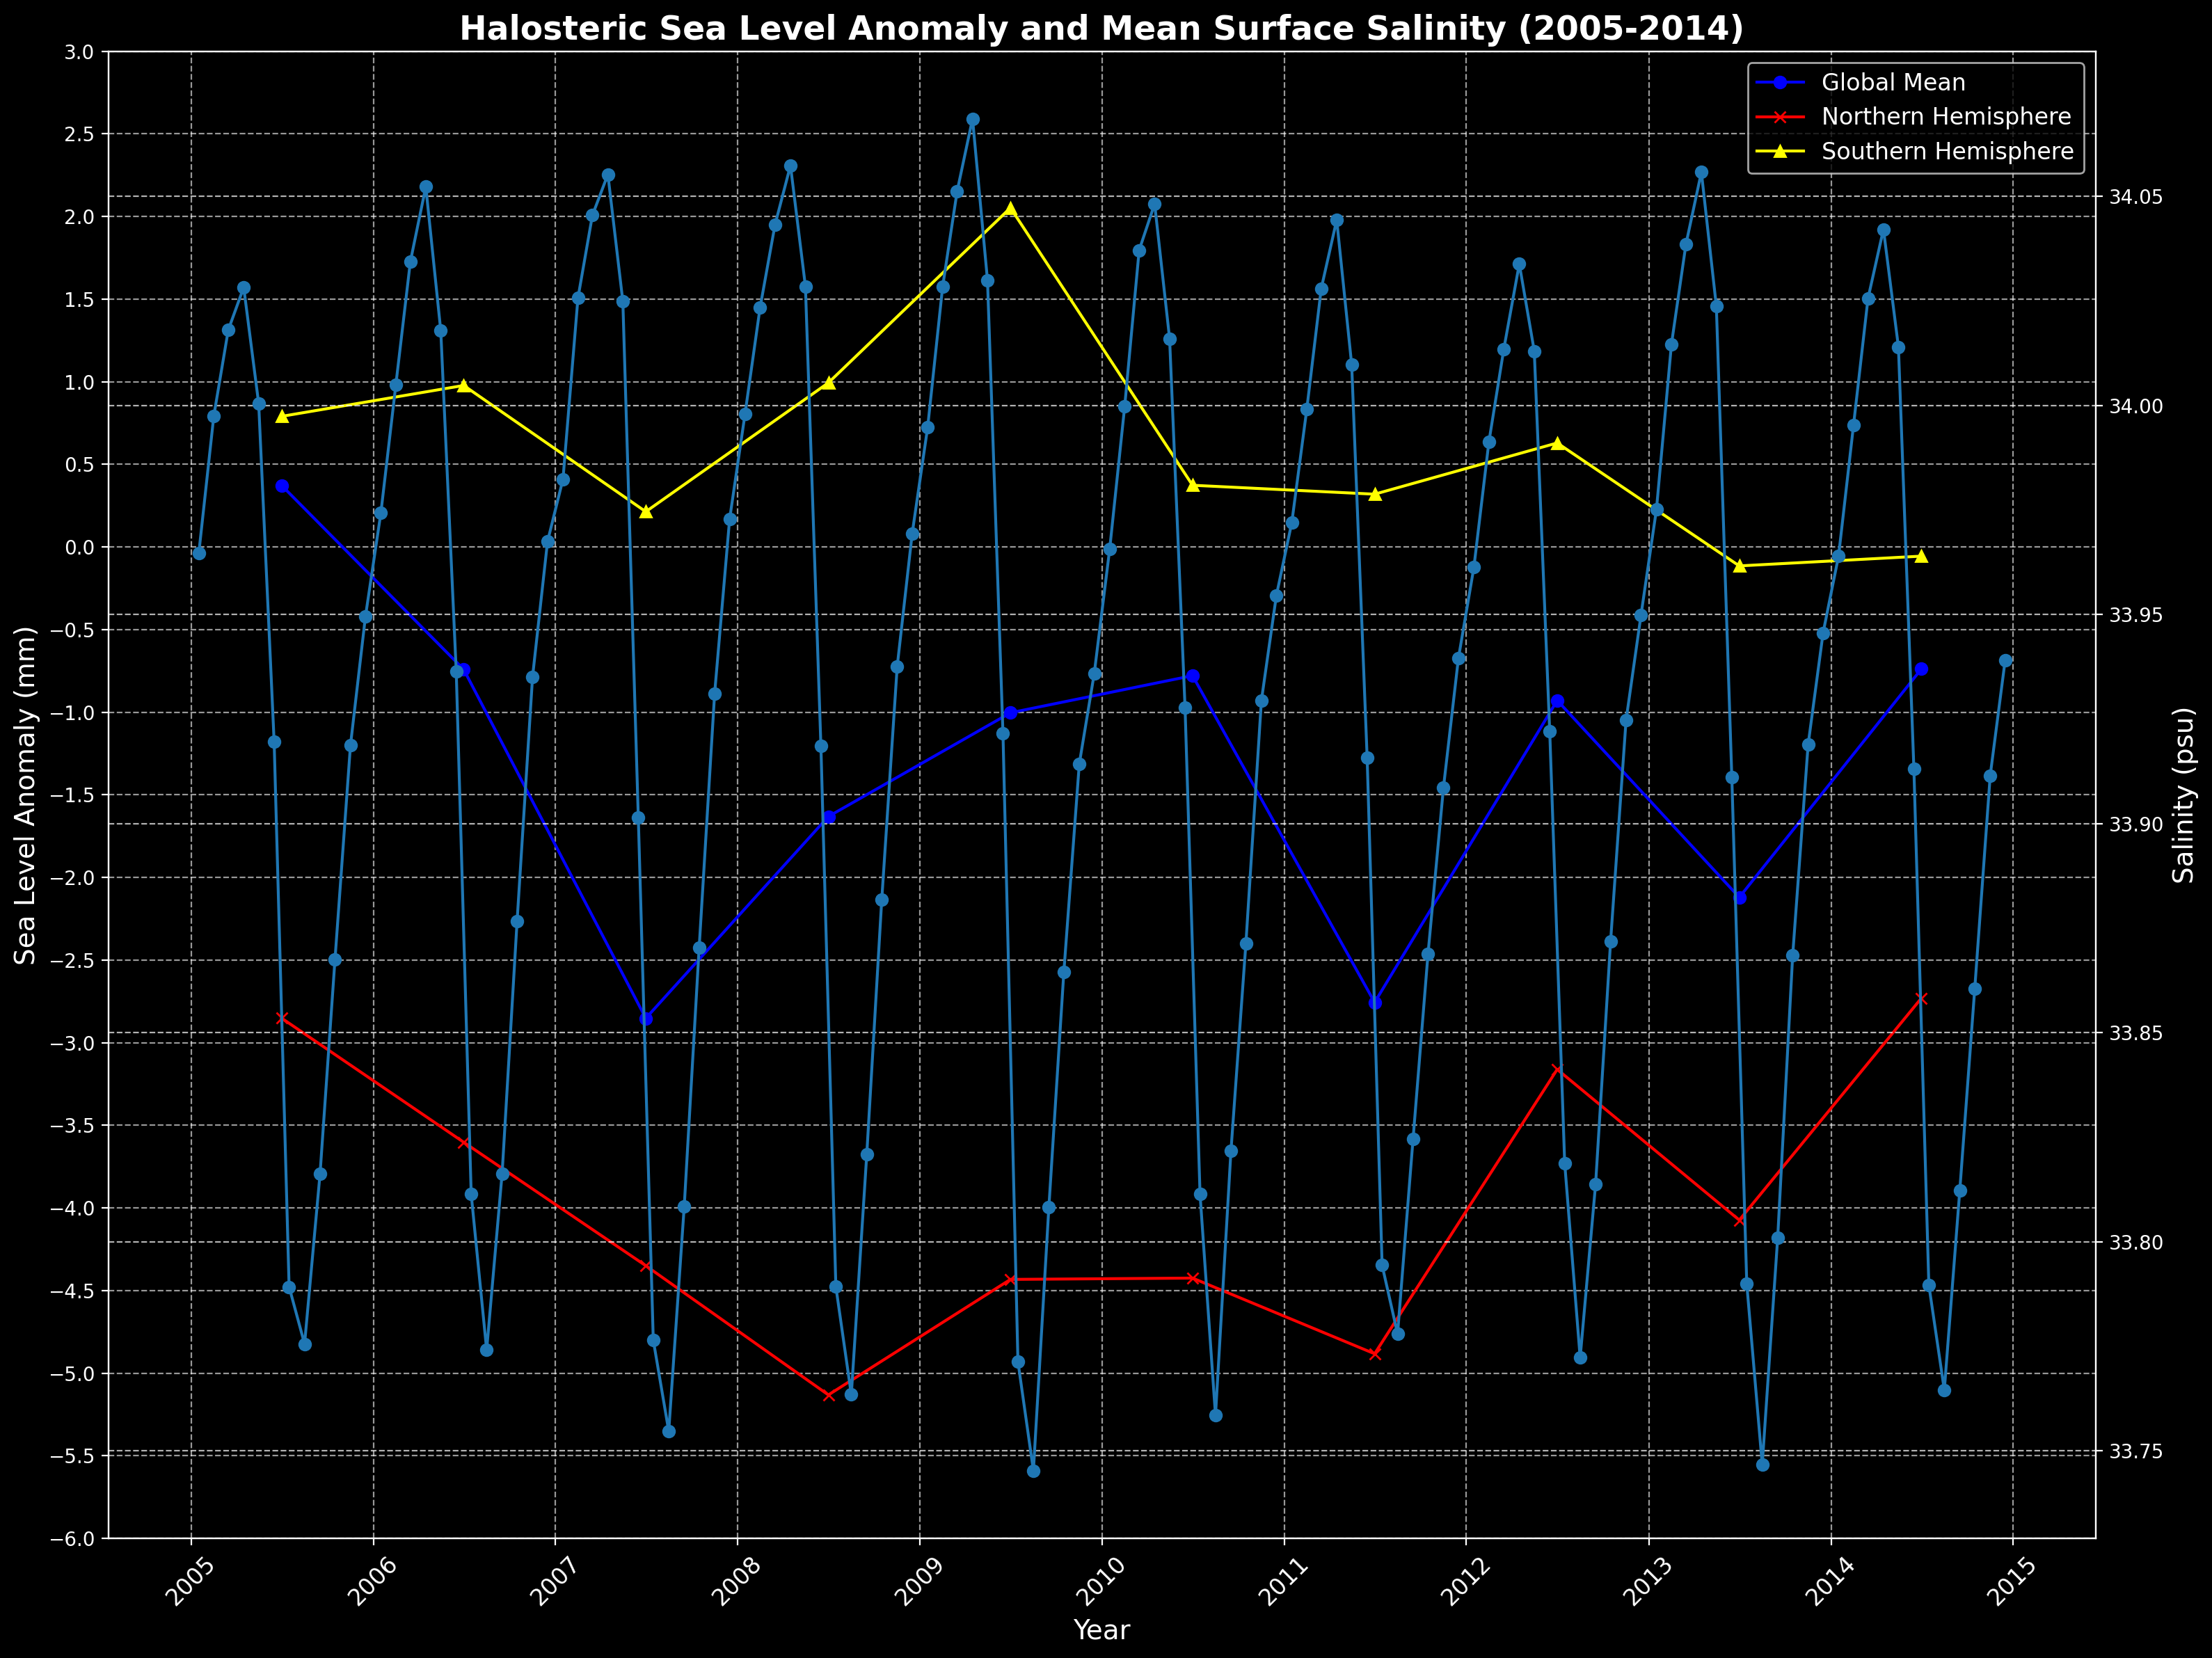

In [350]:
time_as_datetime = [datetime(year=t.year, month=t.month, day=t.day) for t in time_as_cftime]
fig, ax1 = plt.subplots(figsize=(16, 12))
ax1.plot(filtered_time_years, filtered_global_mean, color='blue', label='Global Mean', linestyle='-', marker='o')
ax1.plot(filtered_time_years, filtered_northern_hemisphere, color='red', label='Northern Hemisphere', linestyle='-', marker='x')
ax1.plot(filtered_time_years, filtered_southern_hemisphere, color='yellow', label='Southern Hemisphere', linestyle='-', marker='^')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Sea Level Anomaly (mm)', fontsize=14)
ax1.set_title('Halosteric Sea Level Anomaly and Mean Surface Salinity (2005-2014)', fontsize=17, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(fontsize=12)
ax1.set_xticklabels([t.strftime('%Y') for t in filtered_time_years], rotation=45, fontsize=12)
min_y = min(filtered_global_mean.min(), filtered_northern_hemisphere.min(), filtered_southern_hemisphere.min()) 
max_y = max(filtered_global_mean.max(), filtered_northern_hemisphere.max(), filtered_southern_hemisphere.max())  
ax1.set_yticks(np.arange(np.floor(min_y), np.ceil(max_y) + 0.5, 0.5)) 
ax1.set_ylim(np.floor(min_y), np.ceil(max_y))
ax2 = ax1.twinx()
ax2.plot(time_as_datetime, mean_surface_salinity_time_2005_2023, color='tab:blue', label='Mean Surface Salinity', linestyle='-', marker='o')
ax2.set_ylabel('Salinity (psu)', fontsize=14)
years = range(2005, 2016)
year_ticks = [datetime(year=year, month=1, day=1) for year in years]
ax2.set_xticks(year_ticks)
ax2.set_xticklabels(years, rotation=45, fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()

**Figure 14.** Observed halosteric anomalies from 200-2014  compared to NOAA's GFDL ESM4's historical experiment salinity output.  Observed data is from NOAA's Center for Environmental Information. 

---

# The Big Picture

ESM4 does not align very well with observed temperatures provided by WOA18. A standard acceptable percent difference range is below 5% but only the Pacific Ocean could be considered to be represented well by the model. The Arctic basin is very poorly represented by ESM4 having a vastly different value than observed. In terms of model performance of seawater salinity, ESM4 seems to be able to capture the variability of salinity throughout the year and overall show similar trends that indicate overall freshening of the ocean. Now what does this all mean in terms of the bigger picture? 

Changes in ocean heat content and salinity not only have implications for sea level rise but also play a crucial role in the overall climate system by driving ocean circulation. Other factors affect circulation such as surface winds but thermohaline circulation is more important for the movement of water in the deep ocean [NOAA](https://oceanservice.noaa.gov/education/tutorial_currents/05conveyor1.html#:~:text=As%20the%20seawater%20gets%20saltier,driving%20the%20global%20conveyer%20belt.). Deep ocean currents are driven by salinity and temperature gradients. Thermohaline circulation begins in the polar regions where water is the coldest and densest. Sea ice formation only occurs in the polar regions and when it does, brine rejection occurs causing the surrounding water to become saltier. As you learned, cold, salty water sinks which facilitates the conveyor belt of circulation. Ocean circulation is important since it allows for the movement and storage of heat, the distribution of nutrients, and has a strong influence on regional weather patterns. Alterations in ocean circulation can have adverse effects on all those processes [NOAA](
https://oceanexplorer.noaa.gov/facts/climate.html#:~:text=Ocean%20currents%20act%20much%20like,solar%20radiation%20reaching%20Earth's%20surfac). . If a climate denier ata  family dinner doesn’t believe in the effects of climate change orunderstands the scientific aspect of it all, talking about the financial consequences might put it into perspective for them.

Sea level rise is one of the most destructive side effects of climate change [(Yue, C., et al., 2023)](https://www.nature.com/articles/s41612-023-00466-4). It is projected to directly affect more than 1 billion people living in low-elevation coastal zones by 2100 under the SSP5.8-5 scenario. Sea level rise has already been decreasing property value and causing costly changes to infrastructure. This is particularly evident within the insurance industry, especially in Florida. There is currently a homeowners insurance crisis happening in Florida since many companies are leaving the state, liquidating, or refusing to insure policies in high-risk areas [(Duvall)](https://www.insurance.com/home-and-renters-insurance/home-insurers-leaving-florida). Some of the largest insurance companies such as Progressive and AAA are leaving or reducing their coverage in Florida. However, Nationwide and State Farm are still doing normal business in Florida. Despite the crises, six new insurance companies were approved in 2023 to issue policies. Experts in the field have analyzed the situation and attributed the retreat to rising litigation costs, the pullback of reinsurers, and Florida’s market heavily relying on small insurers that ultimately rely on reinsurers and a booming housing market along the coast. However, those coastal communities are being and will continue to be victims of intense flooding and increasingly strong hurricanes. Floods and hurricanes take an unbearable financial toll on insurance companies that many are not prepared for without raising already costly premium prices. Florida isn’t the only state that insurance companies are pulling out of, California is facing a similar crisis due to increased wildfires. Staying on topic though, other coastal communities are likely already facing similar challenges in finding affordable protection for their homes as sea level continues to rise and hurricanes become stronger due to increased sea surface temperatures.    

![](https://upload.wikimedia.org/wikipedia/commons/4/4c/Thermohaline_Circulation_2.png)

*image from [Wikipedia](https://en.wikipedia.org/wiki/Thermohaline_circulation)*

---

# Author Contribution 

Grace led the conceptual side of the analysis by researching ocean heat content, steric, thermosteric, and halosteric sea level. She also formulated the final group notebook template to create a cohesive, organized flow of information. She proofread the blog post and the final notebook, ensuring both were ready for the final submission. Preparation for the final submission looked like fixing figure captions, adding additional plots when needed, adding comments to code for clarity, and choosing what figures would go into the final blog post.  She made edits when necessary. Throughout this project, she set up a project outline to keep track of the work that needed to be done and ensure the objectives were clear. She made suggestions when it came to plotting and assessing model performance such as calculating the percent difference for the temperature component. 

Tyler took the lead on creating the decadal average temperature plots at different depths for the five main ocean basins. He used WOA18 data and model output from ESM4 to conduct his part of the investigation. Since the WOA18 data did not have time he decided to make scatter plots of the average for each decade in each of the major basins in addition to the decadal average provided. The basins he chose were the Atlantic, Pacific, Southern Ocean, Indian, and Arctic as they are the largest of the basins. The first scatter plot made for WOA18 was analyzing the temperature data at the surface level. After that plot was made to assess and visualize the temperature data at a lower depth, the same plot was reproduced using a depth of 1000 meters. The goal was to then compare these results to the ESM4 ocean temperature data, so next Tyler imported the ESM4 ocean temperature data. I then reproduced the same scatter plots using the ESM4 data at the surface and at 1000 meters depth. He then had a qualitative comparison of the temperature at each decade for WOA18 and ESM4 at the surface and at 1000m depth to compare how they match up. To then get a quantitative analysis of how accurate ESM4 is to the WOA18 dataset I computed a percent difference of the entire decadal average for each basin and produced a table for the surface of the ocean and at 1000 meters depth to compare how similar the values were. 

Ryan was responsible for leading the analysis of the ocean heat content, steric, thermosteric, halosteric, and assessment of ESM4 historical salinity output. He created plots for heat content, and steric height compoenents for the upper ocean 0-700 meters and the deep ocean 0-2000 meters. He also took the lead in investigating sea salinity simulated by ESM4's historical model output. 